# Import the required libraries / packages

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.simplefilter("ignore")

# Import the dataset

In [2]:
data=pd.read_csv("Final Stock Data.csv")

# Showing the dataset

In [3]:
data.head(10)

Date       Open       High        Low      Close  Adj Close   Volume  \
0  2019-02-08  48.599998  48.930000  48.470001  48.910000  46.454433   906700   
1  2019-02-11  48.680000  48.810001  48.419998  48.660000  46.216980  1001200   
2  2019-02-12  48.990002  49.480000  48.830002  49.400002  46.919834   868600   
3  2019-02-13  49.040001  49.279999  49.020000  49.090000  46.625393   868900   
4  2019-02-14  49.750000  49.910000  49.560001  49.779999  47.280754  2015900   
5  2019-02-15  49.810001  50.369999  49.639999  50.349998  47.822136  2201300   
6  2019-02-19  49.970001  50.540001  49.610001  50.320000  47.793644  2784200   
7  2019-02-20  49.840000  50.009998  49.549999  49.700001  47.204773  1063800   
8  2019-02-21  49.759998  49.820000  49.400002  49.660000  47.166779   757900   
9  2019-02-22  49.820000  49.889999  49.639999  49.779999  47.280754   660100   

  Symbol  
0    NVO  
1    NVO  
2    NVO  
3    NVO  
4    NVO  
5    NVO  
6    NVO  
7    NVO  
8    NVO  
9    NVO

In [4]:
data.tail(10)

Date   Open   High    Low  Close  Adj Close  Volume Symbol
108935  2022-01-26  14.50  15.50  13.94  14.27      14.27  145000   ANVS
108936  2022-01-27  14.43  14.56  13.00  13.05      13.05  114100   ANVS
108937  2022-01-28  13.05  13.81  12.80  13.69      13.69   60000   ANVS
108938  2022-01-31  13.71  15.18  13.71  15.17      15.17   69100   ANVS
108939  2022-02-01  15.36  16.00  14.69  15.37      15.37   67600   ANVS
108940  2022-02-02  15.30  15.30  13.76  13.87      13.87   65500   ANVS
108941  2022-02-03  13.50  14.00  13.31  13.64      13.64   39500   ANVS
108942  2022-02-04  13.62  14.92  13.53  14.72      14.72   50700   ANVS
108943  2022-02-07  14.59  16.16  14.47  14.96      14.96   74000   ANVS
108944  2022-02-08  14.80  15.20  14.01  14.70      14.70   36000   ANVS

# Dataset informations

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Symbol'],
      dtype='object')

In [7]:
data.shape

(108945, 8)

In [8]:
total_records=np.product(data.shape)
total_records

871560

In [9]:
data.nunique()

Date           757
Open         19712
High         26007
Low          25218
Close        19323
Adj Close    20818
Volume       24863
Symbol         205
dtype: int64

In [10]:
data.describe()

Open           High            Low          Close  \
count  108945.000000  108945.000000  108945.000000  108945.000000   
mean       45.370765      46.472301      44.222670      45.332287   
std        65.105505      66.168111      63.985977      65.104704   
min         0.752000       0.850000       0.700000       0.750000   
25%        14.380000      14.850000      13.880000      14.330000   
50%        24.719999      25.540001      23.920000      24.690001   
75%        46.700001      48.040001      45.290001      46.660000   
max       683.500000     686.619995     674.570007     680.960022   

           Adj Close        Volume  
count  108945.000000  1.089450e+05  
mean       45.300636  7.786527e+05  
std        65.074106  2.516812e+06  
min         0.750000  0.000000e+00  
25%        14.300000  1.378000e+05  
50%        24.690001  3.438000e+05  
75%        46.589153  7.761000e+05  
max       680.960022  2.246410e+08

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108945 entries, 0 to 108944
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       108945 non-null  object 
 1   Open       108945 non-null  float64
 2   High       108945 non-null  float64
 3   Low        108945 non-null  float64
 4   Close      108945 non-null  float64
 5   Adj Close  108945 non-null  float64
 6   Volume     108945 non-null  int64  
 7   Symbol     108945 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 6.6+ MB


# Changing Datatypes

In our dataset date column and symbol column in object data type, so we convert date column to datetime and symbol column to string data type

In [12]:
data["Date"]=data["Date"].astype('datetime64[ns]')

In [13]:
data["Date"]

0        2019-02-08
1        2019-02-11
2        2019-02-12
3        2019-02-13
4        2019-02-14
            ...    
108940   2022-02-02
108941   2022-02-03
108942   2022-02-04
108943   2022-02-07
108944   2022-02-08
Name: Date, Length: 108945, dtype: datetime64[ns]

In [14]:
data = data.astype({'Symbol':'string'})
data["Symbol"]

0          NVO
1          NVO
2          NVO
3          NVO
4          NVO
          ... 
108940    ANVS
108941    ANVS
108942    ANVS
108943    ANVS
108944    ANVS
Name: Symbol, Length: 108945, dtype: string

# Describing dataset

In [15]:
data.groupby("Symbol").mean()

Open       High        Low      Close  Adj Close        Volume
Symbol                                                                     
ABCL    24.861079  25.669870  23.692966  24.564760  24.564760  1.784168e+06
ABCM    20.543783  20.871511  20.318633  20.609878  20.609878  1.664205e+05
ABOS    12.519377  12.975481  11.942494  12.386104  12.386104  1.875773e+05
ABSI    13.575000  14.204207  12.833821  13.436143  13.436143  7.458714e+05
ACAD    34.304518  35.062919  33.509155  34.286050  34.286050  1.567189e+06
...           ...        ...        ...        ...        ...           ...
XBIT    14.239458  14.574624  13.851597  14.193692  12.591286  2.038236e+05
XLO     15.885667  16.901213  14.776800  15.840400  15.840400  1.351760e+05
YMAB    31.316182  32.200013  30.324676  31.242140  31.242140  2.252469e+05
ZEAL    29.669551  29.995822  29.293176  29.631906  29.631906  1.058890e+04
ZYME    31.597431  32.453875  30.672018  31.563474  31.563474  4.478269e+05

[205 rows x 6 columns]

In [16]:
data.groupby("Symbol").median()

Open       High        Low      Close  Adj Close     Volume
Symbol                                                                  
ABCL    20.410000  20.966500  19.662500  20.275001  20.275001  1470800.0
ABCM    20.379999  20.650000  20.170000  20.430000  20.430000    94400.0
ABOS    14.555000  14.830000  13.955000  14.415000  14.415000   111650.0
ABSI    11.235000  11.840000  10.730000  11.215000  11.215000   269400.0
ACAD    29.969999  30.360001  29.219999  29.870001  29.870001  1195600.0
...           ...        ...        ...        ...        ...        ...
XBIT    14.760000  15.050000  14.370000  14.710000  13.130000   104700.0
XLO     15.130000  16.100000  13.960000  15.200000  15.200000    84000.0
YMAB    30.650000  31.520000  29.790001  30.780001  30.780001   178100.0
ZEAL    31.480000  31.790001  31.010000  31.230000  31.230000     4700.0
ZYME    31.910000  32.810001  31.030001  31.980000  31.980000   334900.0

[205 rows x 6 columns]

In [17]:
data.groupby("Symbol").std()

Open       High        Low      Close  Adj Close        Volume
Symbol                                                                     
ABCL    12.066999  12.566345  11.237094  11.771652  11.771652  1.512603e+06
ABCM     1.697283   1.737330   1.690180   1.734839   1.734839  2.556867e+05
ABOS     4.821577   5.041850   4.546563   4.748062   4.748062  2.562719e+05
ABSI     6.141229   6.443826   5.825096   6.098643   6.098643  3.700928e+06
ACAD    12.209117  12.405051  11.908753  12.152848  12.152848  1.755817e+06
...           ...        ...        ...        ...        ...           ...
XBIT     4.213546   4.256370   4.131104   4.176893   3.656998  4.147645e+05
XLO      4.403910   4.823933   4.009990   4.396644   4.396644  2.436606e+05
YMAB     9.482580   9.672774   9.248516   9.440044   9.440044  2.040269e+05
ZEAL     6.915429   7.008667   6.826851   6.922846   6.922846  2.827940e+04
ZYME    10.604636  10.865411  10.319326  10.590081  10.590081  4.414137e+05

[205 rows x 6 columns]

In [18]:
data.groupby("Symbol").min()

Date   Open       High     Low      Close  Adj Close  Volume
Symbol                                                                   
ABCL   2020-12-11   8.05   8.050000   7.420   7.770000   7.770000  291100
ABCM   2020-10-22  16.68  16.680000  15.830  16.559999  16.559999   14400
ABOS   2021-07-01   4.76   4.970000   4.600   4.790000   4.790000   18500
ABSI   2021-07-22   5.82   6.280000   5.630   5.870000   5.870000   62700
ACAD   2019-02-08  15.75  16.129999  15.680  15.780000  15.780000  251400
...           ...    ...        ...     ...        ...        ...     ...
XBIT   2019-02-08   6.93   7.010000   6.761   6.860000   5.910913   17000
XLO    2021-10-22   8.94  10.210000   8.525   9.690000   9.690000    4700
YMAB   2019-02-08   7.50   7.510000   6.810   6.920000   6.920000    7200
ZEAL   2019-02-08  14.02  14.020000  14.000  14.000000  14.000000       0
ZYME   2019-02-08   7.47   7.960000   7.400   7.490000   7.490000   23400

[205 rows x 7 columns]

In [19]:
data.groupby("Symbol").max()

Date       Open       High        Low      Close  Adj Close  \
Symbol                                                                     
ABCL   2022-02-08  61.000000  71.910004  52.860001  58.900002  58.900002   
ABCM   2022-02-08  24.090000  24.690001  23.780001  24.299999  24.299999   
ABOS   2022-02-08  26.000000  26.980000  18.900000  20.280001  20.280001   
ABSI   2022-02-08  31.530001  31.530001  29.000000  30.290001  30.290001   
ACAD   2022-02-08  57.340000  58.720001  56.080002  57.000000  57.000000   
...           ...        ...        ...        ...        ...        ...   
XBIT   2022-02-08  25.040001  26.400000  24.420000  24.940001  21.489531   
XLO    2022-02-08  25.090000  27.950001  22.629999  25.110001  25.110001   
YMAB   2022-02-08  54.869999  55.220001  53.500000  54.259998  54.259998   
ZEAL   2022-02-08  42.869999  44.599998  42.630001  44.250000  44.250000   
ZYME   2022-02-08  57.310001  59.029999  54.500000  56.810001  56.810001   

          Volume  
Symbol            
ABCL    14682900  
ABCM     2471300  
ABOS     2246700  
ABSI    43819200  
ACAD    24262400  
...          ...  
XBIT     7523300  
XLO      1593500  
YMAB     1961400  
ZEAL      551900  
ZYME     4549900  

[205 rows x 7 columns]

# Checking Null Values

In [20]:
data.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
Symbol       False
dtype: bool

In [21]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [22]:
null_values = data.isnull().sum().values.sum()
null_values

0

In [23]:
percent_missing=data.isnull().sum()*100 / len(data)
percent_missing

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
Symbol       0.0
dtype: float64

In [24]:
print("In our dataset has {} null values".format(null_values))

In our dataset has 0 null values


# Zero values affect our dataset, So I convert zero into null, after that fill with mean values

In [25]:
data["Open"]=data["Open"].replace(0,np.nan)
data["High"]=data["High"].replace(0,np.nan)
data["Low"]=data["Low"].replace(0,np.nan)
data["Close"]=data["Close"].replace(0,np.nan)
data["Adj Close"]=data["Adj Close"].replace(0,np.nan)
data["Volume"]=data["Volume"].replace(0,np.nan)

In [26]:
data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume       91
Symbol        0
dtype: int64

# Volume column filled with mean

In [27]:
data['Volume'] = data['Volume'].fillna(data.groupby('Symbol')['Volume'].transform('mean'))
data

Date       Open       High        Low      Close  Adj Close  \
0      2019-02-08  48.599998  48.930000  48.470001  48.910000  46.454433   
1      2019-02-11  48.680000  48.810001  48.419998  48.660000  46.216980   
2      2019-02-12  48.990002  49.480000  48.830002  49.400002  46.919834   
3      2019-02-13  49.040001  49.279999  49.020000  49.090000  46.625393   
4      2019-02-14  49.750000  49.910000  49.560001  49.779999  47.280754   
...           ...        ...        ...        ...        ...        ...   
108940 2022-02-02  15.300000  15.300000  13.760000  13.870000  13.870000   
108941 2022-02-03  13.500000  14.000000  13.310000  13.640000  13.640000   
108942 2022-02-04  13.620000  14.920000  13.530000  14.720000  14.720000   
108943 2022-02-07  14.590000  16.160000  14.470000  14.960000  14.960000   
108944 2022-02-08  14.800000  15.200000  14.010000  14.700000  14.700000   

           Volume Symbol  
0        906700.0    NVO  
1       1001200.0    NVO  
2        868600.0    NVO  
3        868900.0    NVO  
4       2015900.0    NVO  
...           ...    ...  
108940    65500.0   ANVS  
108941    39500.0   ANVS  
108942    50700.0   ANVS  
108943    74000.0   ANVS  
108944    36000.0   ANVS  

[108945 rows x 8 columns]

# Set Date column as a index column¶

In [28]:
data.set_index("Date", inplace=True)

In [29]:
data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-02-08  48.599998  48.930000  48.470001  48.910000  46.454433   906700.0   
2019-02-11  48.680000  48.810001  48.419998  48.660000  46.216980  1001200.0   
2019-02-12  48.990002  49.480000  48.830002  49.400002  46.919834   868600.0   
2019-02-13  49.040001  49.279999  49.020000  49.090000  46.625393   868900.0   
2019-02-14  49.750000  49.910000  49.560001  49.779999  47.280754  2015900.0   
...               ...        ...        ...        ...        ...        ...   
2022-02-02  15.300000  15.300000  13.760000  13.870000  13.870000    65500.0   
2022-02-03  13.500000  14.000000  13.310000  13.640000  13.640000    39500.0   
2022-02-04  13.620000  14.920000  13.530000  14.720000  14.720000    50700.0   
2022-02-07  14.590000  16.160000  14.470000  14.960000  14.960000    74000.0   
2022-02-08  14.800000  15.200000  14.010000  14.700000  14.700000    36000.0   

           Symbol  
Date               
2019-02-08    NVO  
2019-02-11    NVO  
2019-02-12    NVO  
2019-02-13    NVO  
2019-02-14    NVO  
...           ...  
2022-02-02   ANVS  
2022-02-03   ANVS  
2022-02-04   ANVS  
2022-02-07   ANVS  
2022-02-08   ANVS  

[108945 rows x 7 columns]

# Close is our dependent variable, So comparing close column with all other columns except date column

(i) Close column comparing with Open column

In [30]:
Open_comparing_with_Close = data[['Close','Open']].agg(["mean", "min", "max", "median", "std", "var", "sum", "size"])
Open_comparing_with_Close['Close'].sort_values(ascending=False)
Open_comparing_with_Close

Close          Open
mean    4.533229e+01  4.537076e+01
min     7.500000e-01  7.520000e-01
max     6.809600e+02  6.835000e+02
median  2.469000e+01  2.472000e+01
std     6.510470e+01  6.510550e+01
var     4.238623e+03  4.238727e+03
sum     4.938726e+06  4.942918e+06
size    1.089450e+05  1.089450e+05

(ii) Close column comparing with High column

In [31]:
Close_comparing_with_High = data[['Close','High']].agg(["mean", "min", "max", "median", "std", "var", "sum", "size"])
Close_comparing_with_High['Close'].sort_values(ascending=False)
Close_comparing_with_High

Close          High
mean    4.533229e+01  4.647230e+01
min     7.500000e-01  8.500000e-01
max     6.809600e+02  6.866200e+02
median  2.469000e+01  2.554000e+01
std     6.510470e+01  6.616811e+01
var     4.238623e+03  4.378219e+03
sum     4.938726e+06  5.062925e+06
size    1.089450e+05  1.089450e+05

(iii) Close column comparing with Low column

In [32]:
Close_comparing_with_Low = data[['Close','Low']].agg(["mean", "min", "max", "median", "std", "var", "sum", "size"])
Close_comparing_with_Low['Close'].sort_values(ascending=False)
Close_comparing_with_Low

Close           Low
mean    4.533229e+01  4.422267e+01
min     7.500000e-01  7.000000e-01
max     6.809600e+02  6.745700e+02
median  2.469000e+01  2.392000e+01
std     6.510470e+01  6.398598e+01
var     4.238623e+03  4.094205e+03
sum     4.938726e+06  4.817839e+06
size    1.089450e+05  1.089450e+05

(iv) Close column comparing with Volume column

In [33]:
Close_comparing_with_Volume = data[['Close','Volume']].agg(["mean", "min", "max", "median", "std", "var", "sum", "size"])
Close_comparing_with_Volume['Close'].sort_values(ascending=False)
Close_comparing_with_Volume

Close        Volume
mean    4.533229e+01  7.788940e+05
min     7.500000e-01  1.000000e+02
max     6.809600e+02  2.246410e+08
median  2.469000e+01  3.443000e+05
std     6.510470e+01  2.516772e+06
var     4.238623e+03  6.334142e+12
sum     4.938726e+06  8.485660e+10
size    1.089450e+05  1.089450e+05

(v) Close column comparing with Symbol column

In [34]:
Close_comparing_with_Symbol = data[['Close','Symbol']].groupby("Symbol").agg(["mean", "min", "max", "median", "std", "var", "sum", "size"])
Close_comparing_with_Symbol['Close'].sort_values('max',ascending=False)
Close_comparing_with_Symbol

Close                                                          \
             mean        min        max     median        std         var   
Symbol                                                                      
ABCL    24.564760   7.770000  58.900002  20.275001  11.771652  138.571789   
ABCM    20.609878  16.559999  24.299999  20.430000   1.734839    3.009666   
ABOS    12.386104   4.790000  20.280001  14.415000   4.748062   22.544094   
ABSI    13.436143   5.870000  30.290001  11.215000   6.098643   37.193440   
ACAD    34.286050  15.780000  57.000000  29.870001  12.152848  147.691719   
...           ...        ...        ...        ...        ...         ...   
XBIT    14.193692   6.860000  24.940001  14.710000   4.176893   17.446431   
XLO     15.840400   9.690000  25.110001  15.200000   4.396644   19.330475   
YMAB    31.242140   6.920000  54.259998  30.780001   9.440044   89.114423   
ZEAL    29.631906  14.000000  44.250000  31.230000   6.922846   47.925791   
ZYME    31.563474   7.490000  56.810001  31.980000  10.590081  112.149806   

                           
                 sum size  
Symbol                     
ABCL     7172.910009  292  
ABCM     6739.430002  327  
ABOS     1907.460007  154  
ABSI     1881.060006  140  
ACAD    25954.540002  757  
...              ...  ...  
XBIT    10744.625009  757  
XLO      1188.030004   75  
YMAB    23650.299994  757  
ZEAL    22431.353008  757  
ZYME    23893.549993  757  

[205 rows x 8 columns]

# Visualising our dataset

(i) Bar Plot

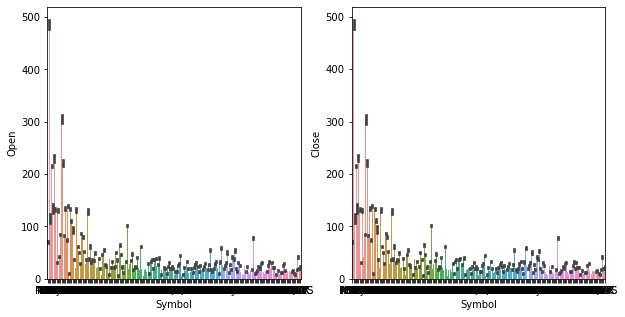

In [35]:
plt.figure(figsize=(10,5))
plt. subplots_adjust()

plt.subplot(1,2,1)
sns.barplot(x="Symbol", y="Open", data=data)

plt.subplot(1,2,2)
sns.barplot(x="Symbol", y="Close", data=data)
plt.show()

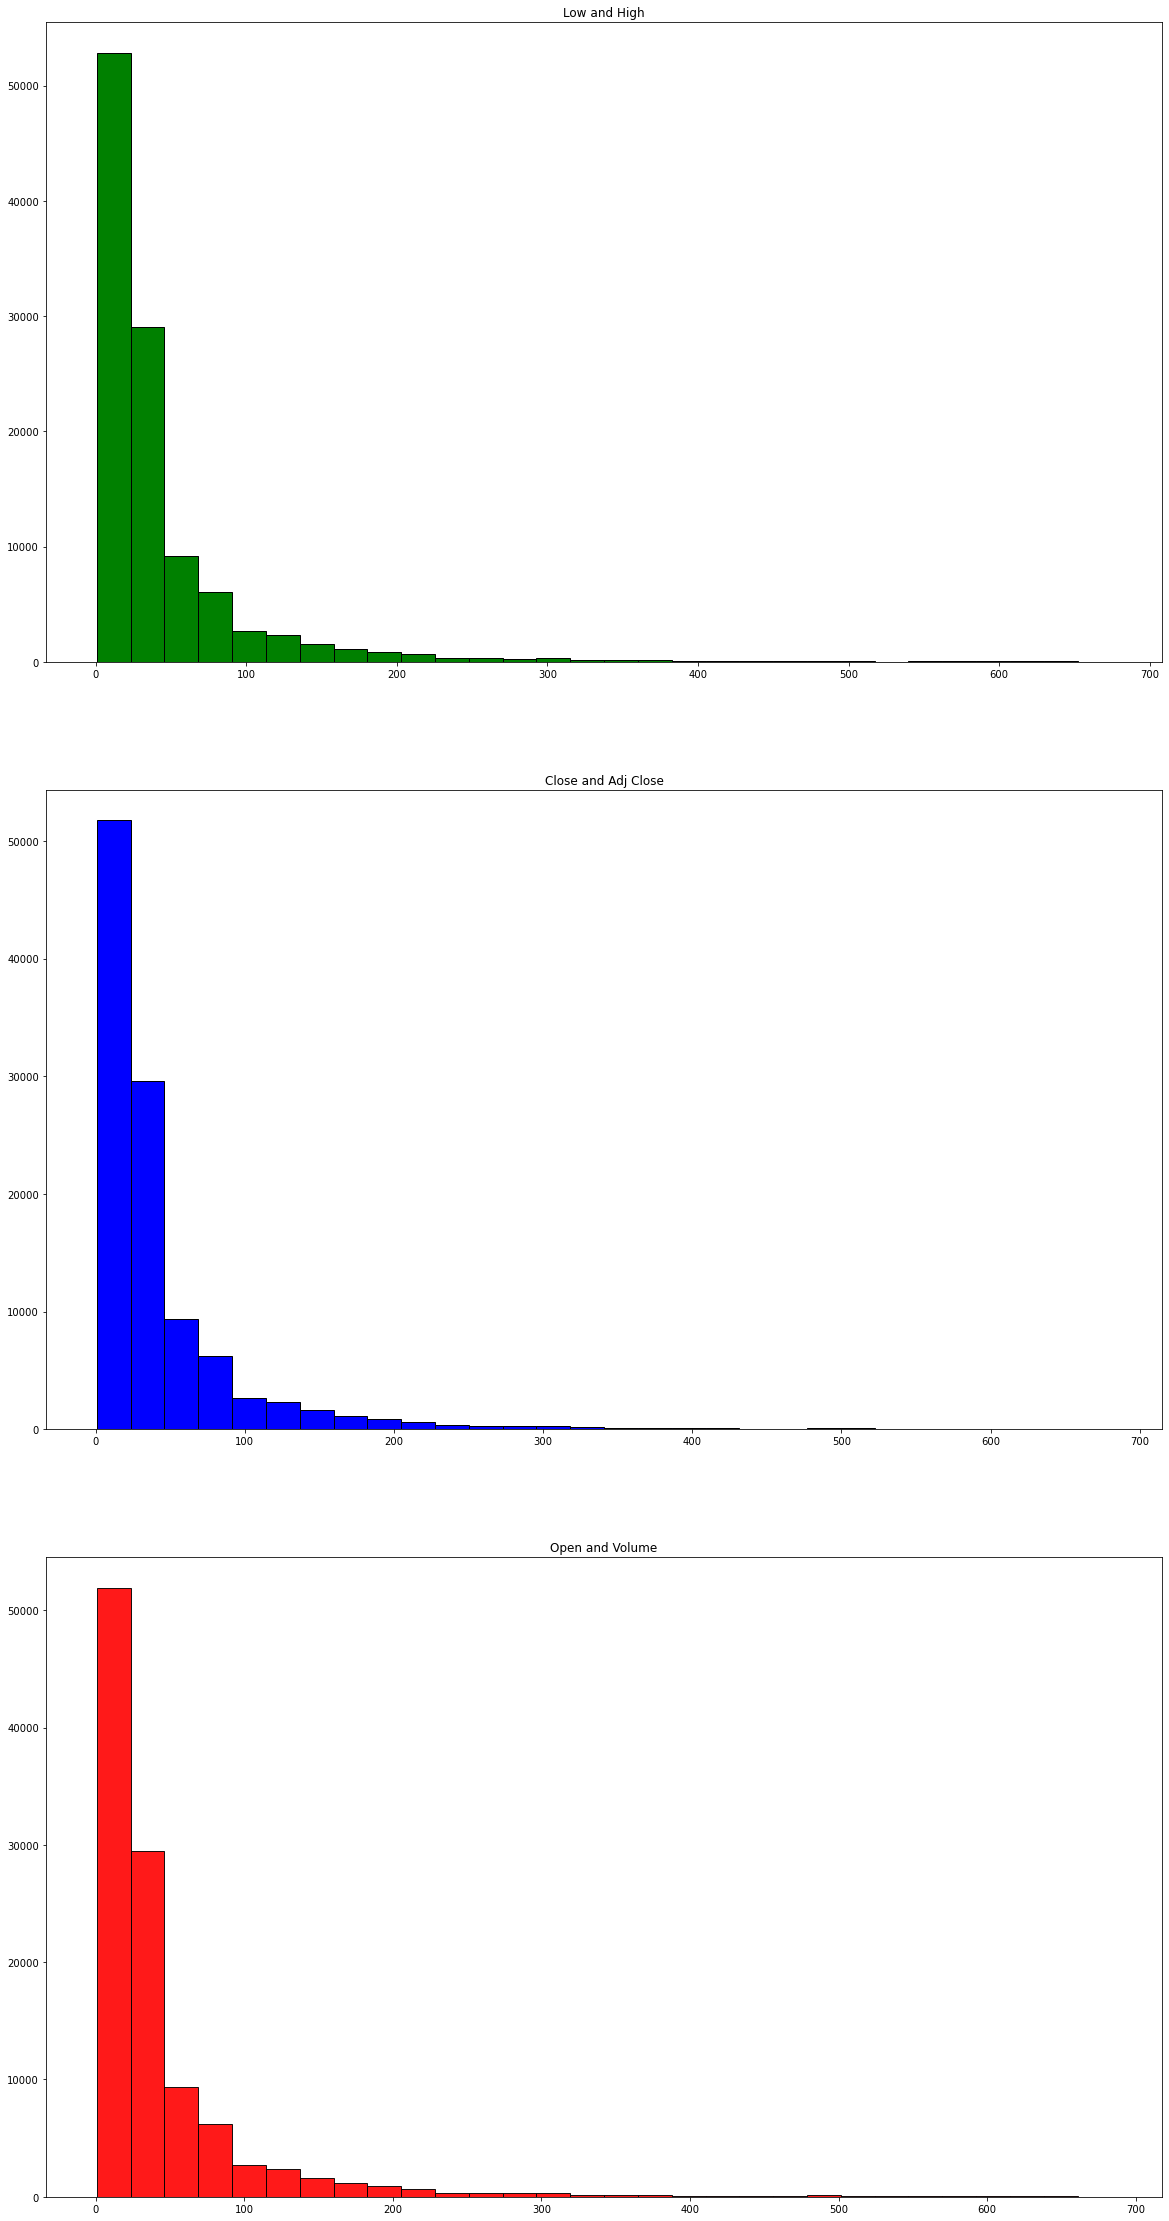

In [36]:
plt.figure(figsize=(20,40))


plt.subplot(3,1,1)
x=data["Low"]
y=data["High"]
plt.title("Low and High")
plt.hist(x, bins=30, facecolor='g',edgecolor='black')


plt.subplot(3,1,2)
x=data["Close"]
y=data["Adj Close"]
plt.title("Close and Adj Close")
plt.hist(x, bins=30, facecolor='b', edgecolor='black')

plt.subplot(3,1,3)
x=data["Open"]
y=data["Volume"]
plt.title("Open and Volume")
plt.hist(x, bins=30, facecolor='r', alpha=0.9, edgecolor='black')
plt.show()

(ii) Scatter Plot

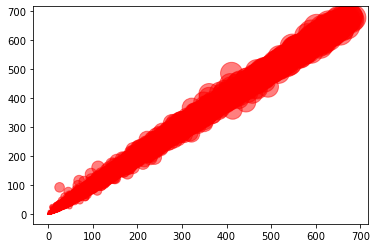

In [37]:
x=data["Open"]
y=data["Close"]
z=data["Adj Close"]
size=(20)
plt.scatter(x,y,z, color=["r"], alpha=0.5)

# Data cleaning

Outliers detection and treatments:
    
    Outlier Treatment: Outlier are extreme values that outlier from other observations on data, they may indicate the variability of measurement experiment of errors or a novelty.

Box plot are great way to detecting the outliers. Once the outlier have been detected.

<AxesSubplot:xlabel='Volume'>

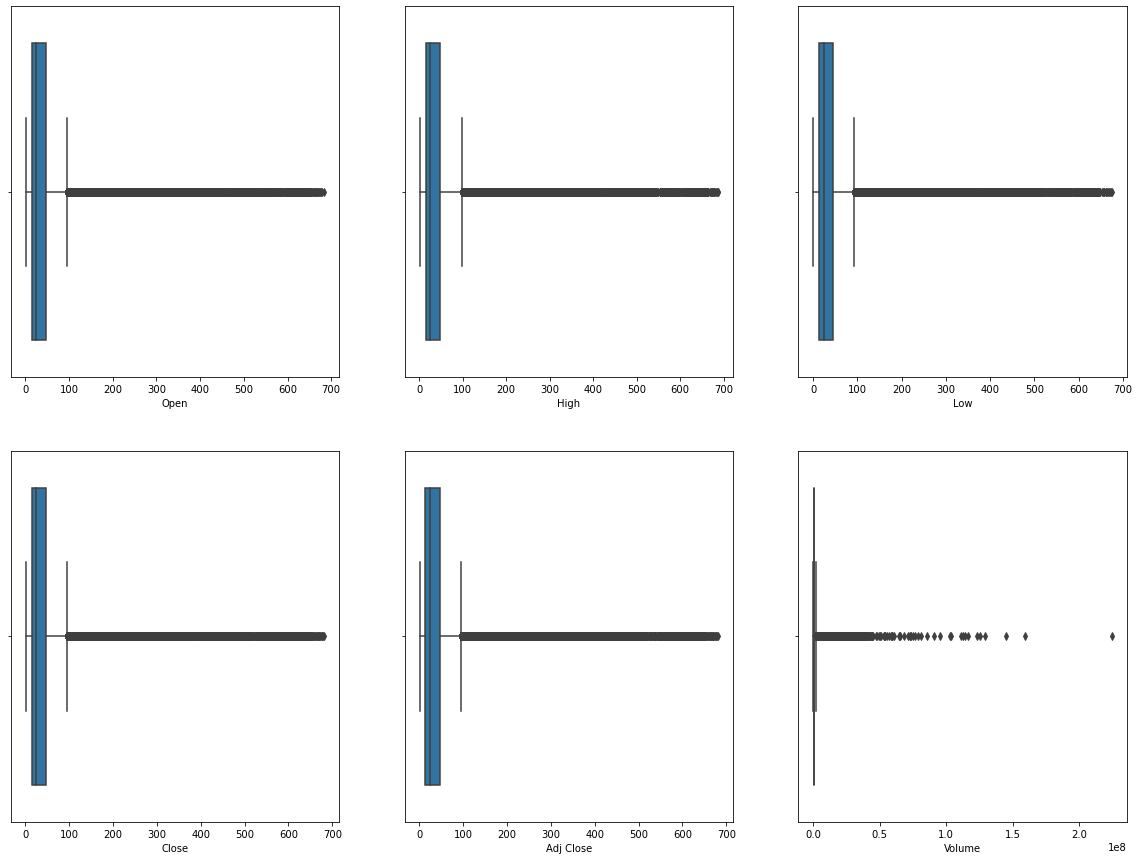

In [38]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(data["Open"])

plt.subplot(2,3,2)
sns.boxplot(data["High"])

plt.subplot(2,3,3)
sns.boxplot(data["Low"])

plt.subplot(2,3,4)
sns.boxplot(data["Close"])

plt.subplot(2,3,5)
sns.boxplot(data["Adj Close"])

plt.subplot(2,3,6)
sns.boxplot(data["Volume"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa520a8490>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa520a8bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa520a8100>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa520ab310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa520ab6a0>],
 'means': []}

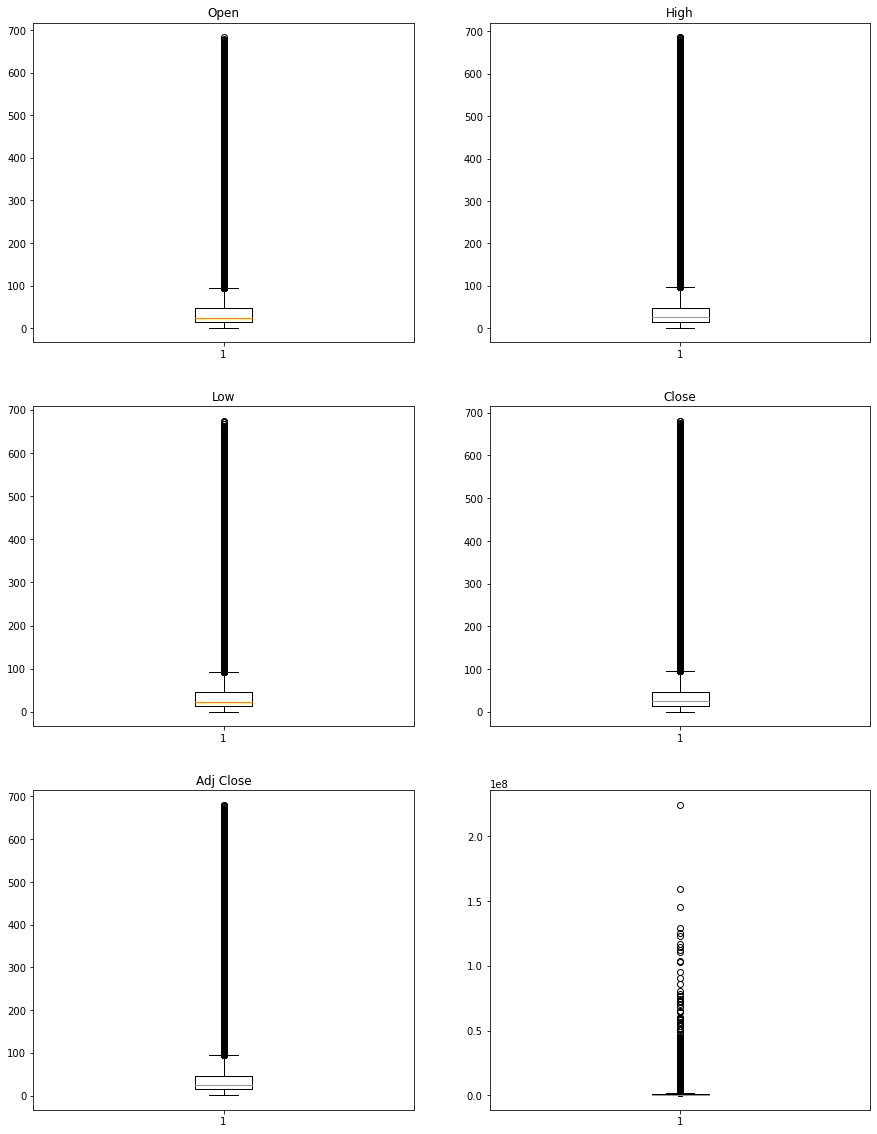

In [39]:
plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
plt.boxplot(data["Open"])
plt.title("Open")

plt.subplot(3,2,2)
plt.boxplot(data["High"])
plt.title("High")


plt.subplot(3,2,3)
plt.boxplot(data["Low"])
plt.title("Low")


plt.subplot(3,2,4)
plt.boxplot(data["Close"])
plt.title("Close")


plt.subplot(3,2,5)
plt.boxplot(data["Adj Close"])
plt.title("Adj Close")

plt.subplot(3,2,6)
plt.boxplot(data["Volume"])

We have outliers in all columns so we can remove this outliers by using interquartile range

# Inter quartile range (IQR)¶

In [40]:
Q1=data.quantile(0.25)
Q1

Open             14.38
High             14.85
Low              13.88
Close            14.33
Adj Close        14.30
Volume       137900.00
Name: 0.25, dtype: float64

In [41]:
Q3=data.quantile(0.75)
Q3

Open             46.700001
High             48.040001
Low              45.290001
Close            46.660000
Adj Close        46.589153
Volume       776100.000000
Name: 0.75, dtype: float64

In [42]:
IQR=Q3-Q1
IQR

Open             32.320001
High             33.190001
Low              31.410001
Close            32.330000
Adj Close        32.289153
Volume       638200.000000
dtype: float64

In [43]:
Lower_Limit=Q1-1.5*IQR
Lower_Limit

Open            -34.100001
High            -34.935000
Low             -33.235001
Close           -34.165000
Adj Close       -34.133729
Volume      -819400.000000
dtype: float64

In [44]:
Higher_Limit=Q3+1.5*IQR
Higher_Limit

Open         9.518000e+01
High         9.782500e+01
Low          9.240500e+01
Close        9.515500e+01
Adj Close    9.502288e+01
Volume       1.733400e+06
dtype: float64

# Outlier Removing

In [45]:
New_data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
New_data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-02-08  48.599998  48.930000  48.470001  48.910000  46.454433   906700.0   
2019-02-11  48.680000  48.810001  48.419998  48.660000  46.216980  1001200.0   
2019-02-12  48.990002  49.480000  48.830002  49.400002  46.919834   868600.0   
2019-02-13  49.040001  49.279999  49.020000  49.090000  46.625393   868900.0   
2019-02-20  49.840000  50.009998  49.549999  49.700001  47.204773  1063800.0   
...               ...        ...        ...        ...        ...        ...   
2022-02-02  15.300000  15.300000  13.760000  13.870000  13.870000    65500.0   
2022-02-03  13.500000  14.000000  13.310000  13.640000  13.640000    39500.0   
2022-02-04  13.620000  14.920000  13.530000  14.720000  14.720000    50700.0   
2022-02-07  14.590000  16.160000  14.470000  14.960000  14.960000    74000.0   
2022-02-08  14.800000  15.200000  14.010000  14.700000  14.700000    36000.0   

           Symbol  
Date               
2019-02-08    NVO  
2019-02-11    NVO  
2019-02-12    NVO  
2019-02-13    NVO  
2019-02-20    NVO  
...           ...  
2022-02-02   ANVS  
2022-02-03   ANVS  
2022-02-04   ANVS  
2022-02-07   ANVS  
2022-02-08   ANVS  

[89929 rows x 7 columns]

In [47]:
New_data.shape

(89929, 7)

In [48]:
New_data.describe()

Open          High           Low         Close     Adj Close  \
count  89929.000000  89929.000000  89929.000000  89929.000000  89929.000000   
mean      28.061817     28.844257     27.238680     28.017234     27.994512   
std       20.181171     20.619687     19.721732     20.167789     20.162960   
min        0.752000      0.850000      0.700000      0.750000      0.750000   
25%       13.580000     13.990000     13.110000     13.520000     13.500000   
50%       22.400000     23.059999     21.660000     22.330000     22.320000   
75%       36.730000     37.820000     35.650002     36.680000     36.680000   
max       95.110001     97.800003     92.394997     95.000000     95.000000   

             Volume  
count  8.992900e+04  
mean   4.249055e+05  
std    3.959282e+05  
min    1.000000e+02  
25%    1.188000e+05  
50%    2.917000e+05  
75%    6.227000e+05  
max    1.733300e+06

In [49]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89929 entries, 2019-02-08 to 2022-02-08
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       89929 non-null  float64
 1   High       89929 non-null  float64
 2   Low        89929 non-null  float64
 3   Close      89929 non-null  float64
 4   Adj Close  89929 non-null  float64
 5   Volume     89929 non-null  float64
 6   Symbol     89929 non-null  string 
dtypes: float64(6), string(1)
memory usage: 5.5 MB


# Visualization after outlier removed

In [50]:
New_data["Open"]=New_data["Open"].clip(lower=New_data["Open"].quantile(0.06), upper=New_data["Open"].quantile(0.94))
New_data["High"]=New_data["High"].clip(lower=New_data["High"].quantile(0.06), upper=New_data["High"].quantile(0.94))
New_data["Low"]=New_data["Low"].clip(lower=New_data["Low"].quantile(0.06), upper=New_data["Low"].quantile(0.94))
New_data["Close"]=New_data["Close"].clip(lower=New_data["Close"].quantile(0.06), upper=New_data["Close"].quantile(0.94))
New_data["Adj Close"]=New_data["Adj Close"].clip(lower=New_data["Adj Close"].quantile(0.06), upper=New_data["Adj Close"].quantile(0.94))
New_data["Volume"]=New_data["Volume"].clip(lower=New_data["Volume"].quantile(0.04), upper=New_data["Volume"].quantile(0.96))

(i) Box Plot:

<AxesSubplot:xlabel='Volume'>

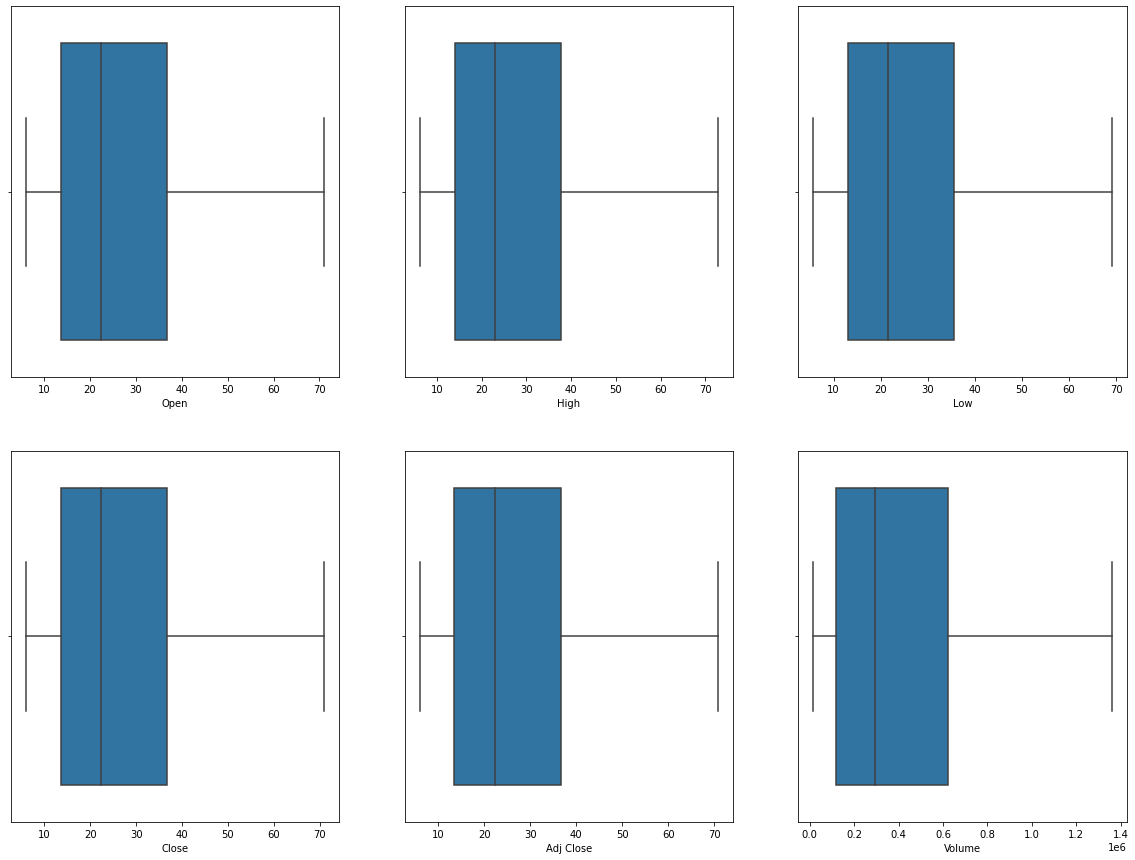

In [51]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(New_data["Open"])

plt.subplot(2,3,2)
sns.boxplot(New_data["High"])

plt.subplot(2,3,3)
sns.boxplot(New_data["Low"])

plt.subplot(2,3,4)
sns.boxplot(New_data["Close"])

plt.subplot(2,3,5)
sns.boxplot(New_data["Adj Close"])

plt.subplot(2,3,6)
sns.boxplot(New_data["Volume"])

In [61]:
New_data.to_csv("New Stock Data.csv")

(ii) Heatmap

In [57]:
corr=New_data.corr()

In [58]:
corr

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999048  0.999050  0.998347   0.998285  0.185278
High       0.999048  1.000000  0.998535  0.999104   0.999075  0.185579
Low        0.999050  0.998535  1.000000  0.999144   0.999051  0.185653
Close      0.998347  0.999104  0.999144  1.000000   0.999939  0.185972
Adj Close  0.998285  0.999075  0.999051  0.999939   1.000000  0.185610
Volume     0.185278  0.185579  0.185653  0.185972   0.185610  1.000000

<AxesSubplot:>

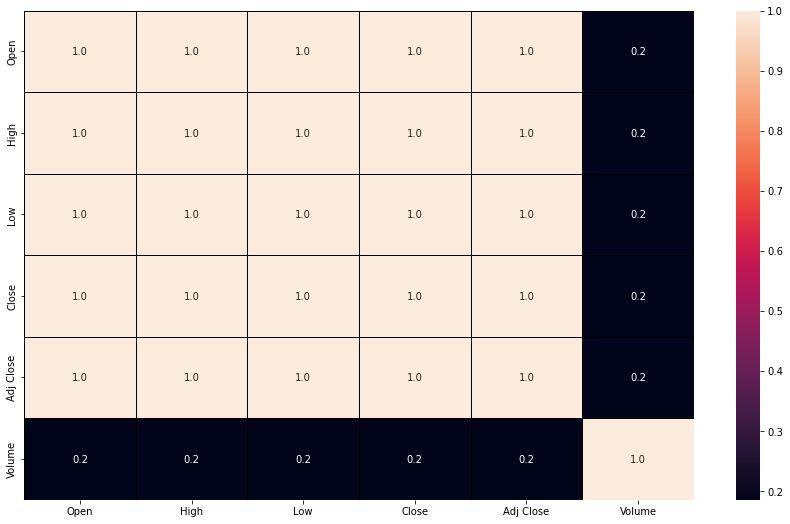

In [59]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, linecolor="black", linewidths=1, fmt='.1f')

(iii) Histogram:

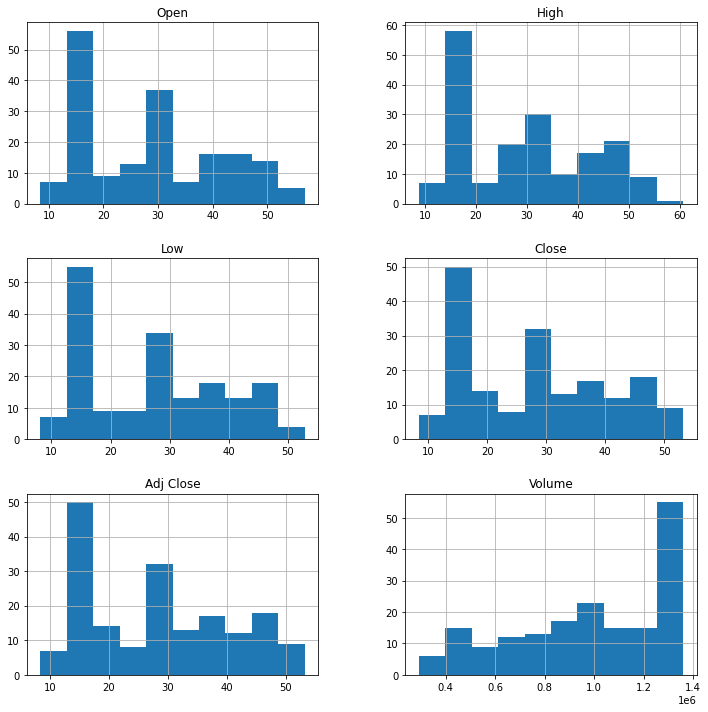

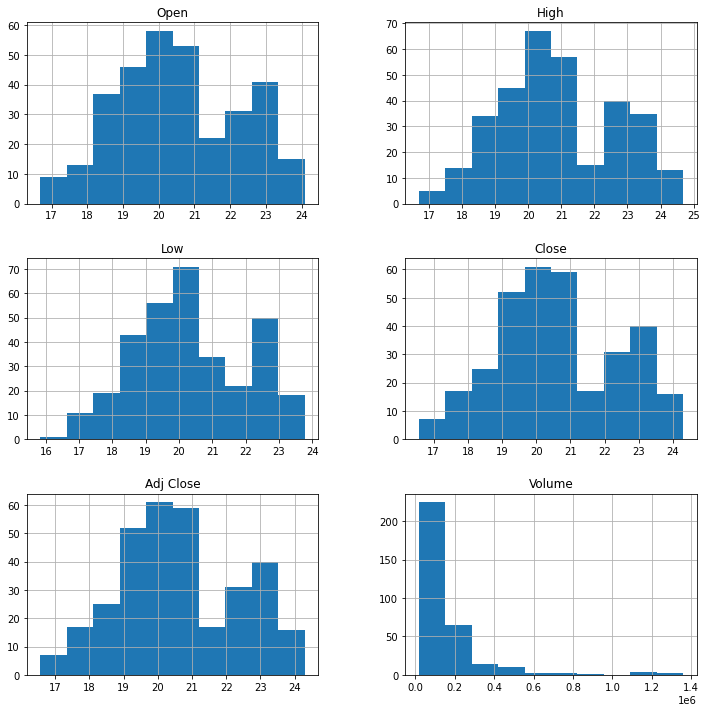

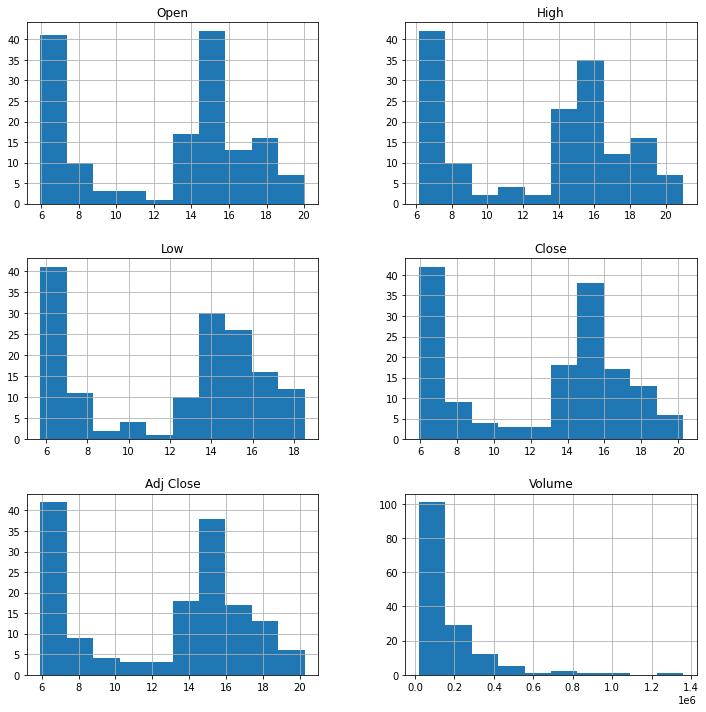

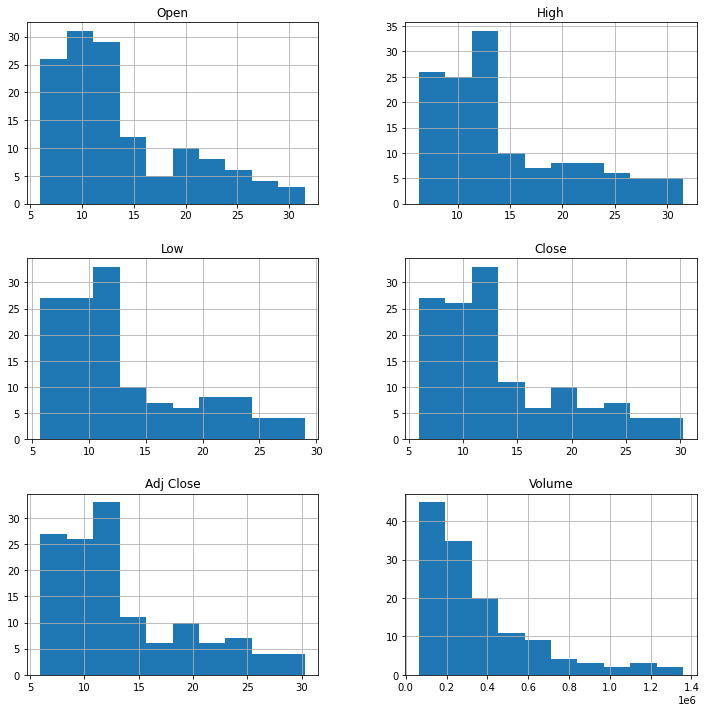

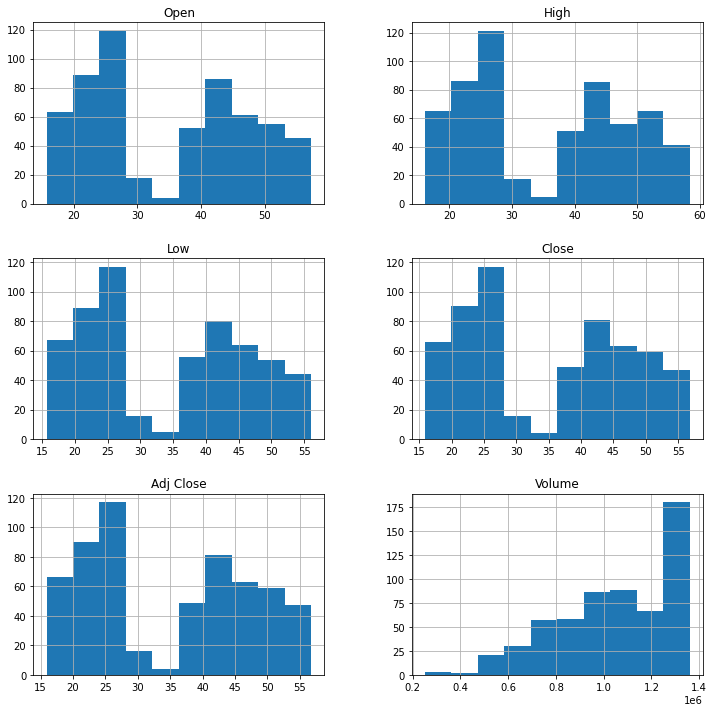

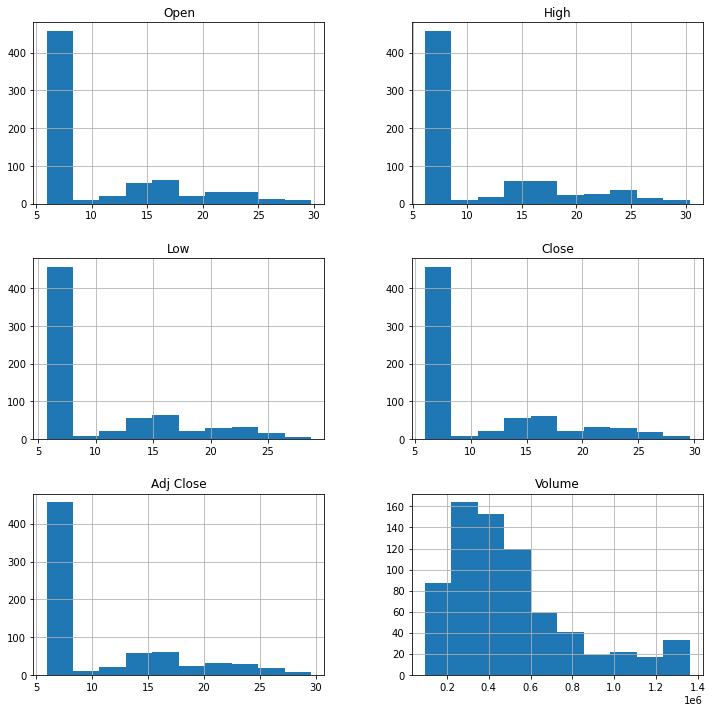

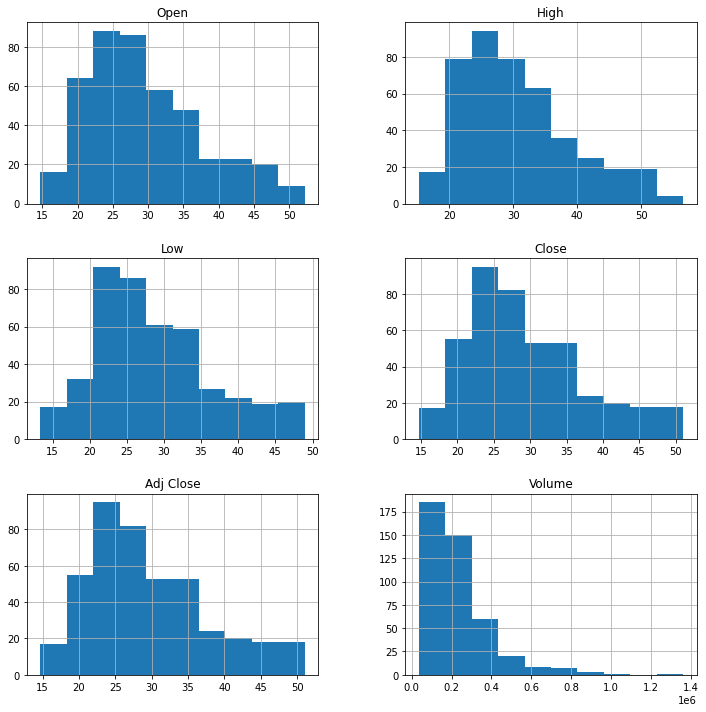

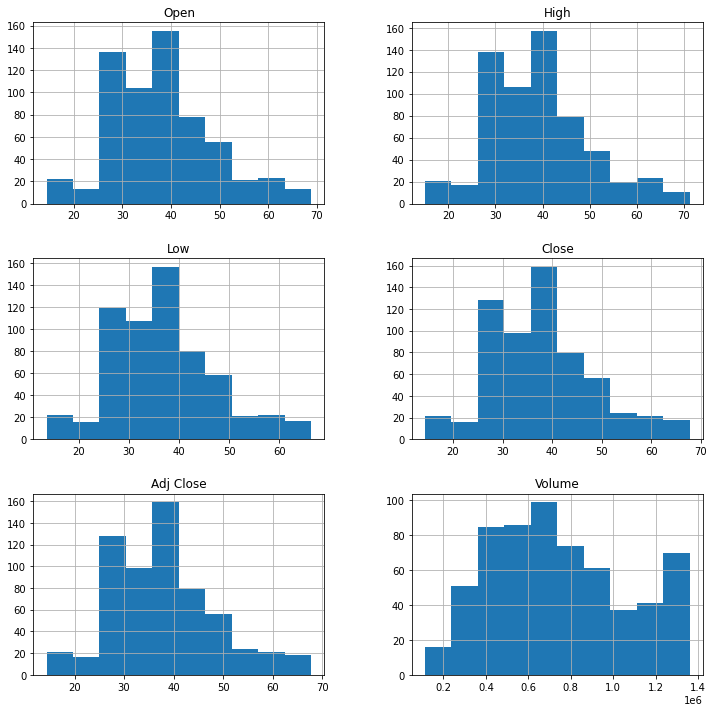

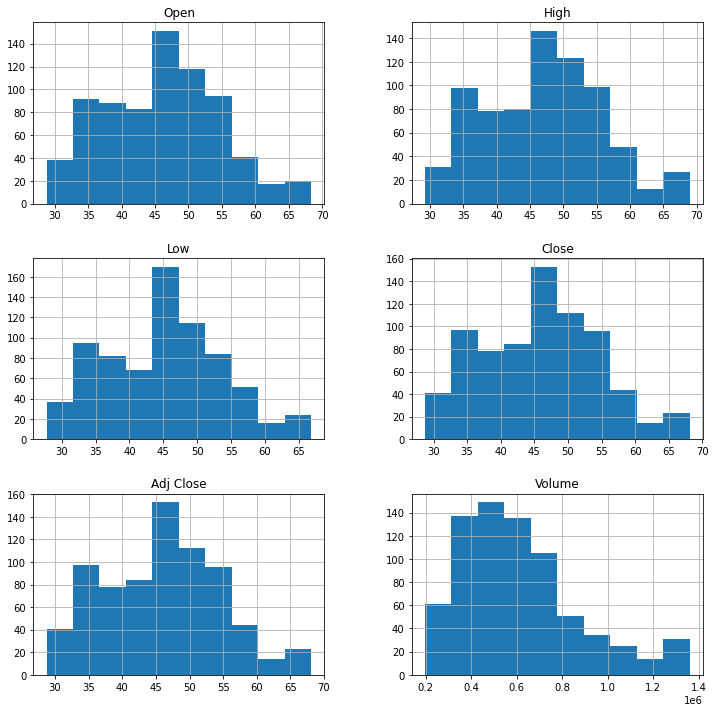

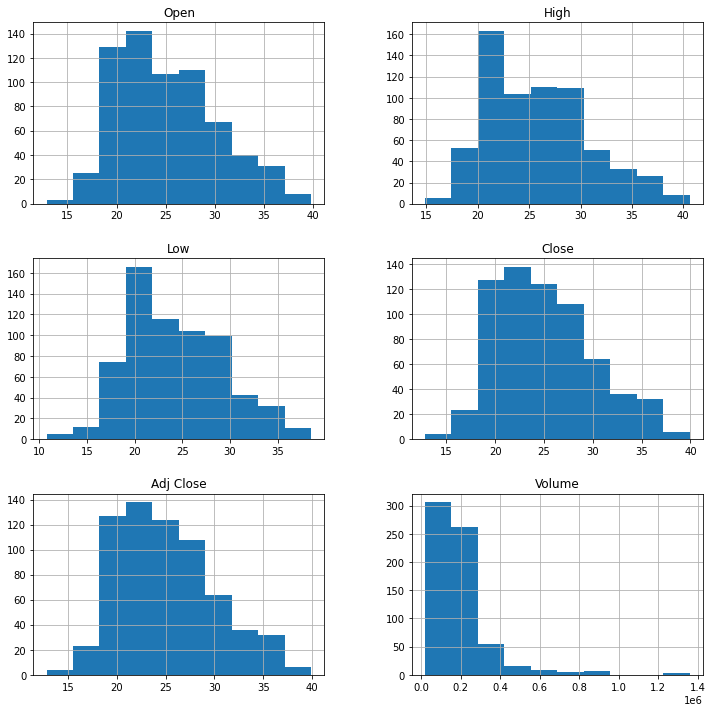

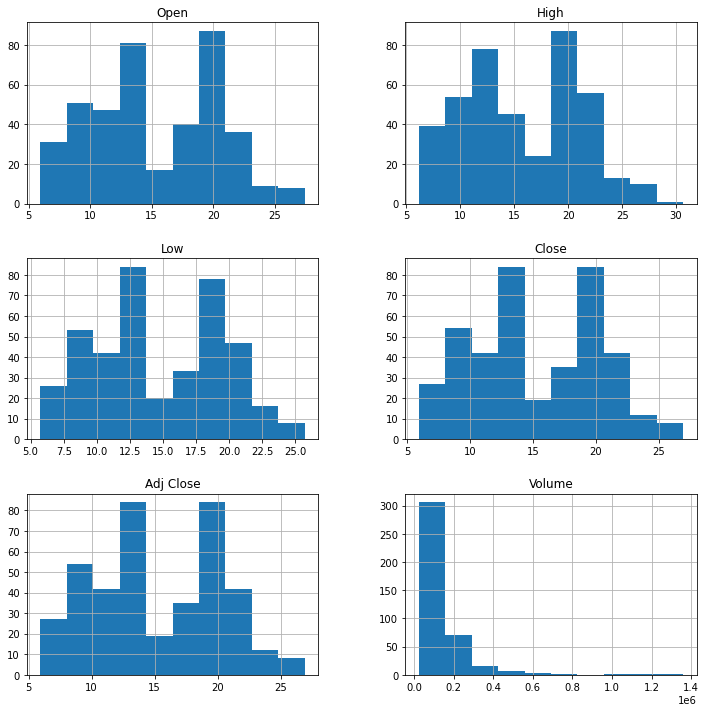

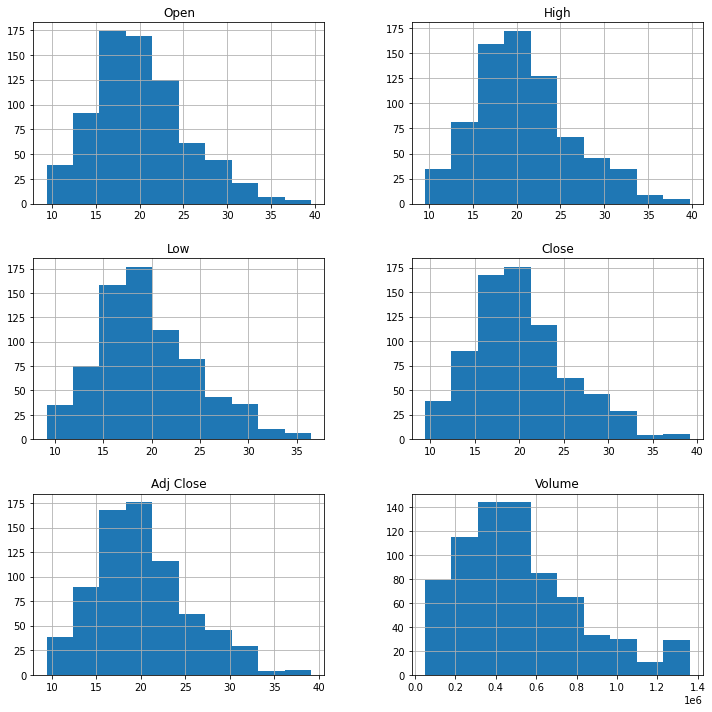

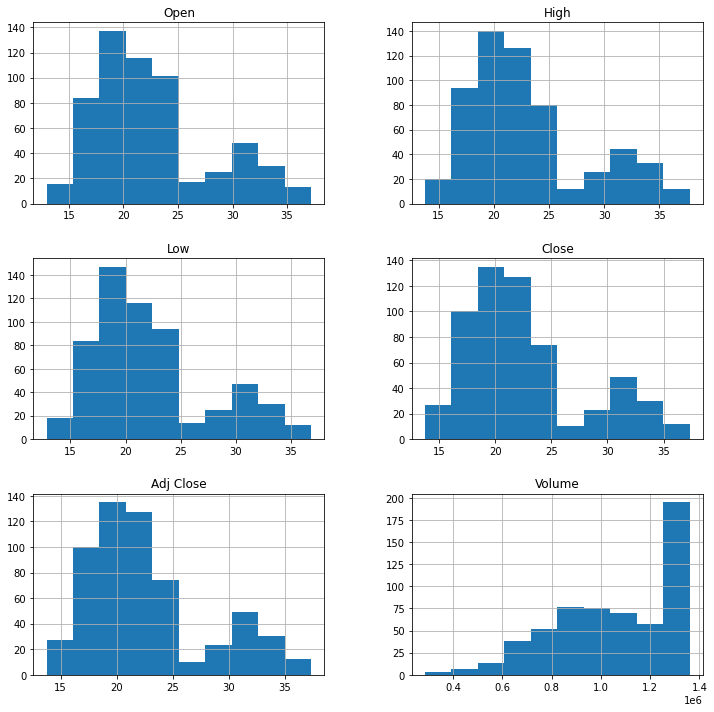

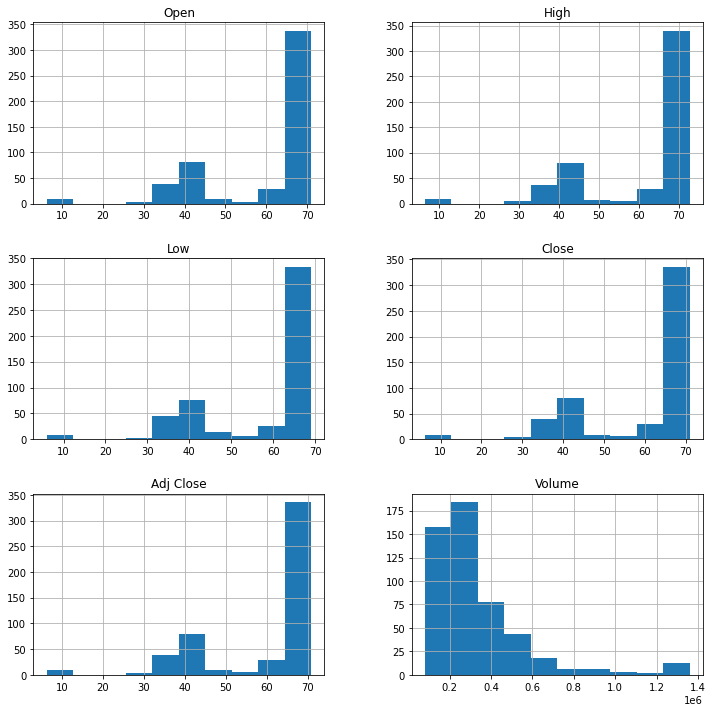

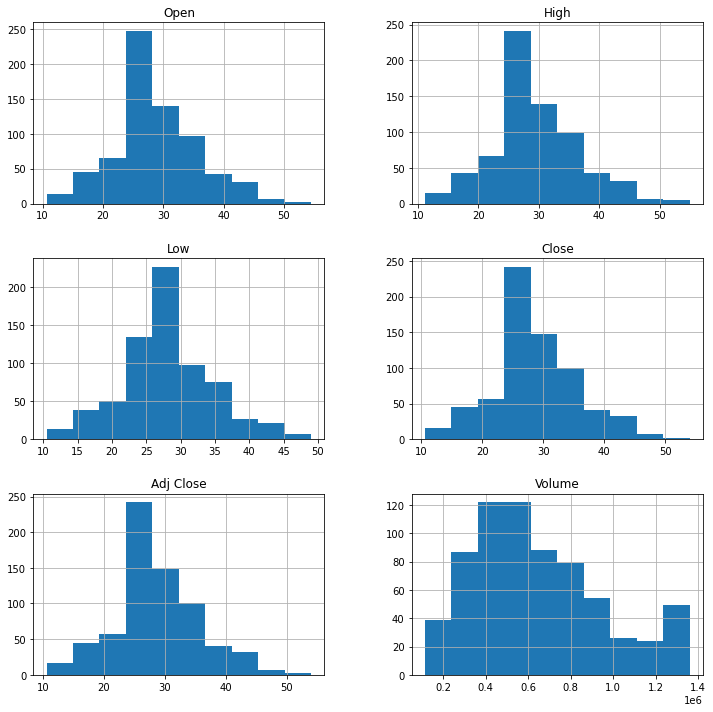

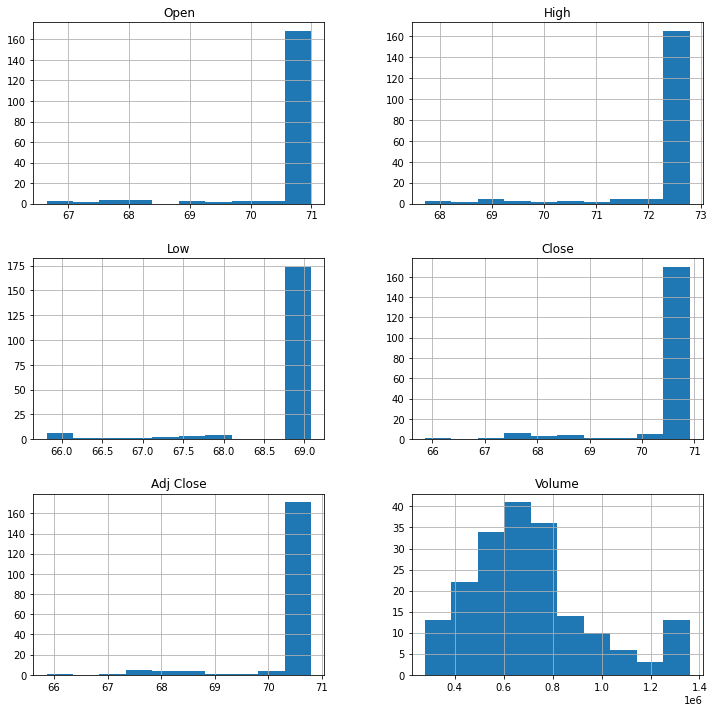

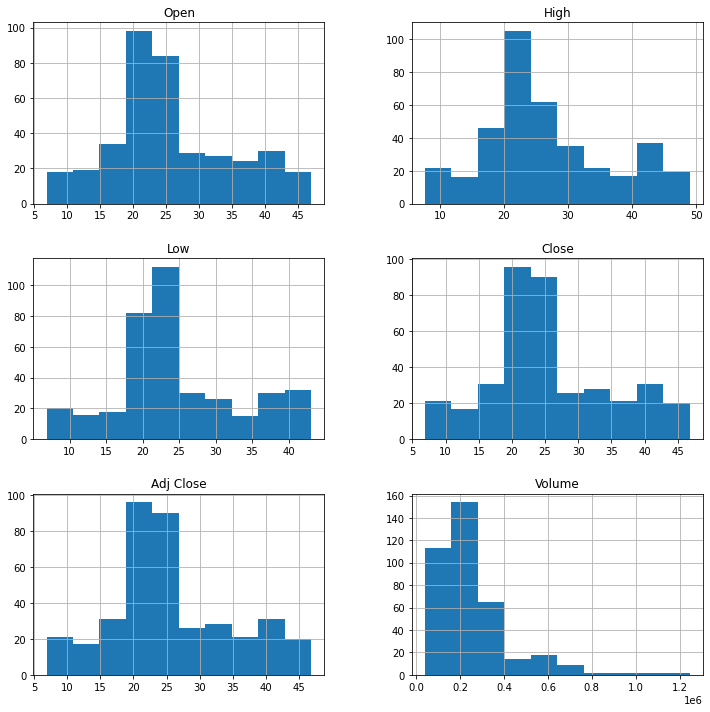

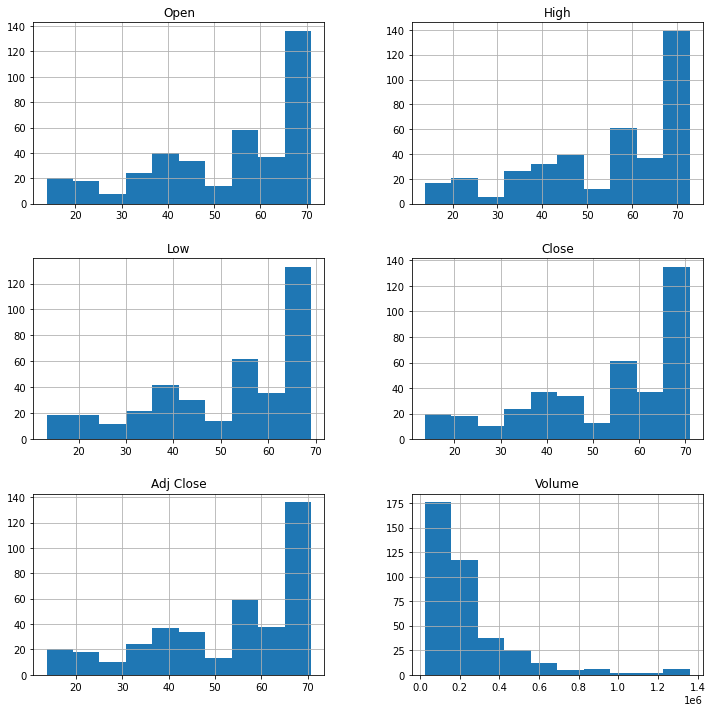

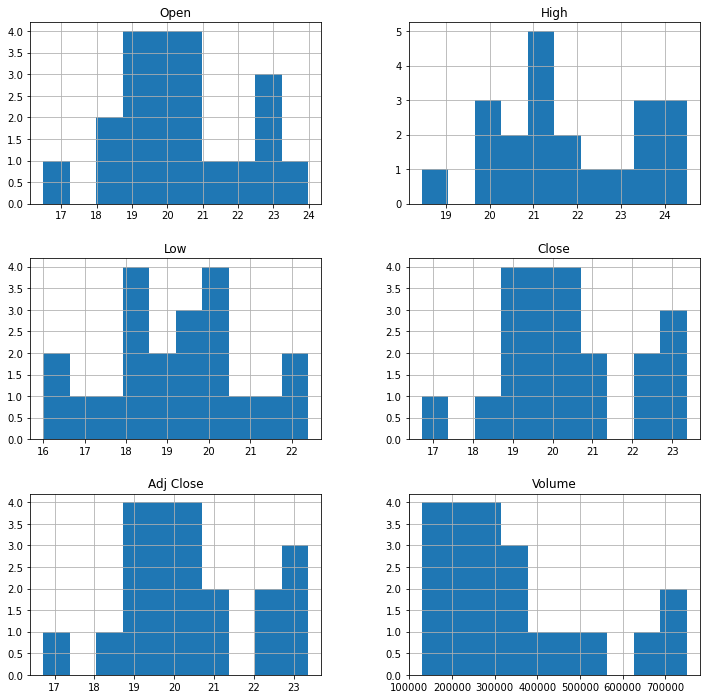

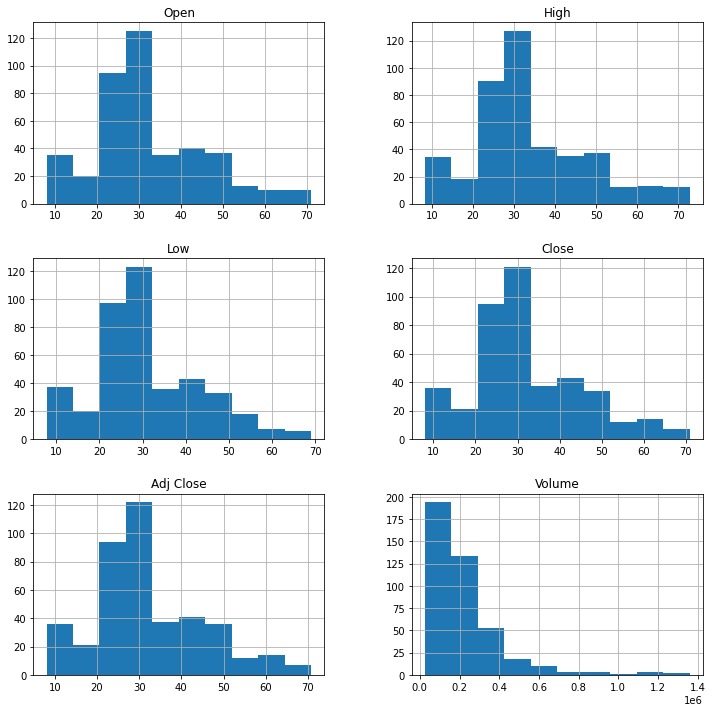

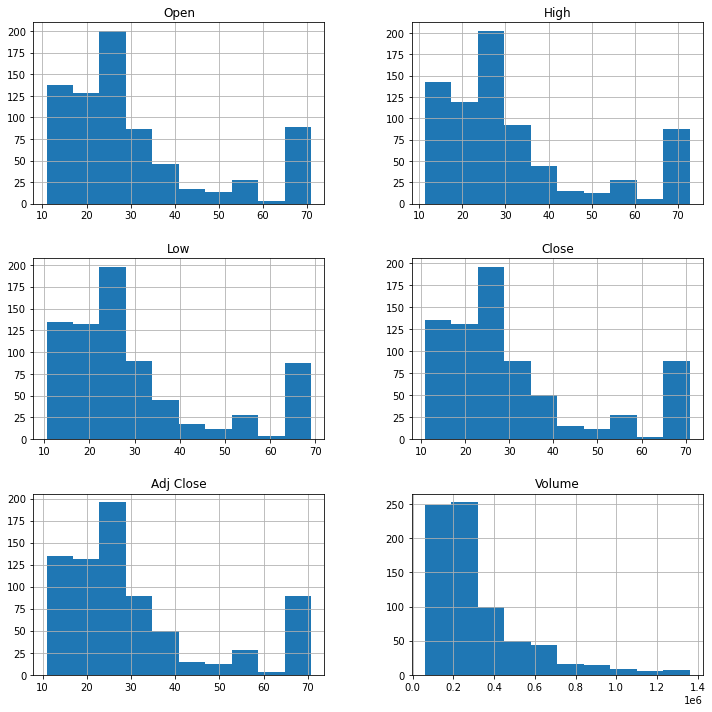

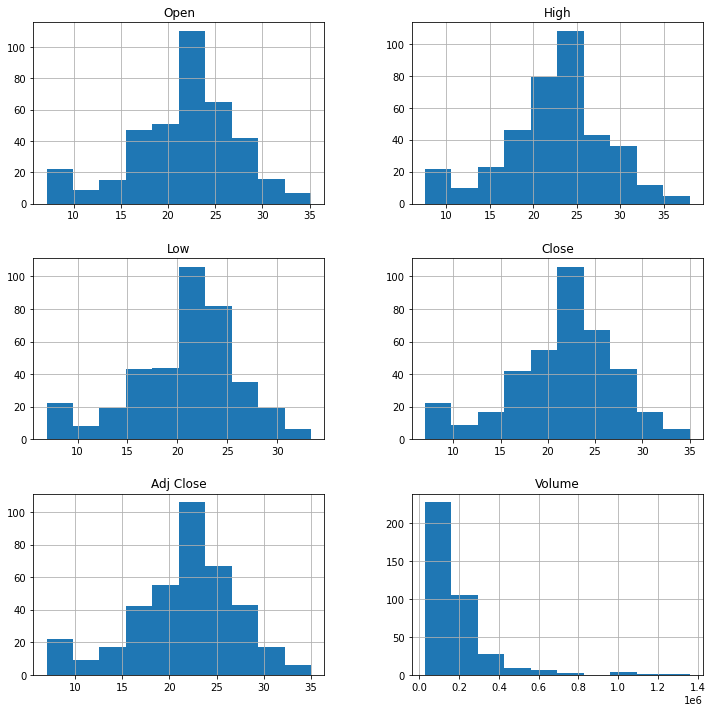

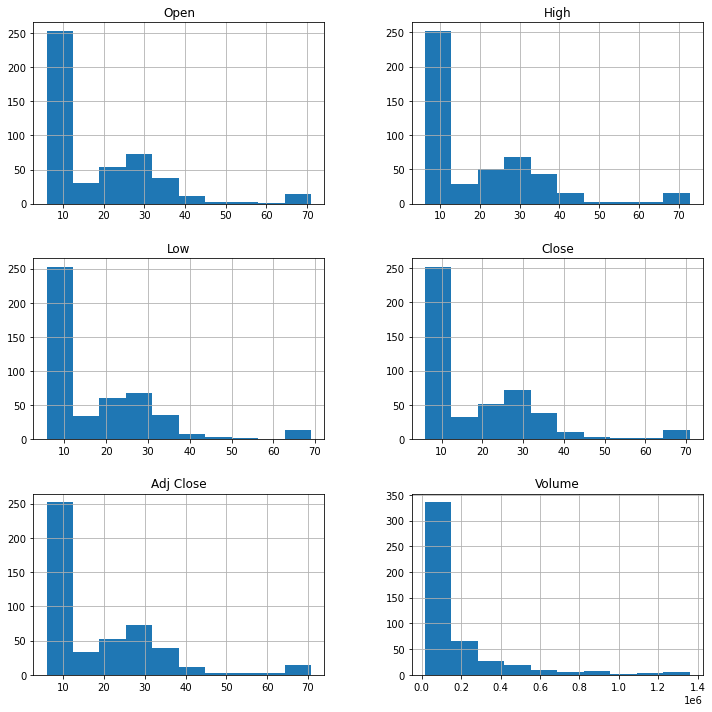

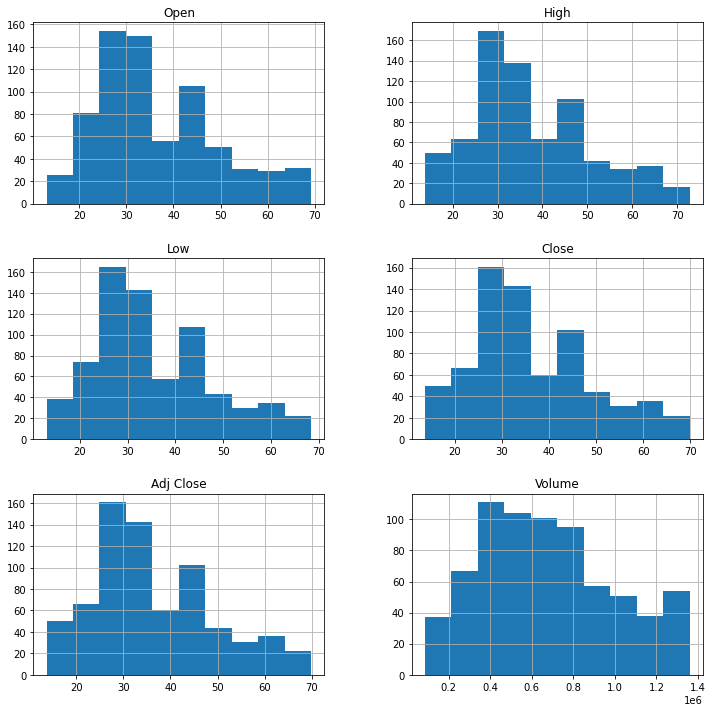

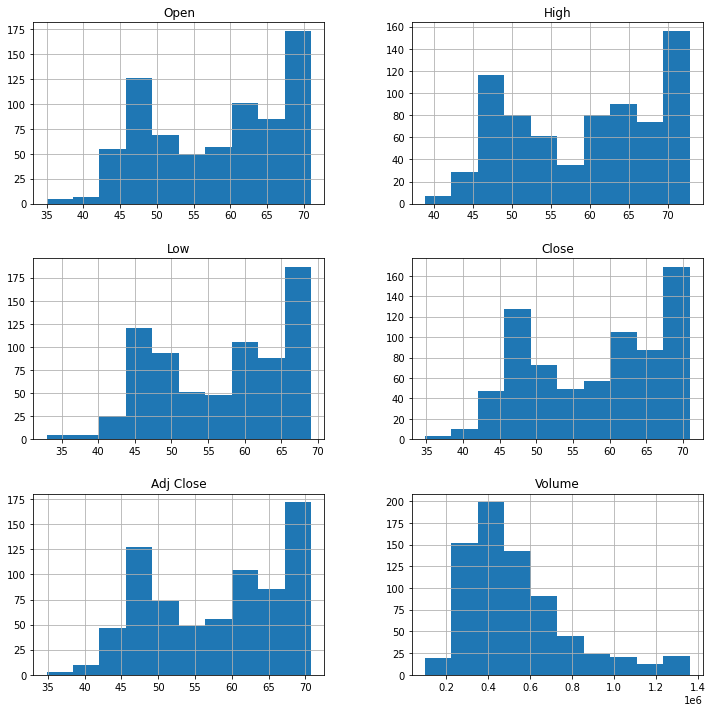

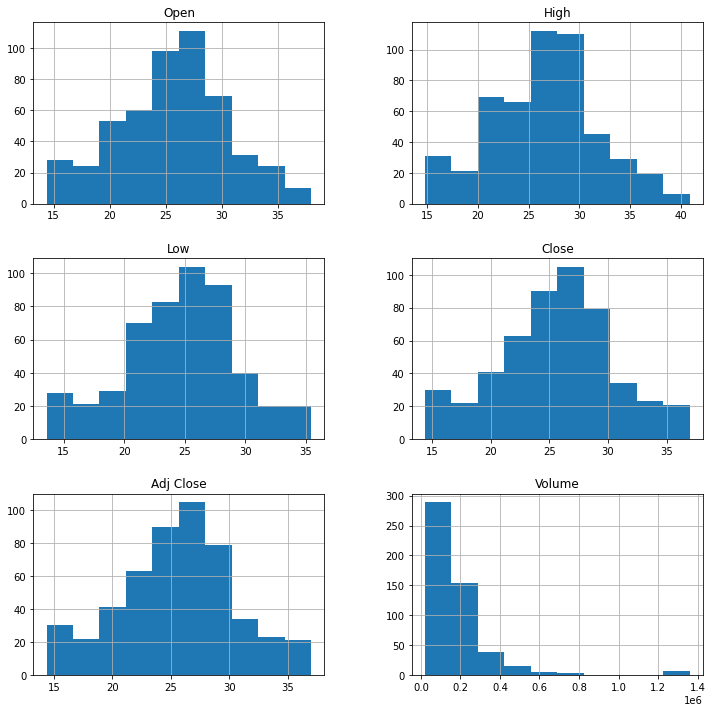

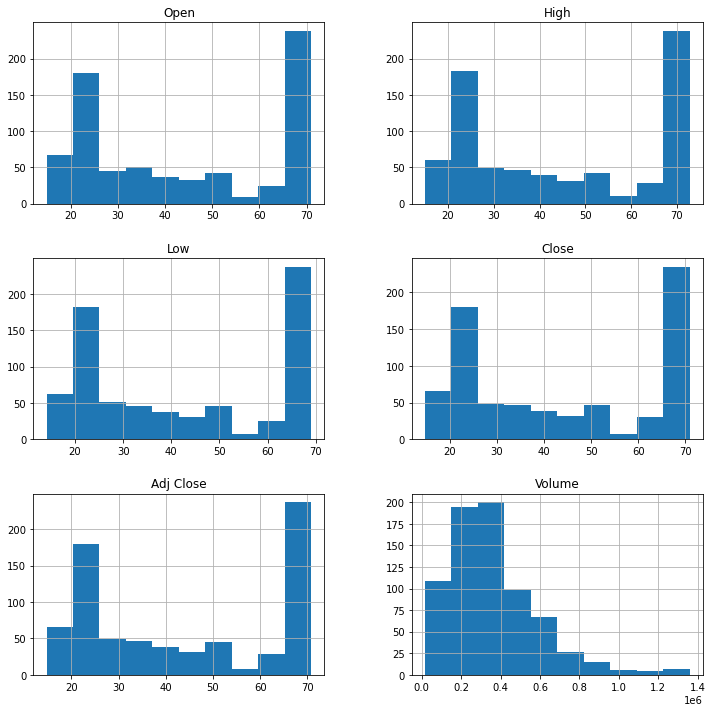

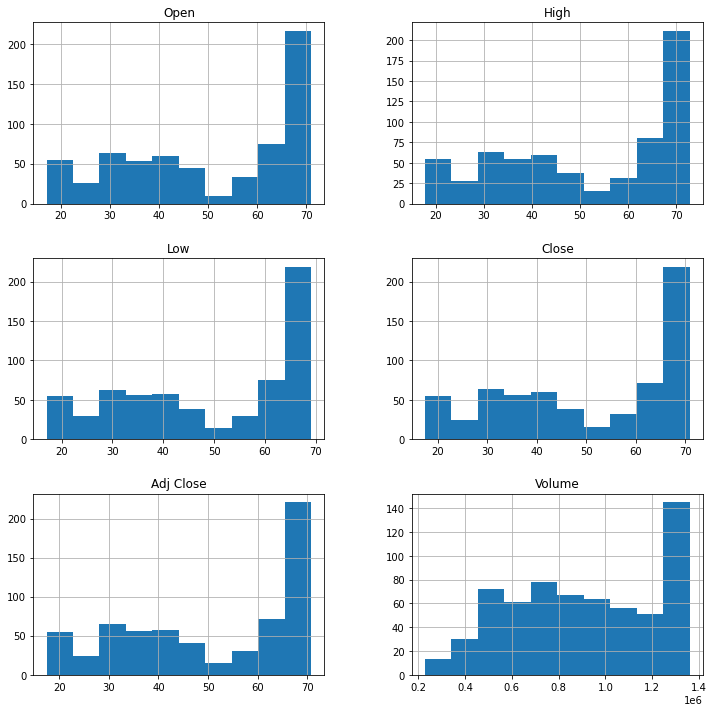

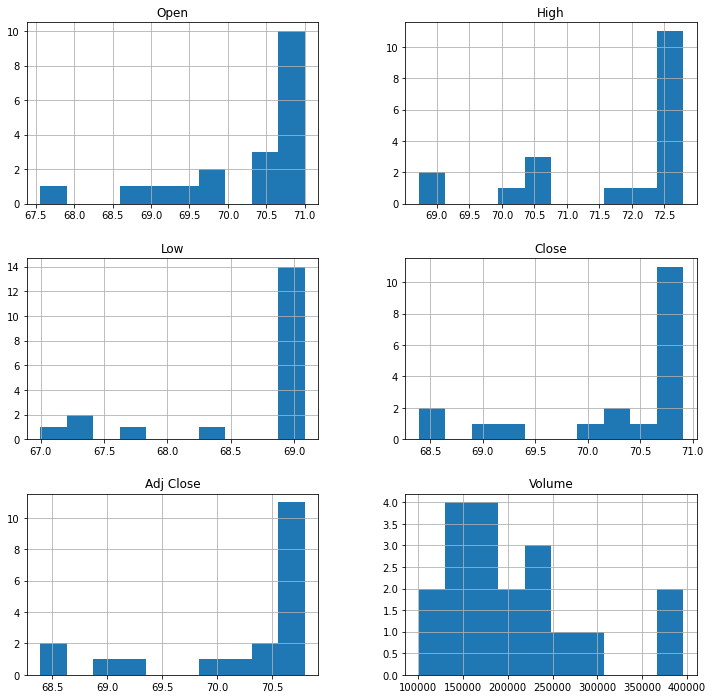

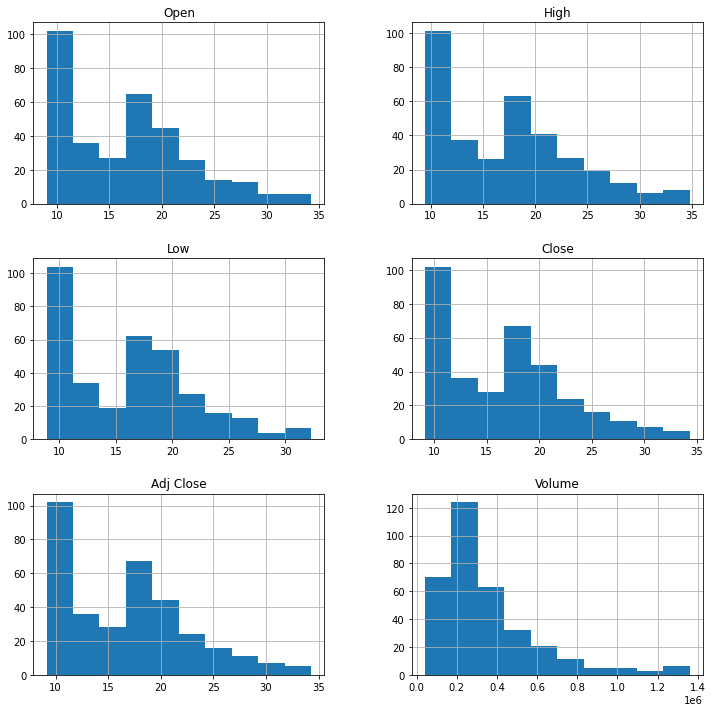

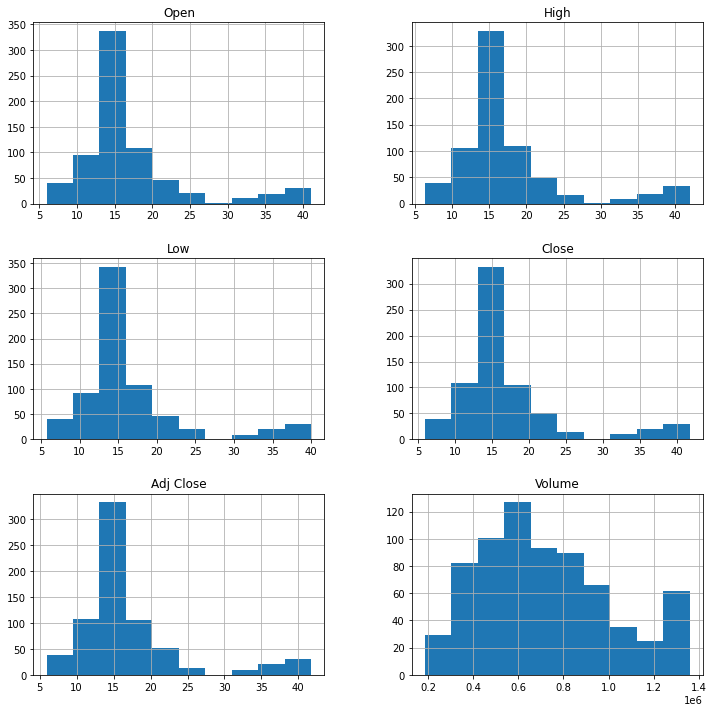

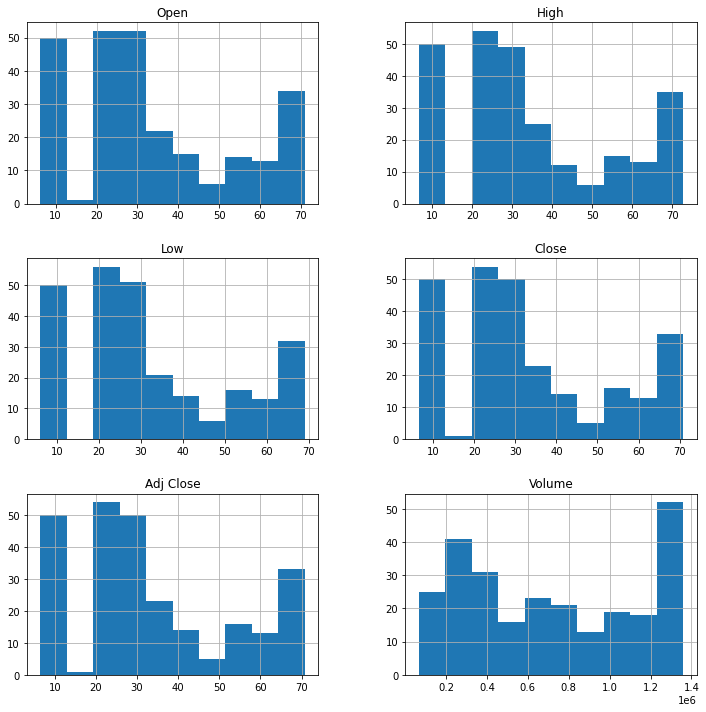

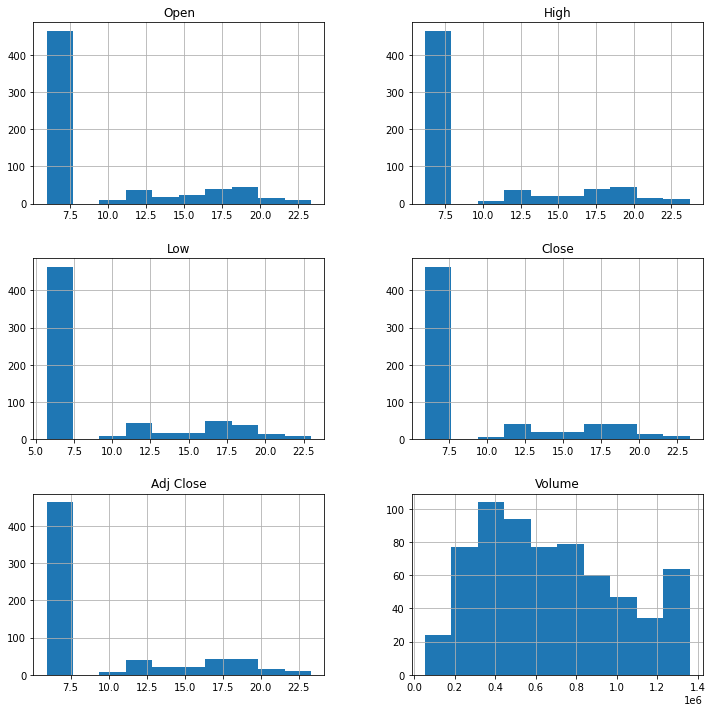

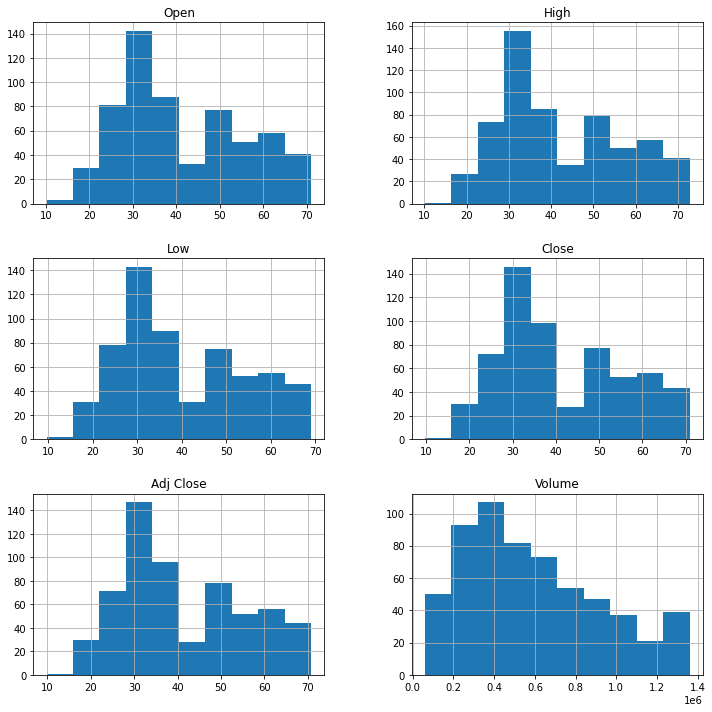

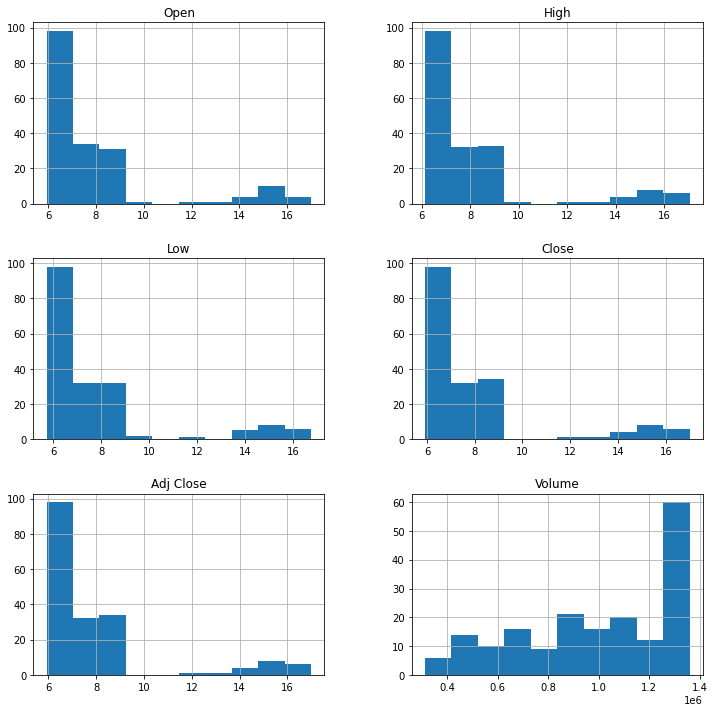

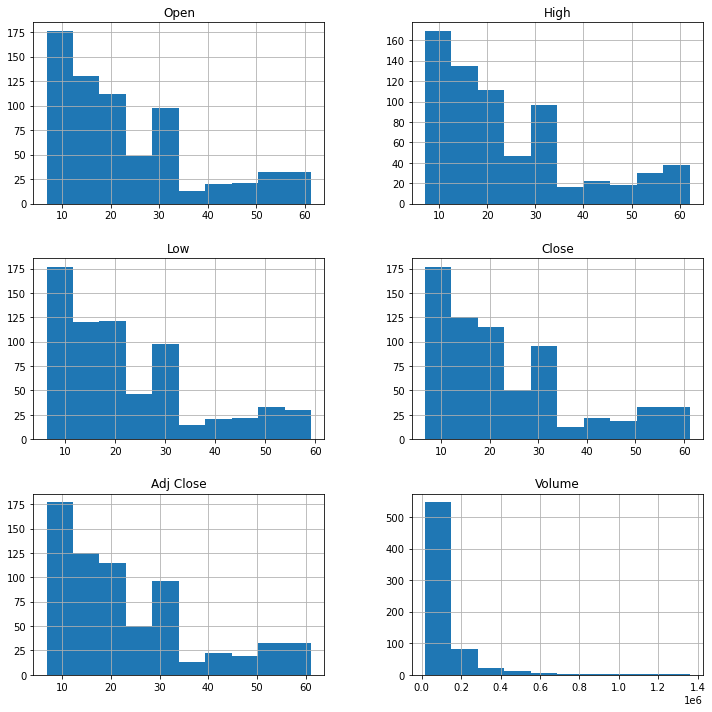

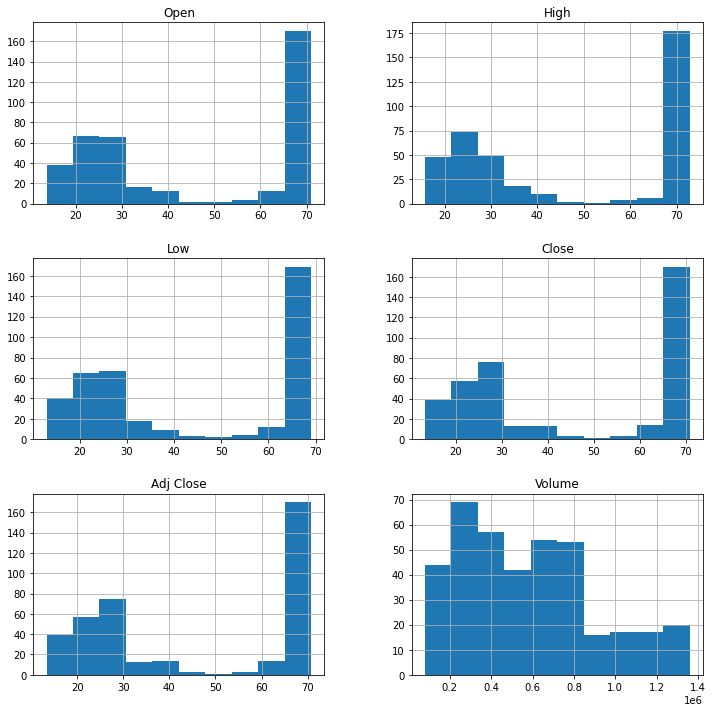

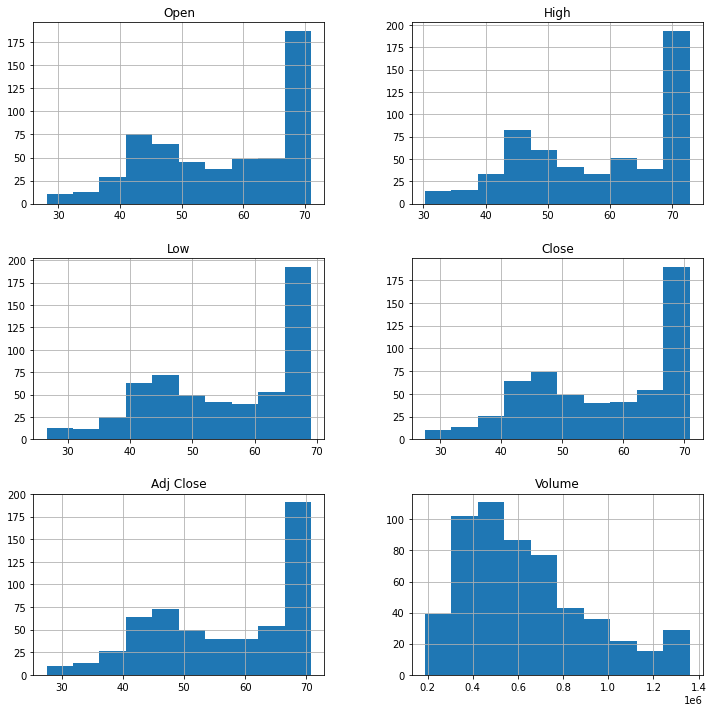

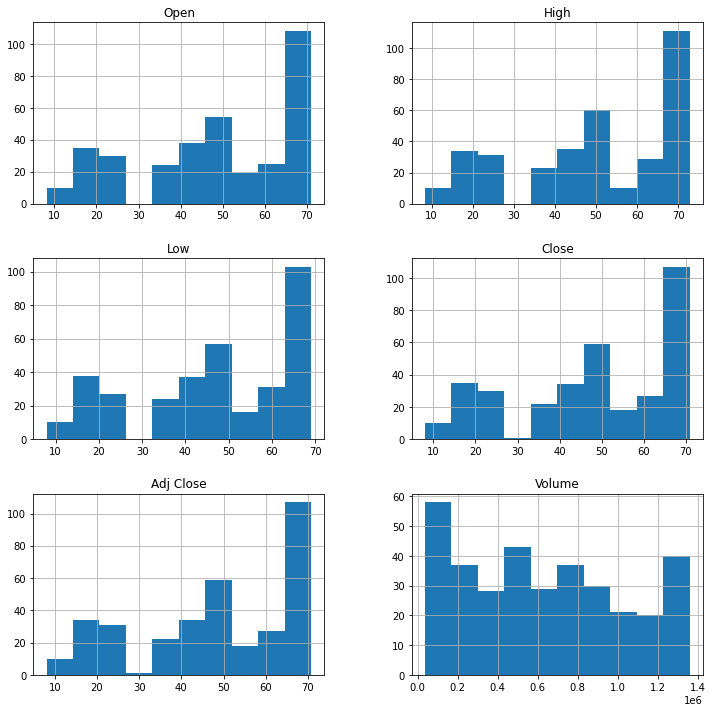

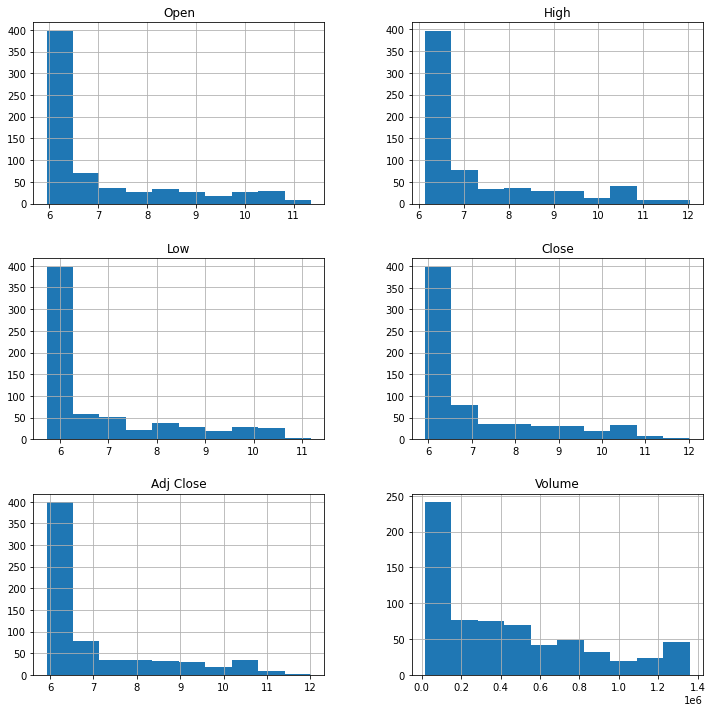

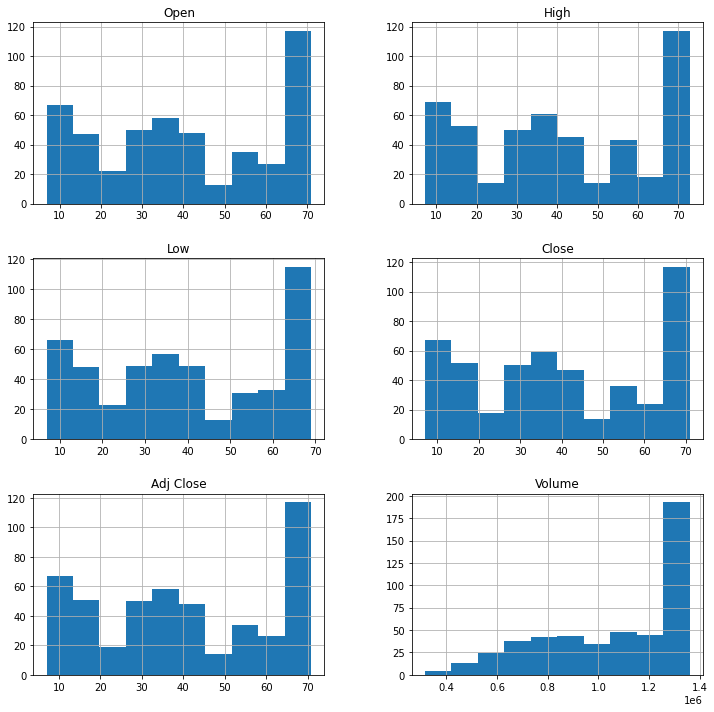

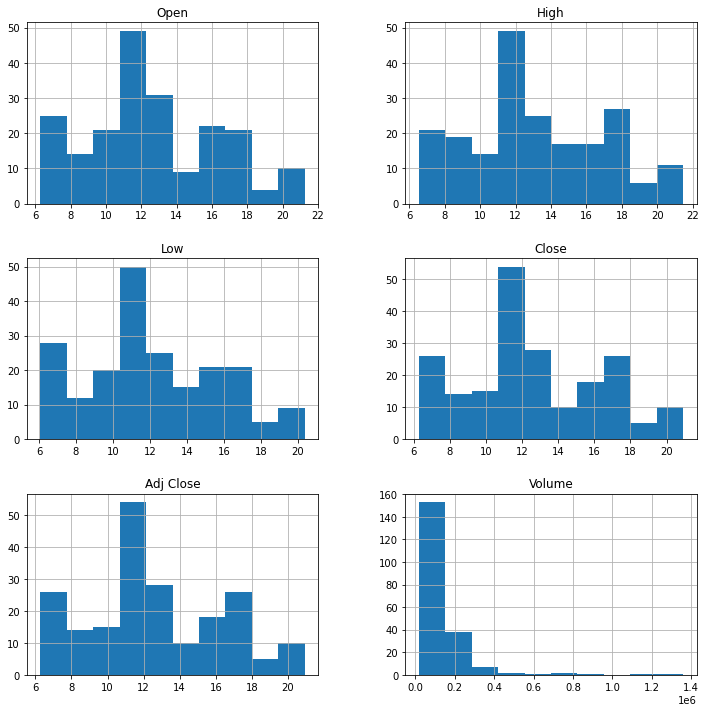

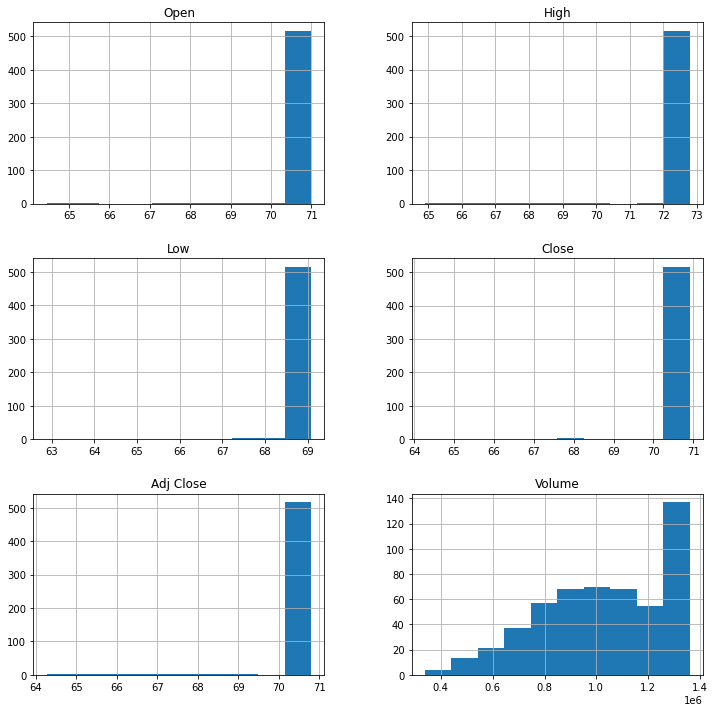

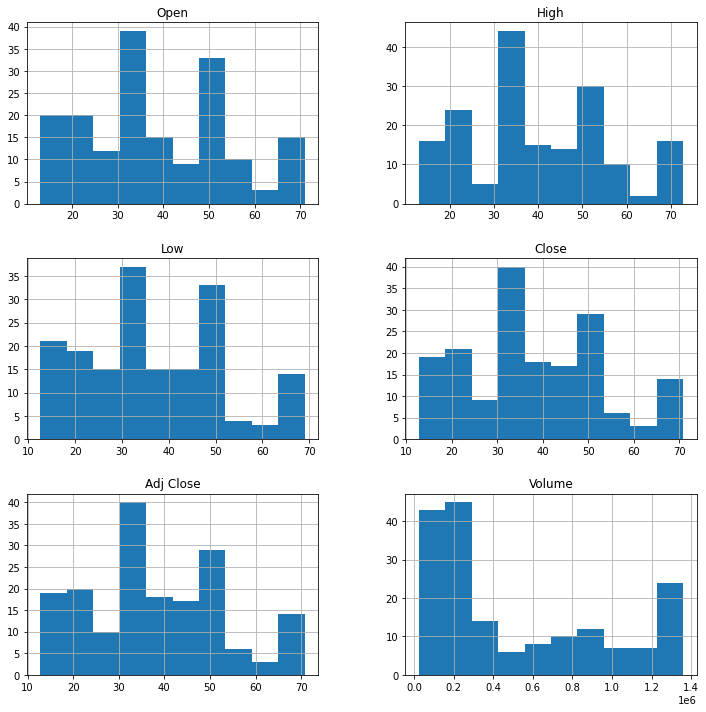

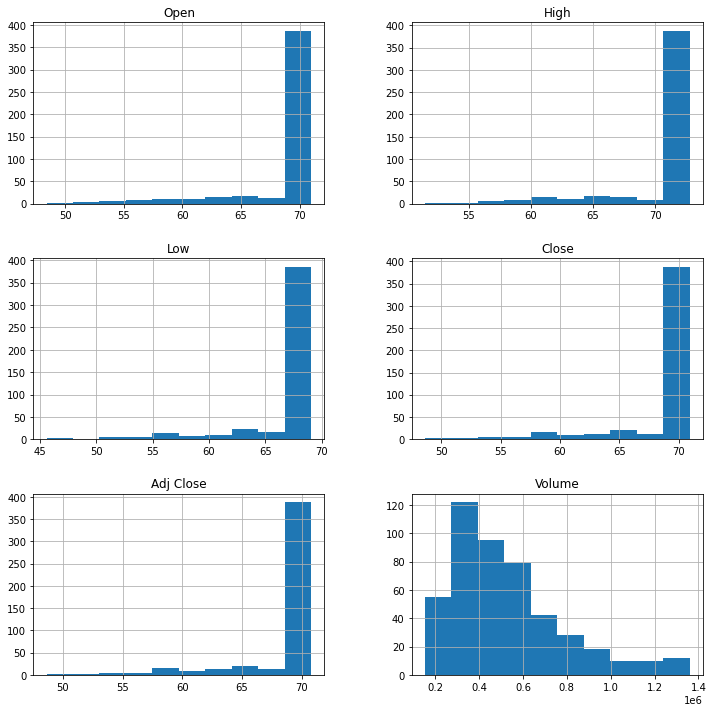

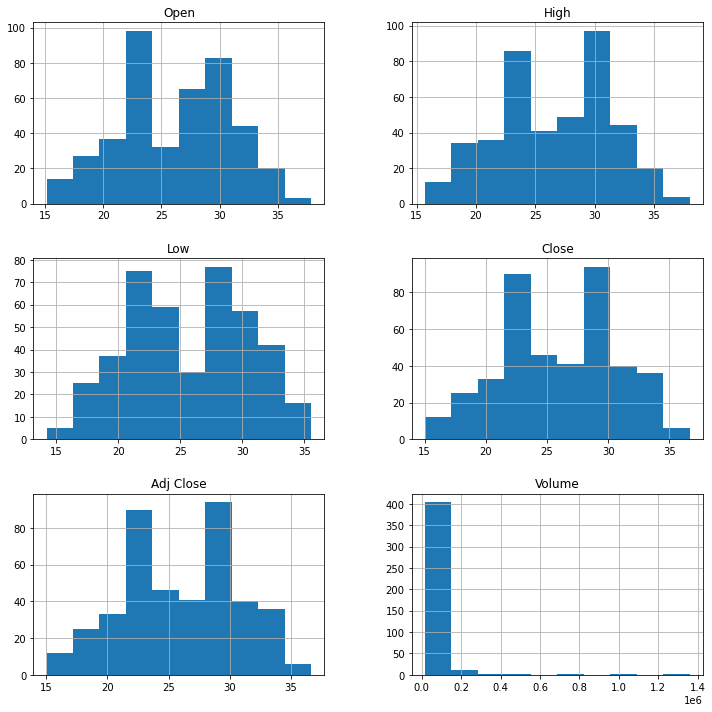

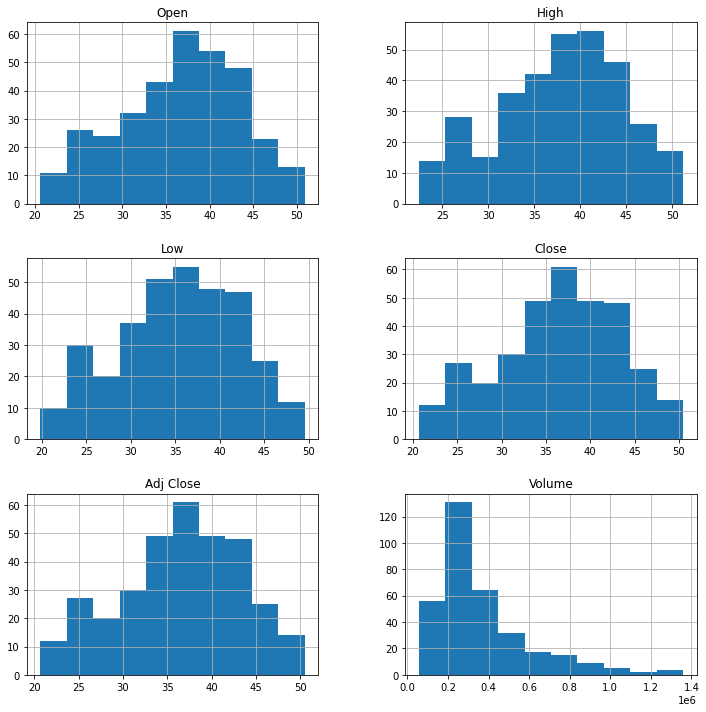

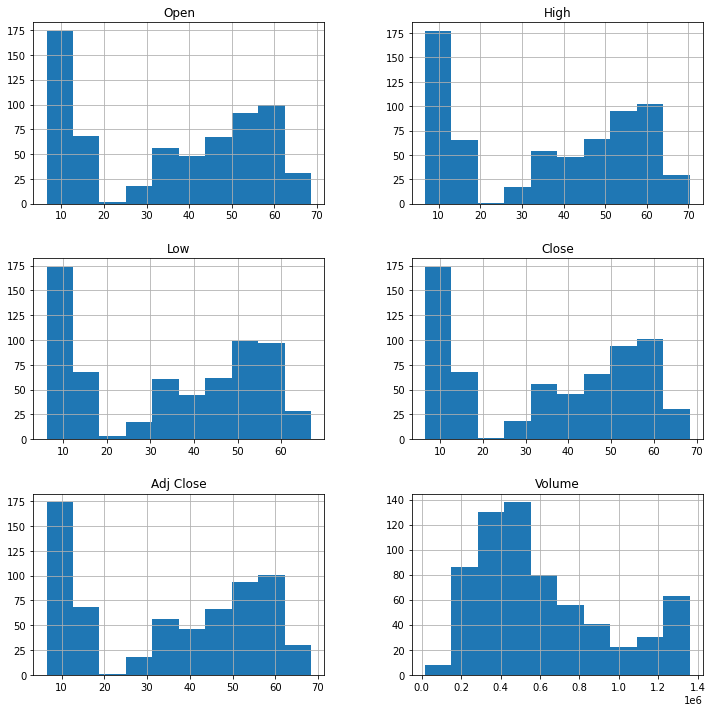

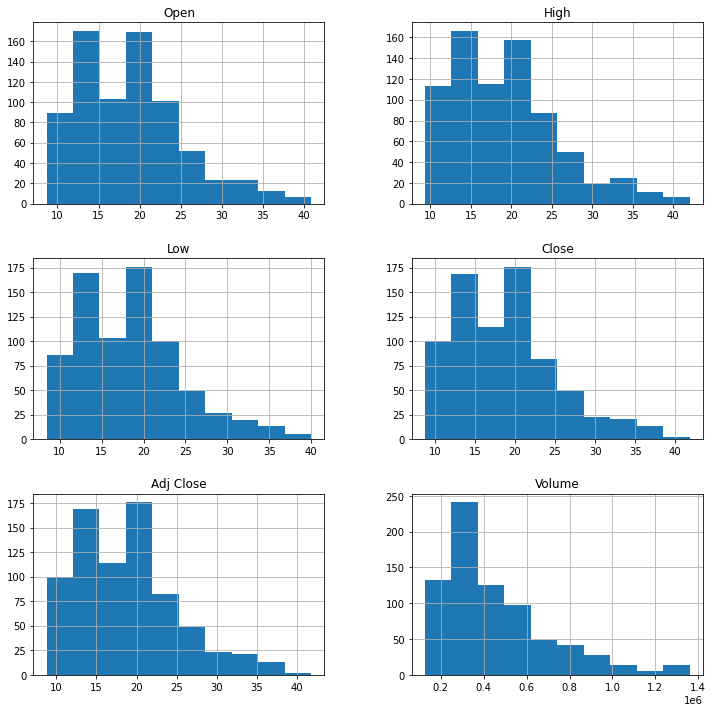

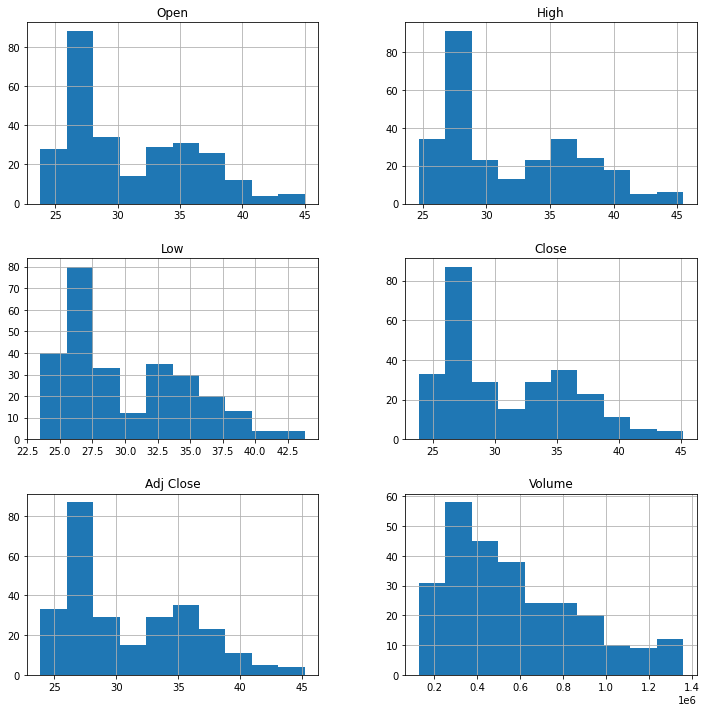

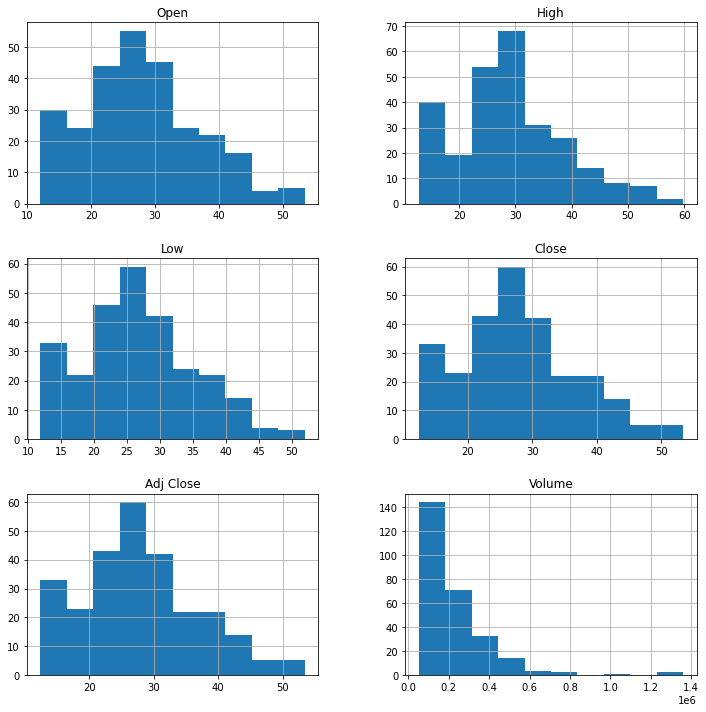

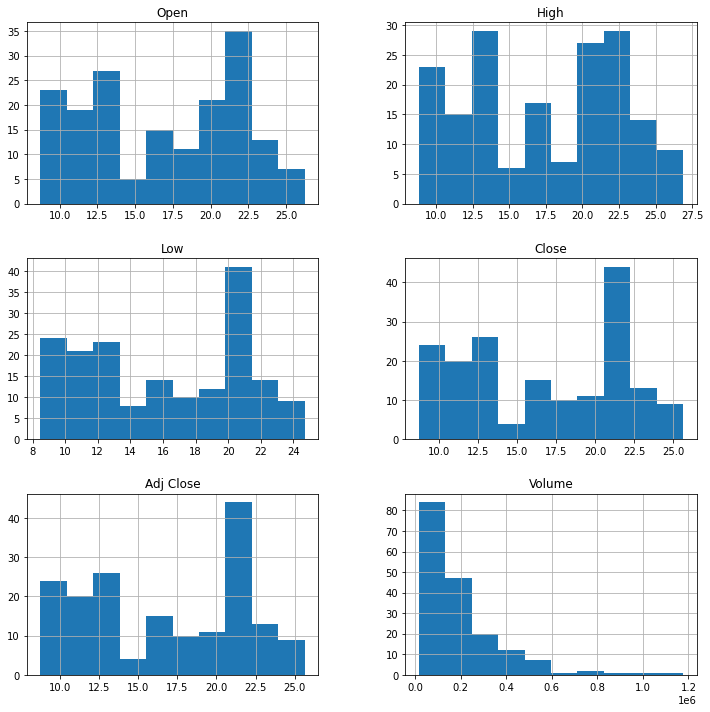

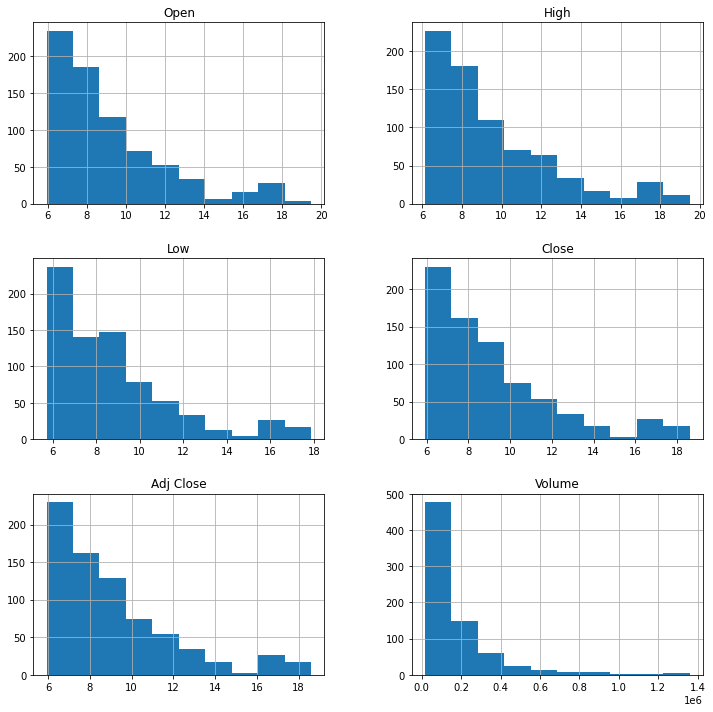

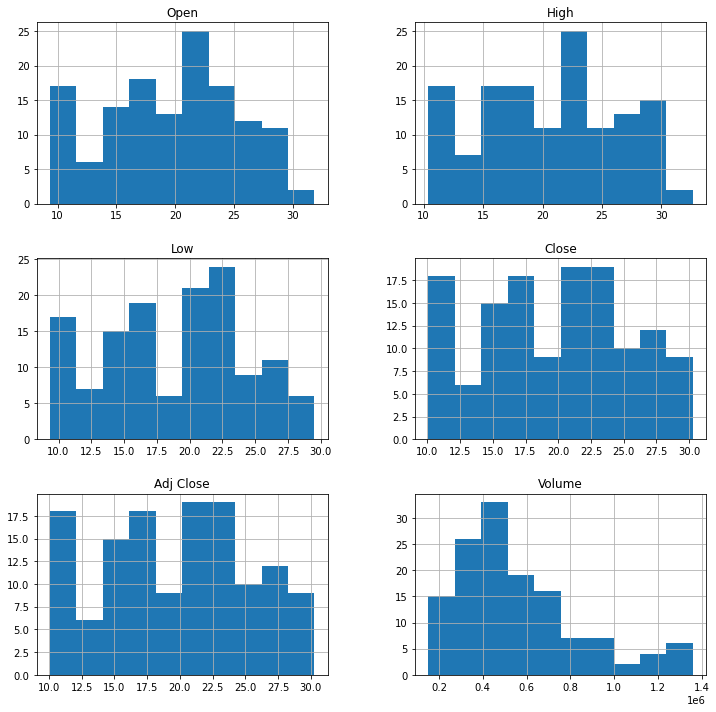

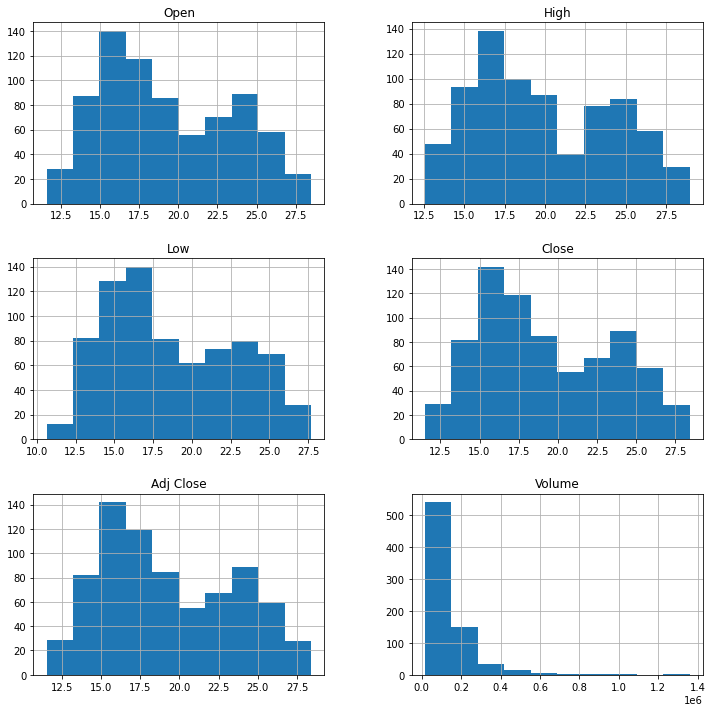

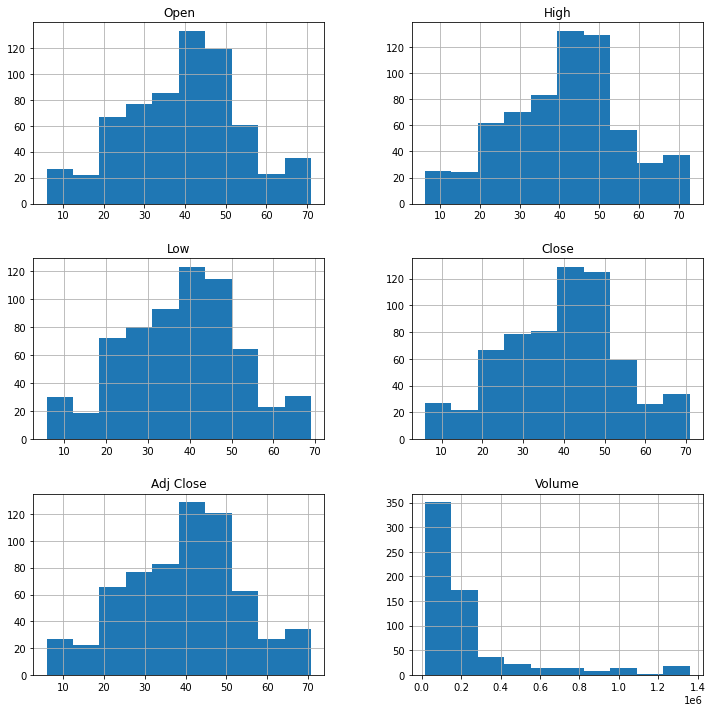

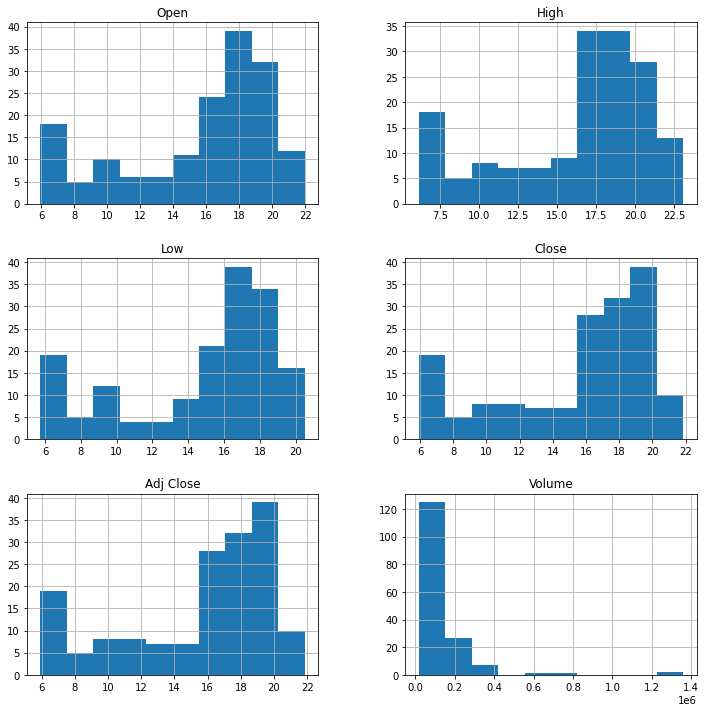

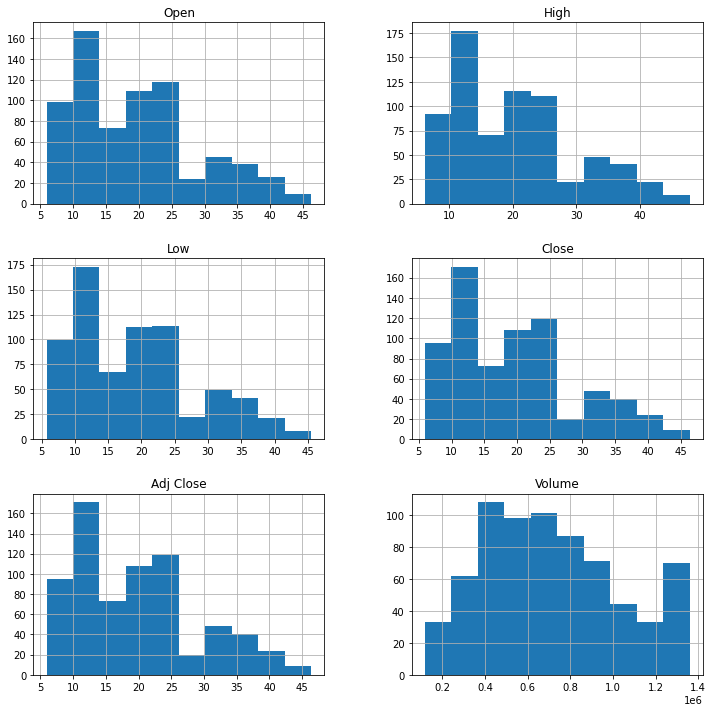

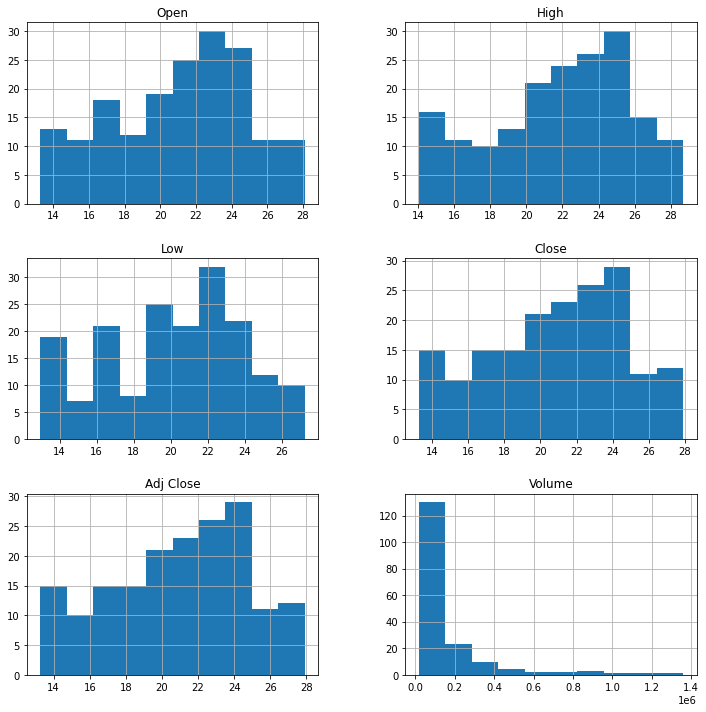

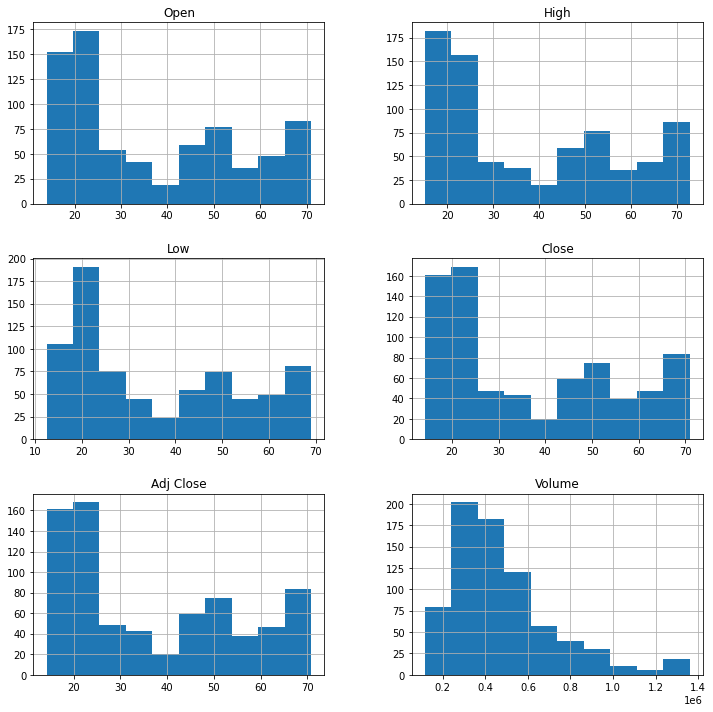

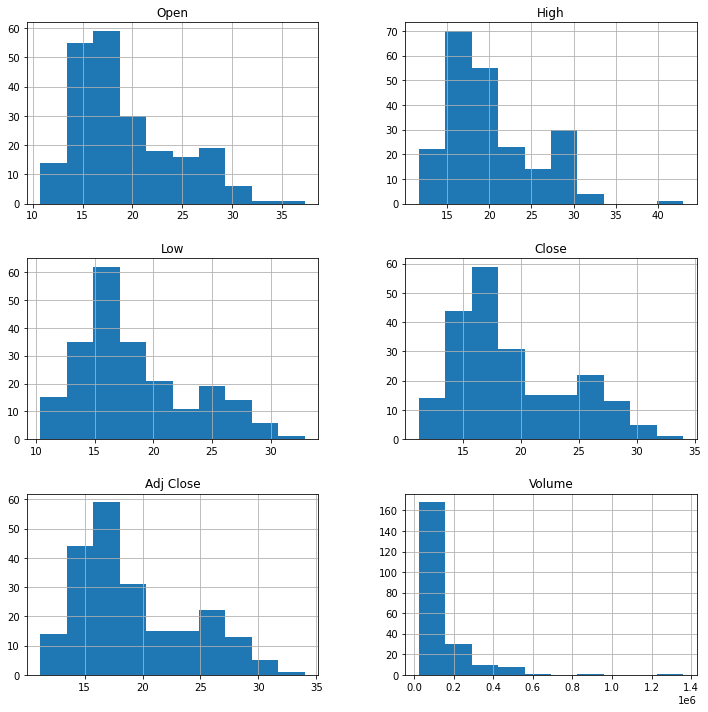

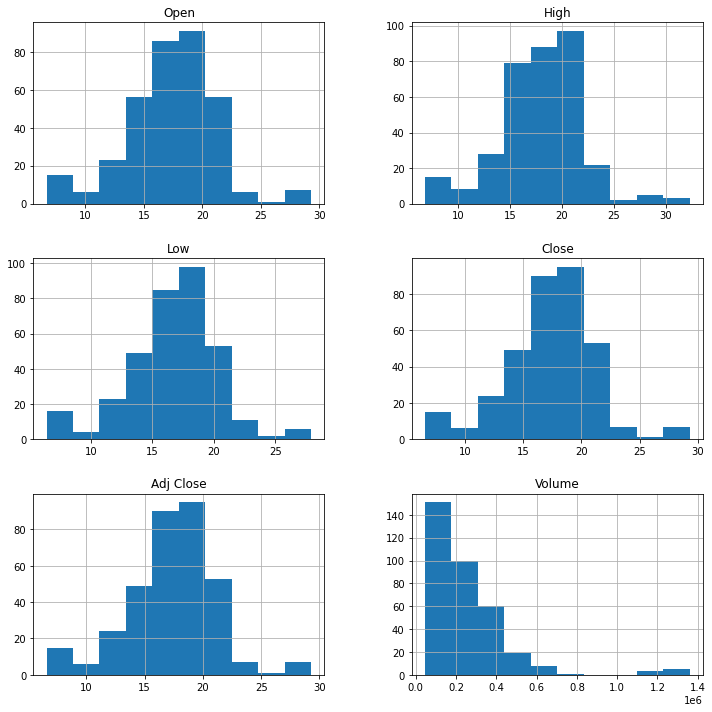

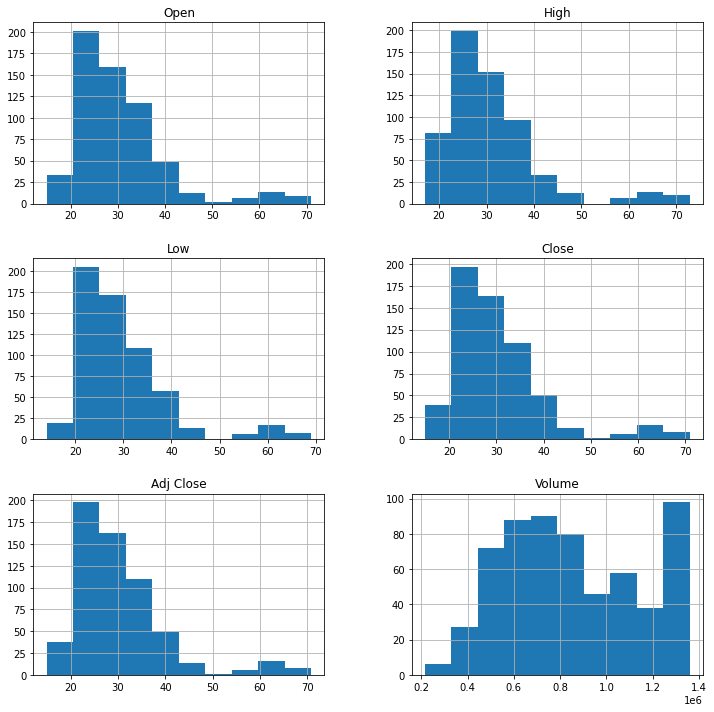

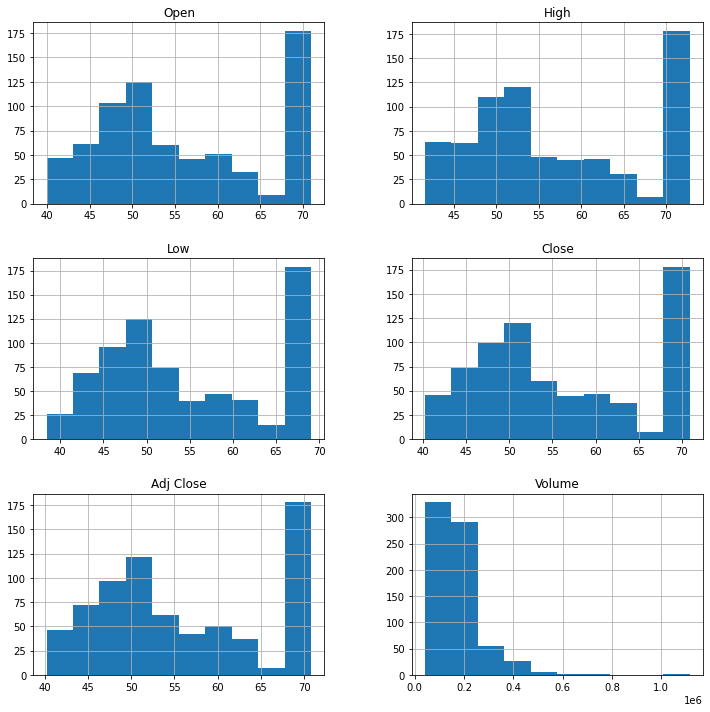

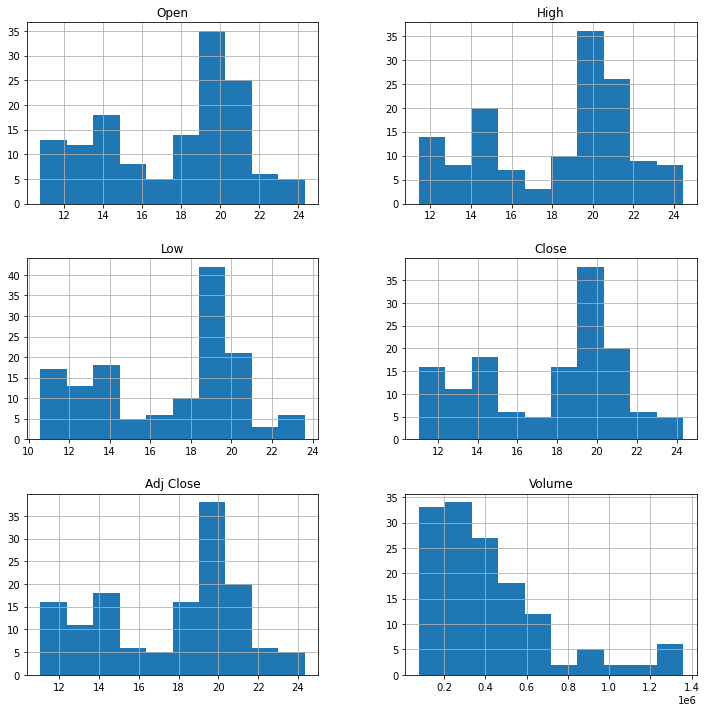

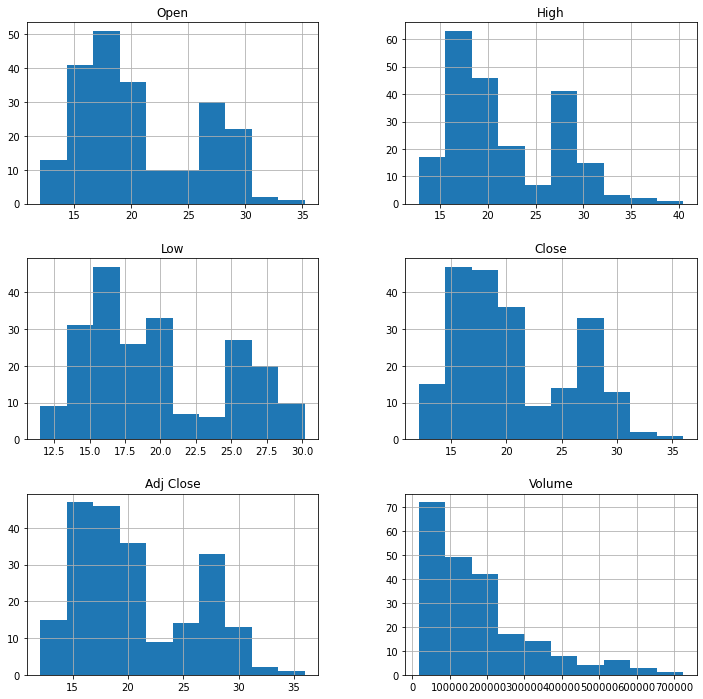

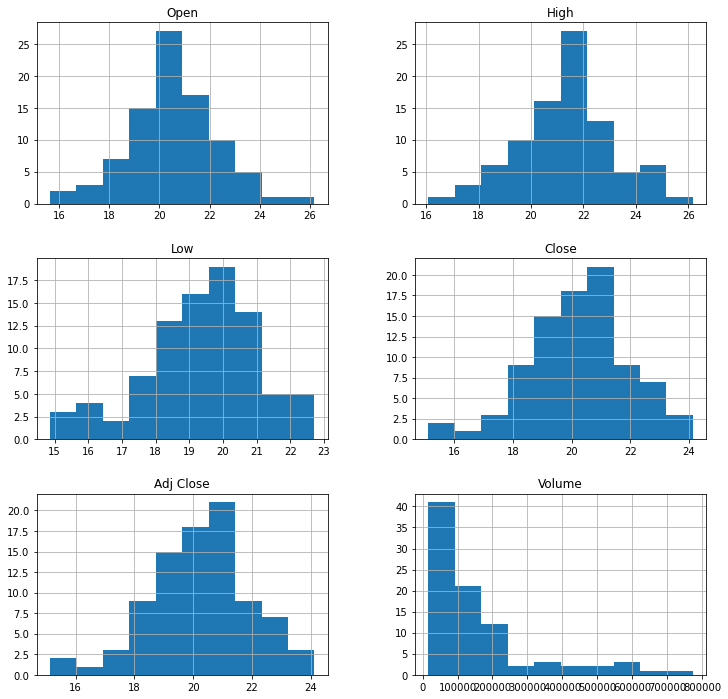

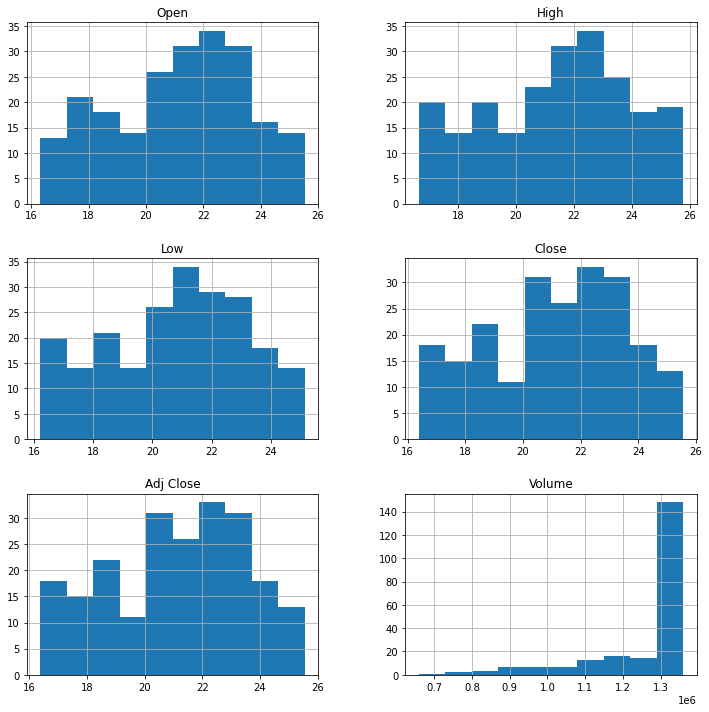

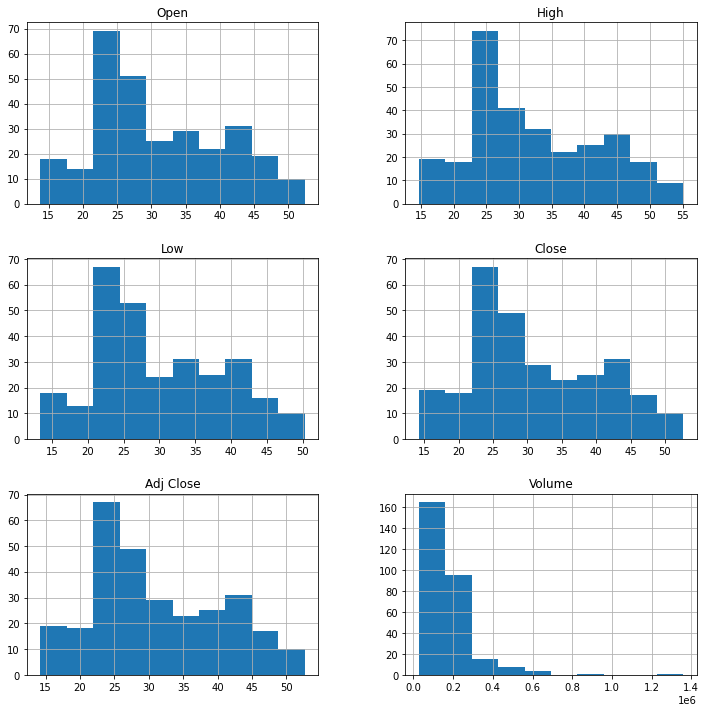

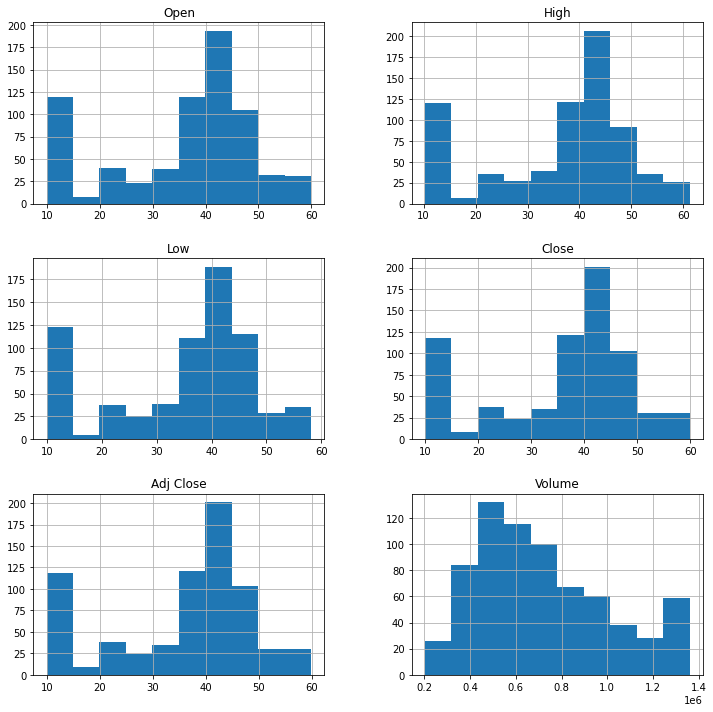

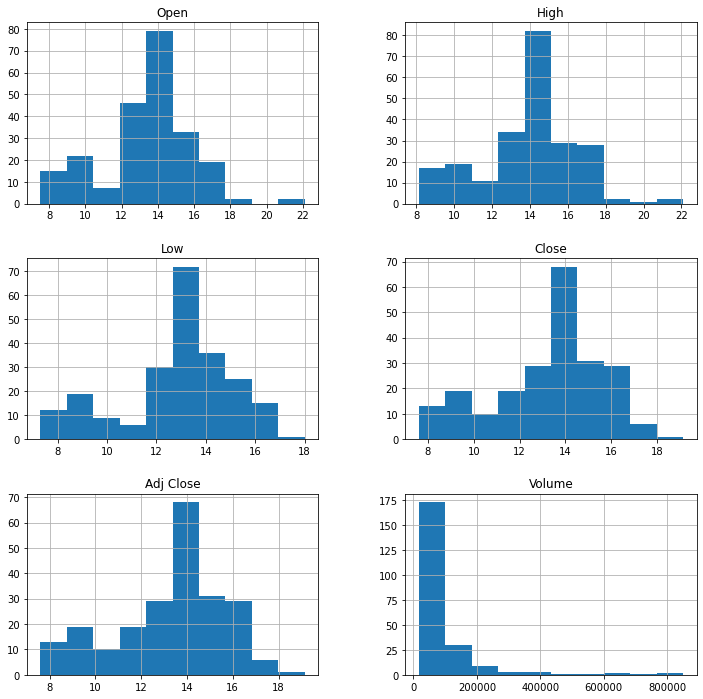

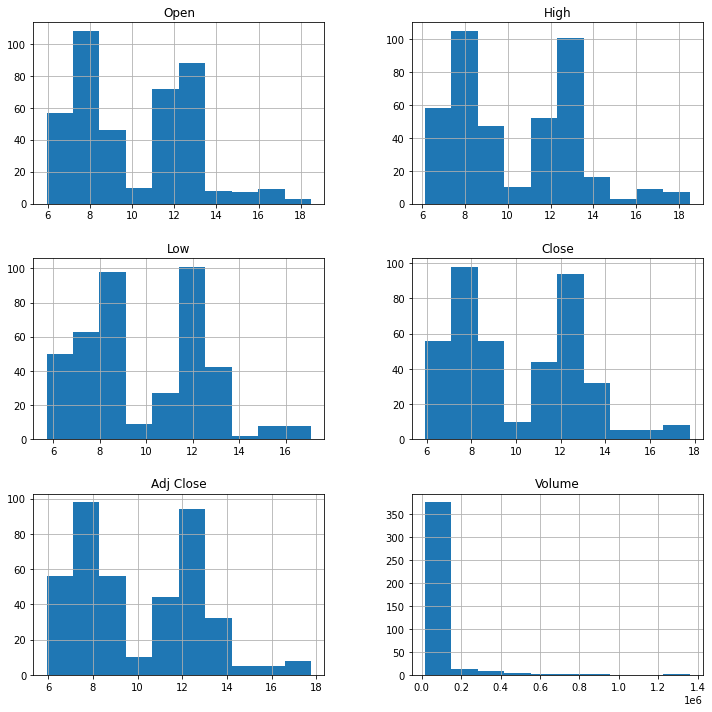

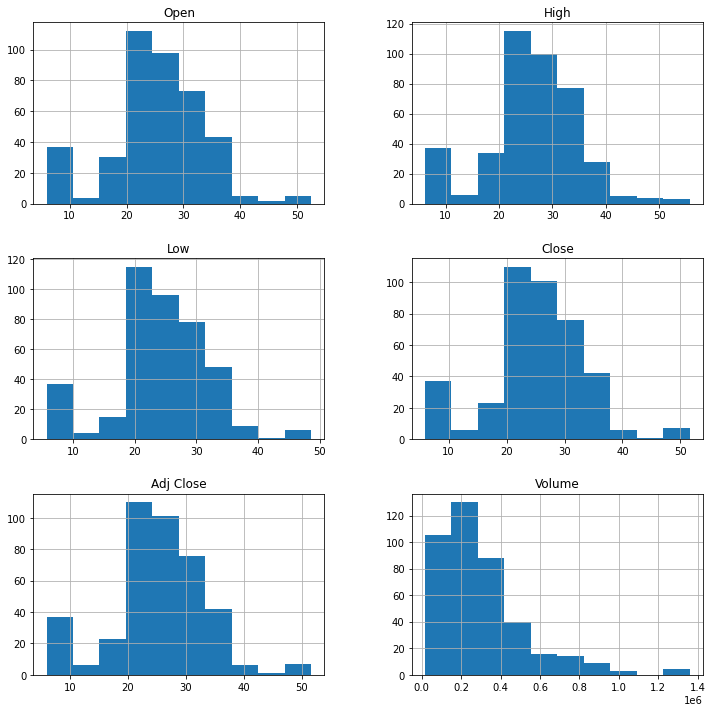

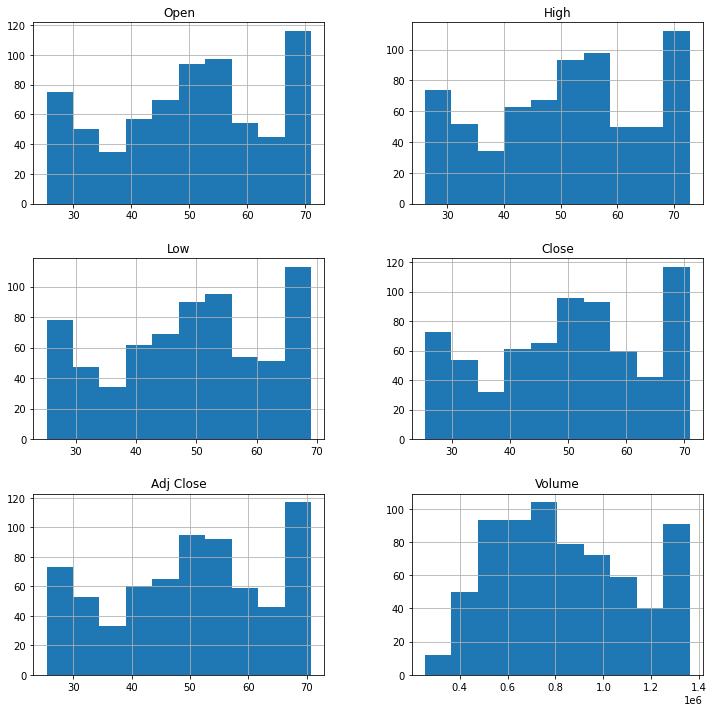

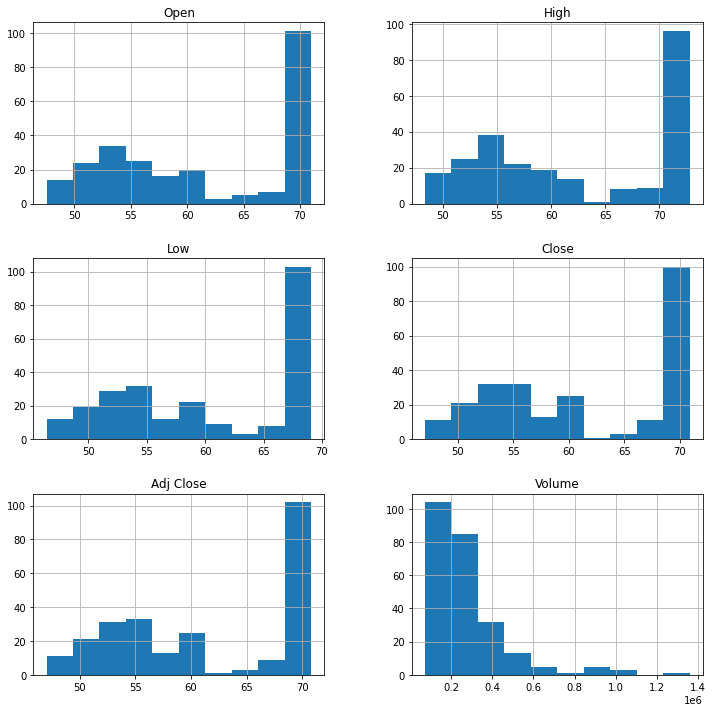

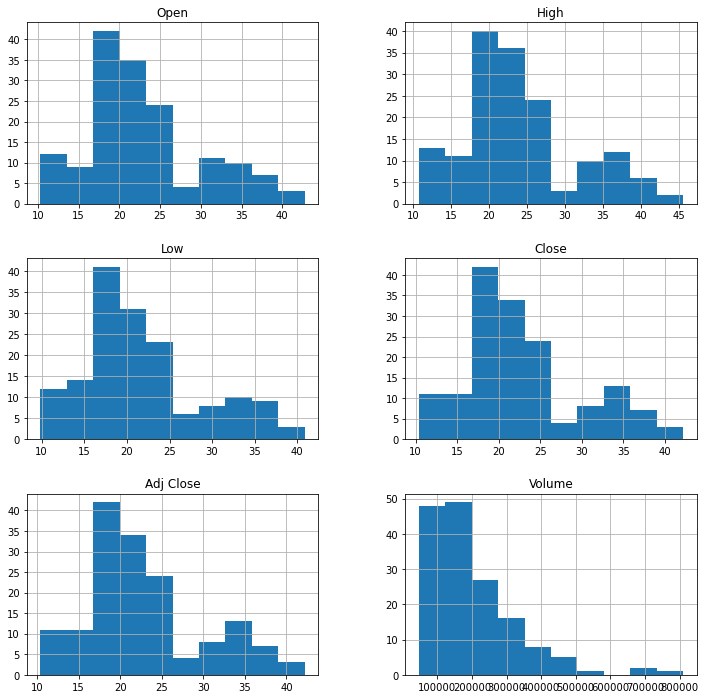

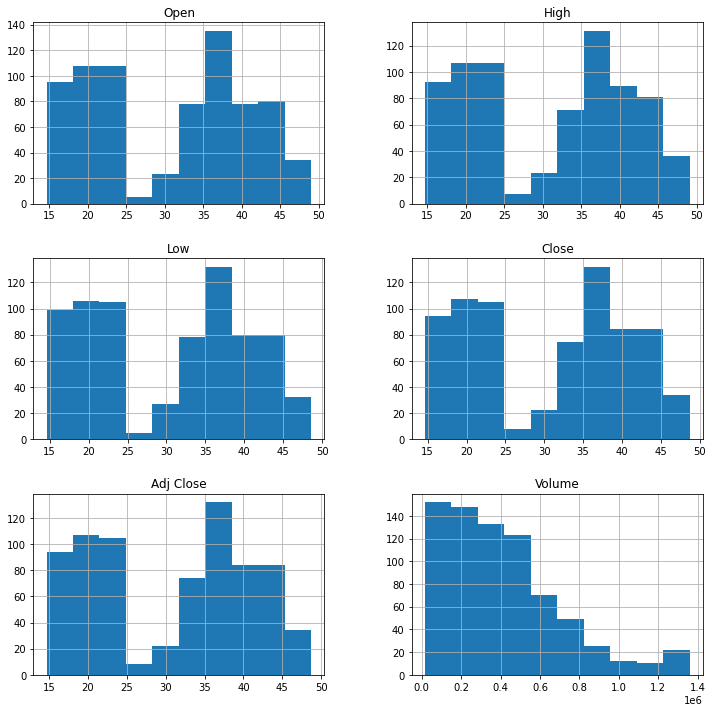

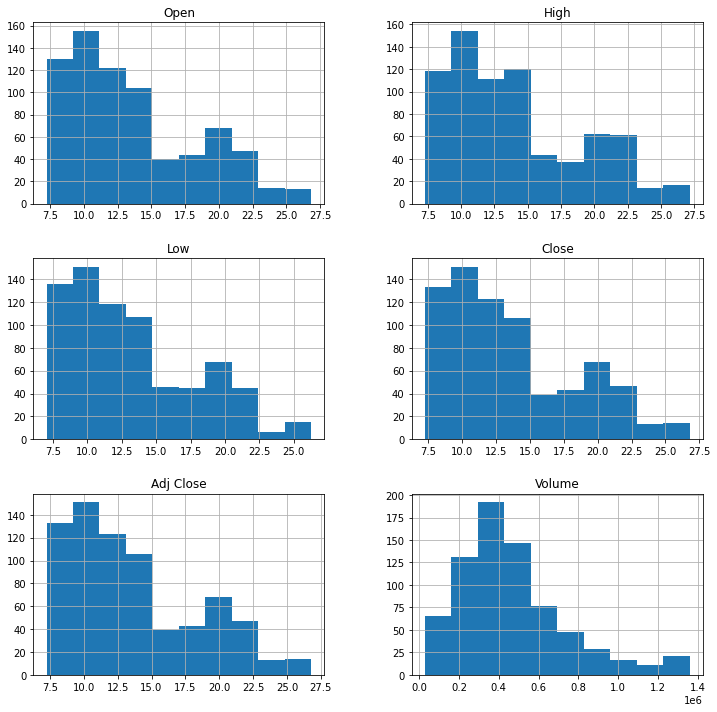

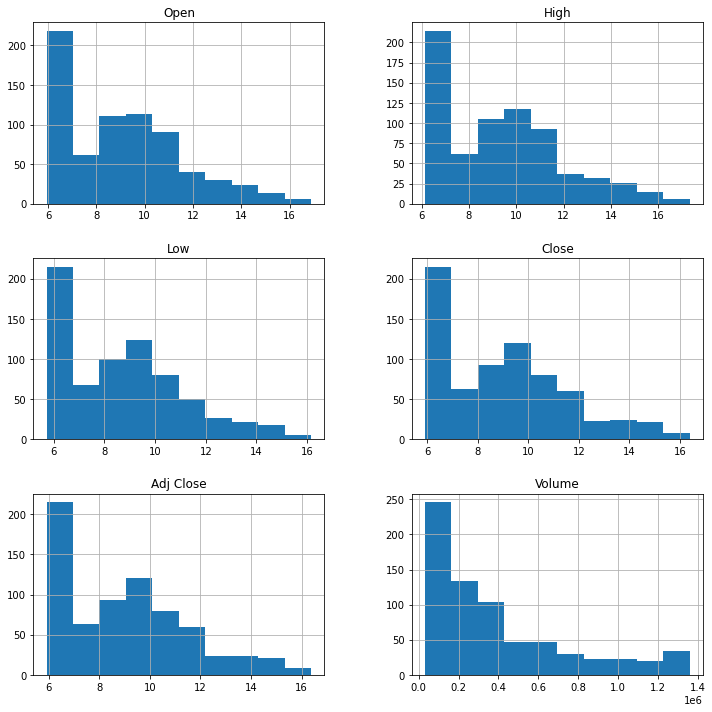

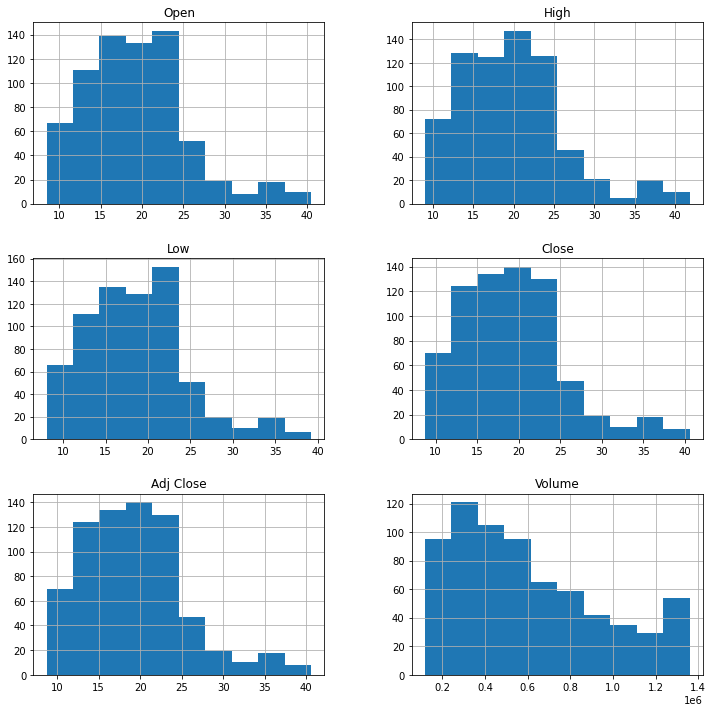

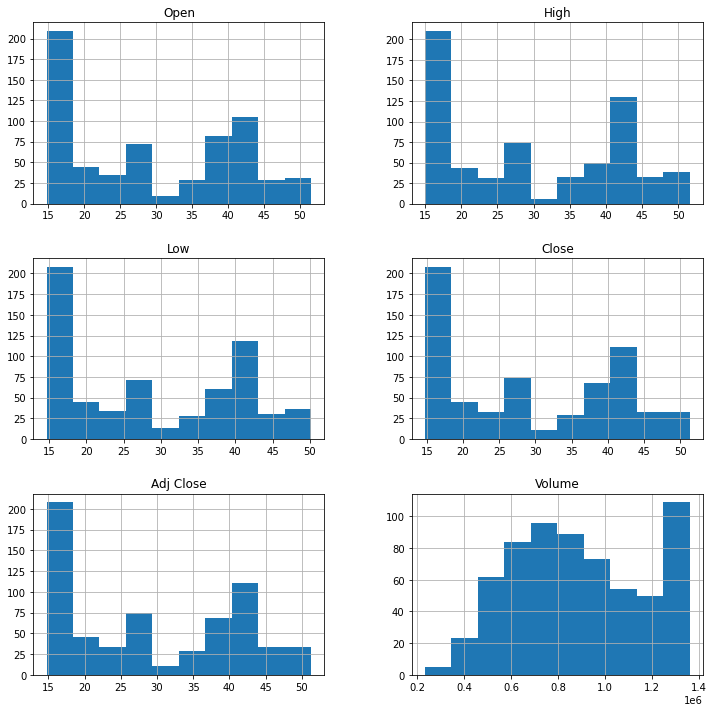

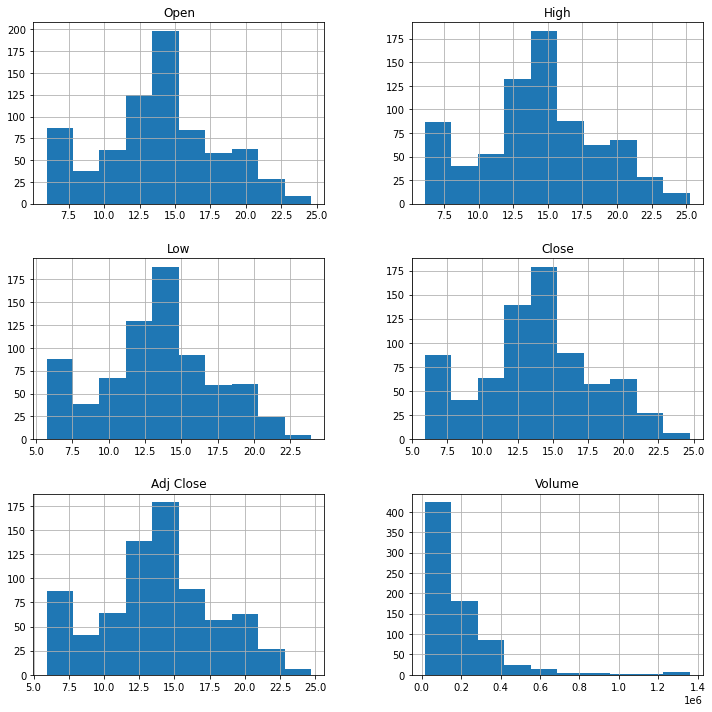

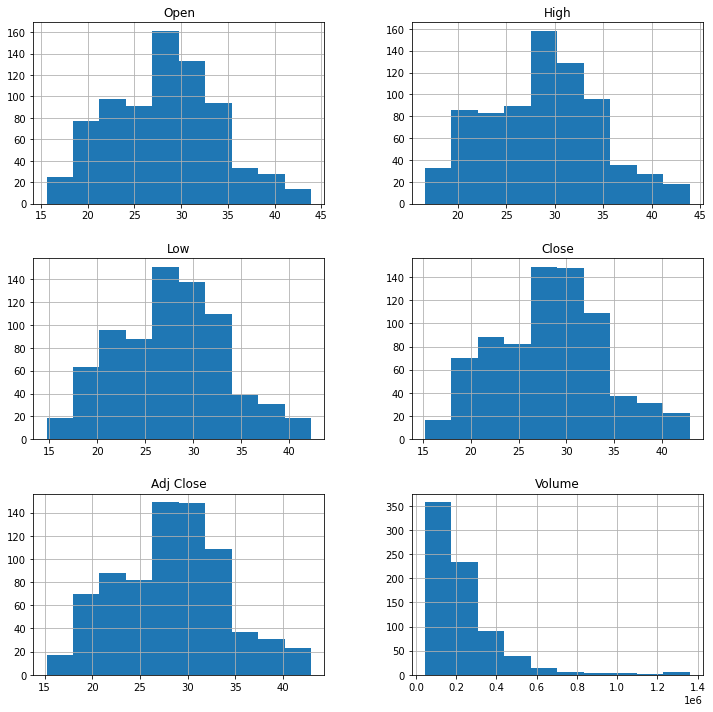

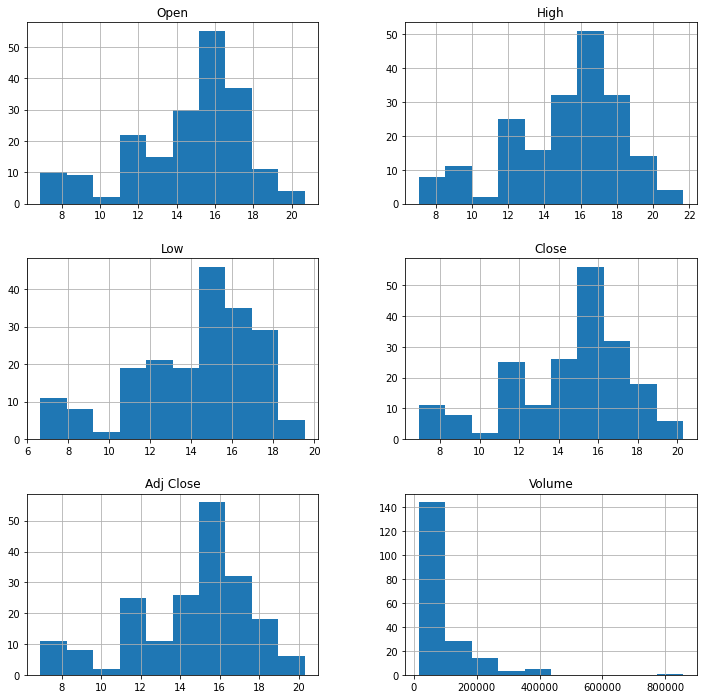

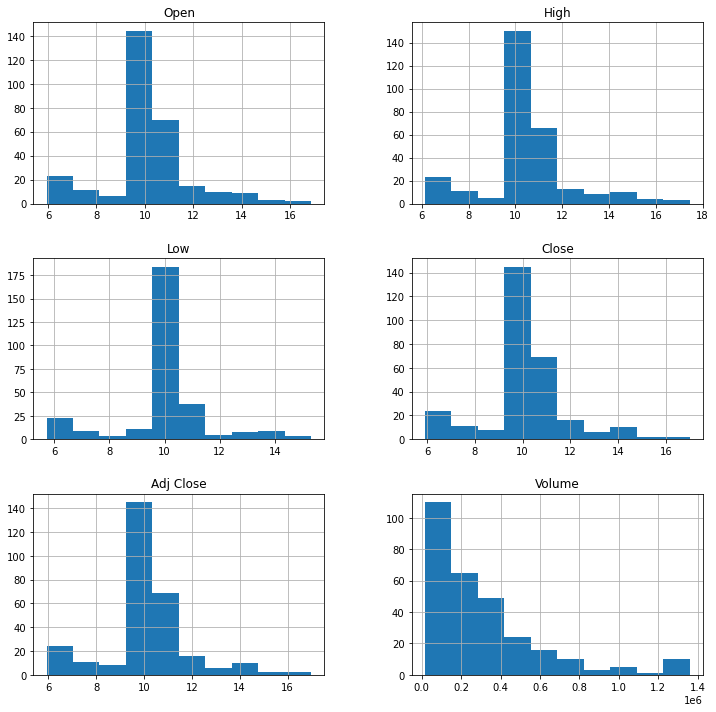

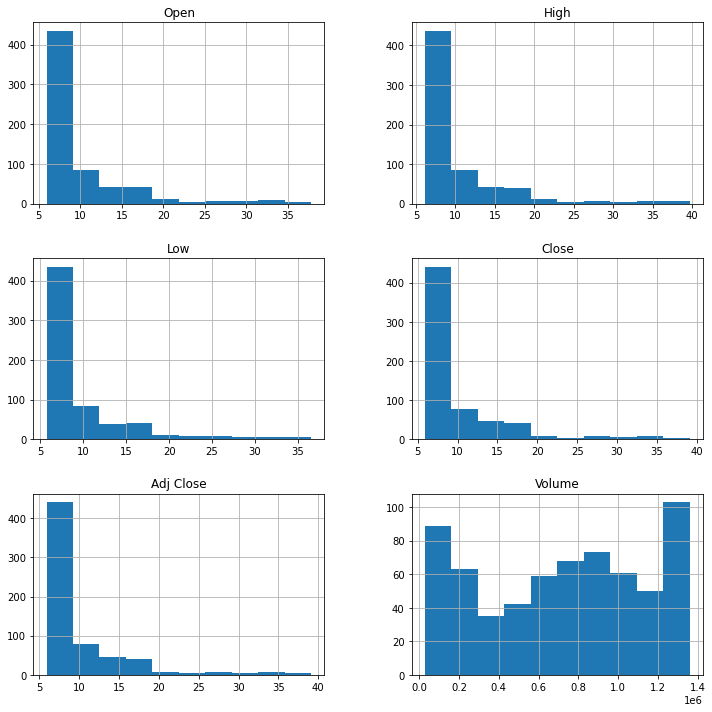

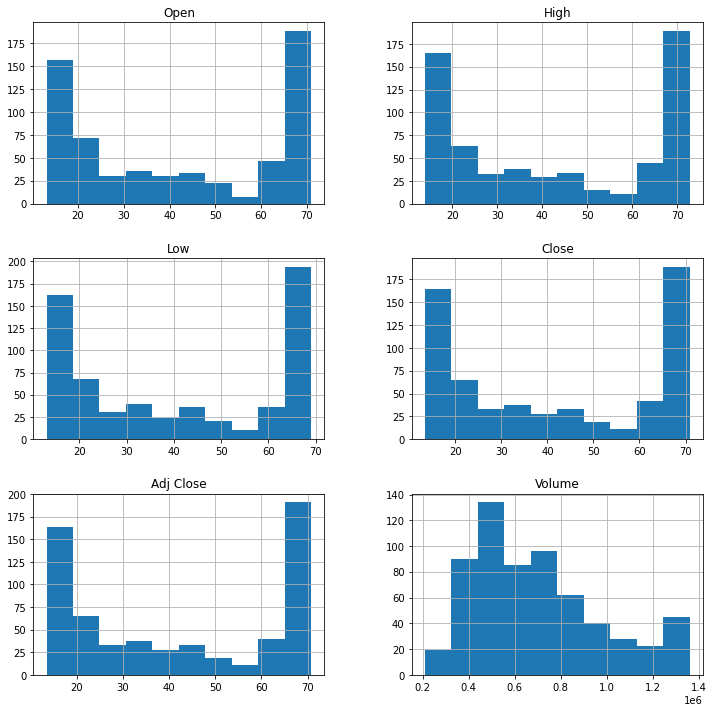

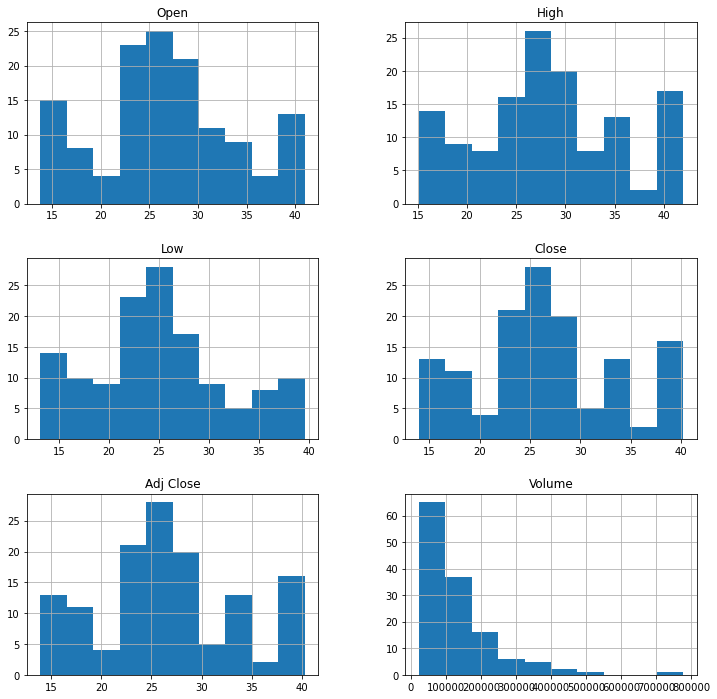

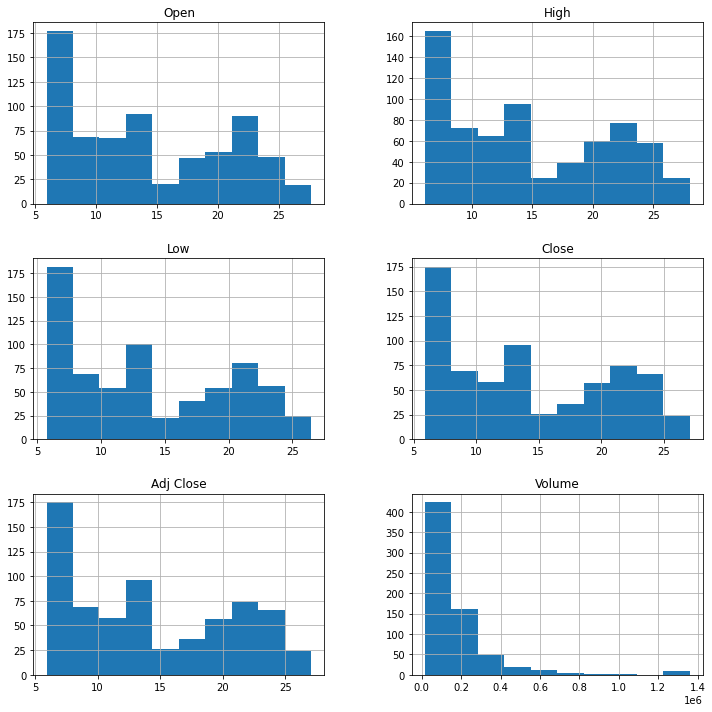

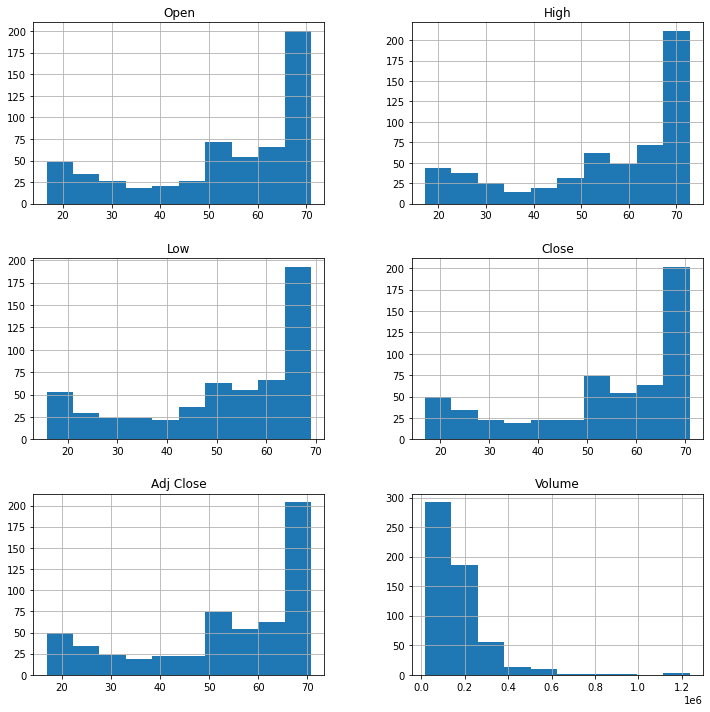

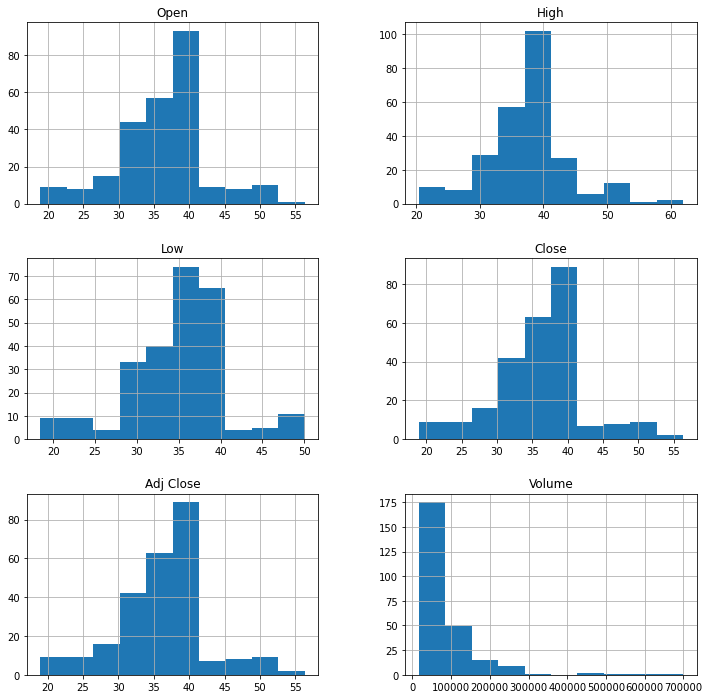

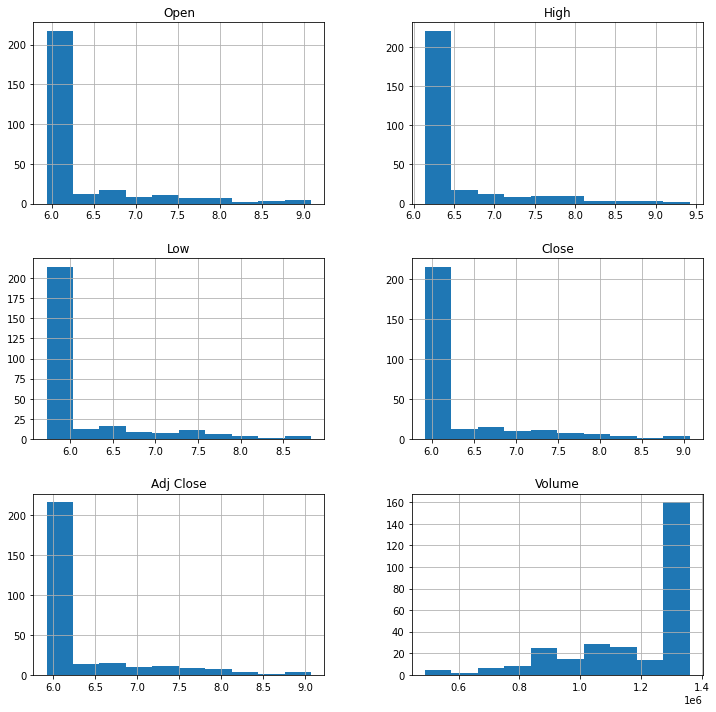

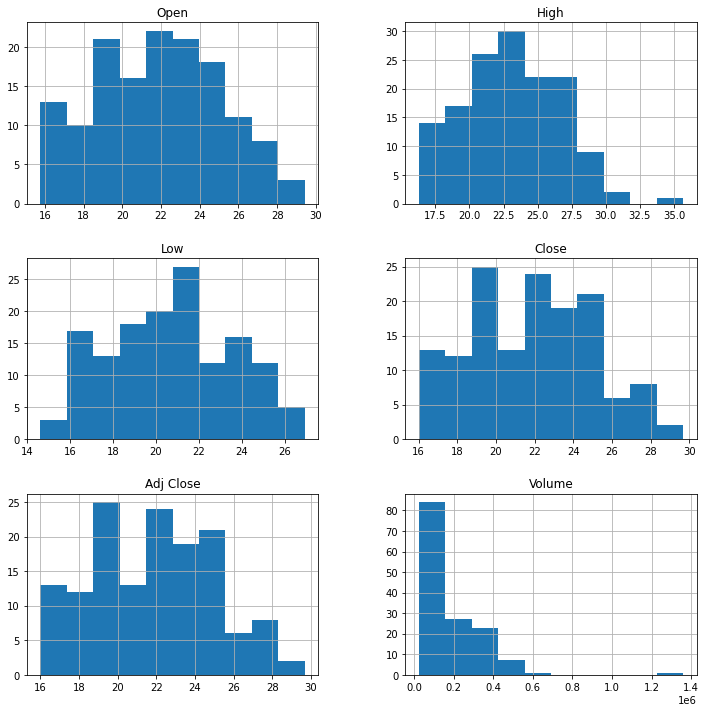

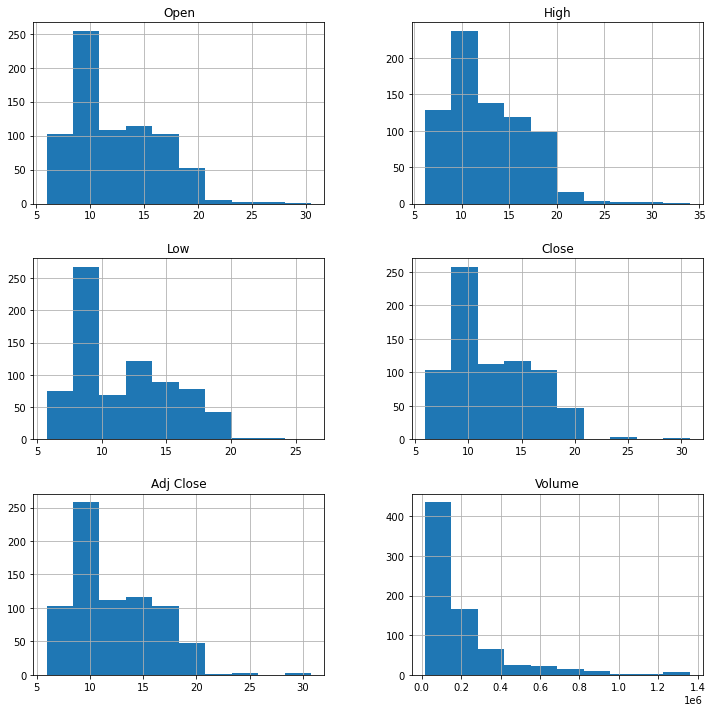

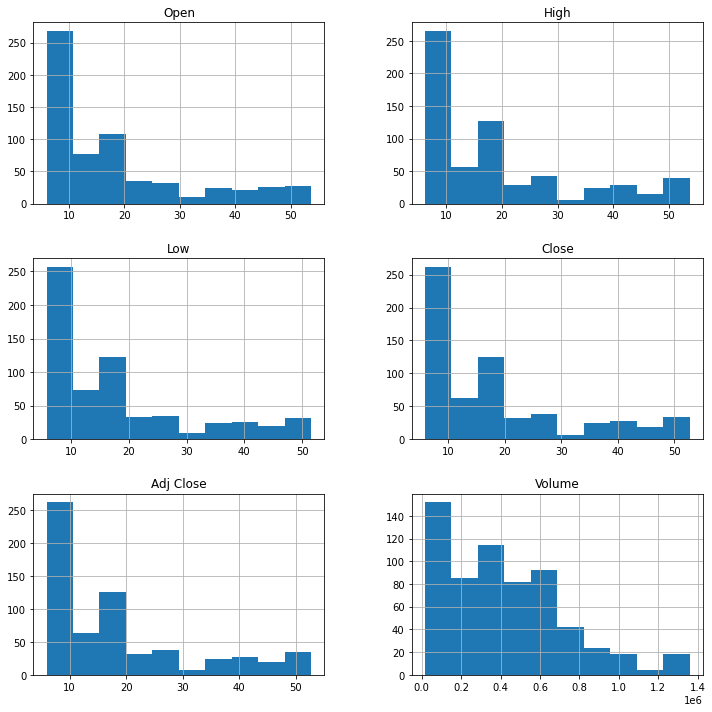

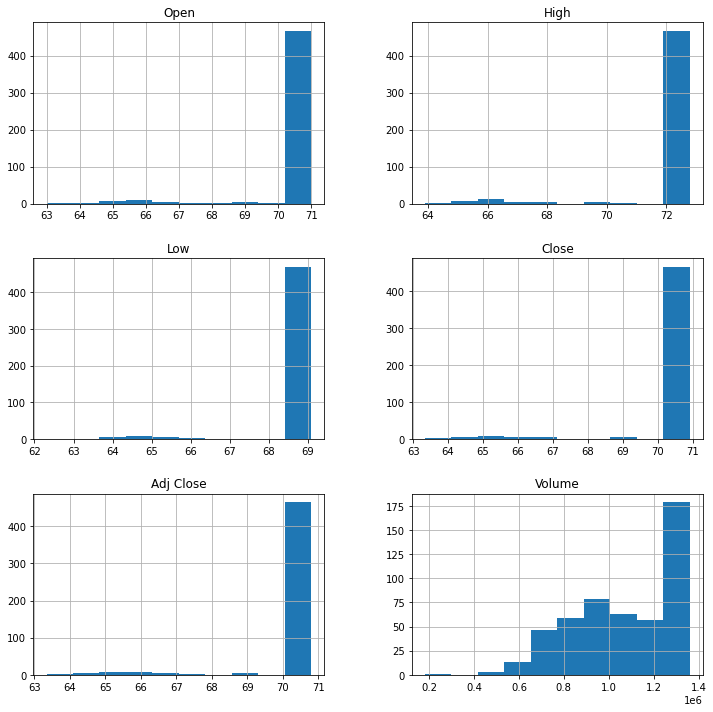

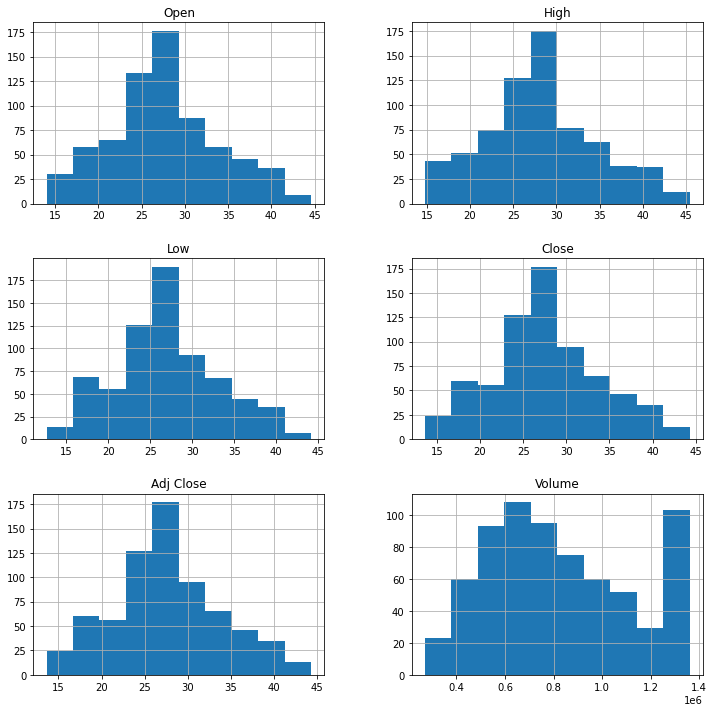

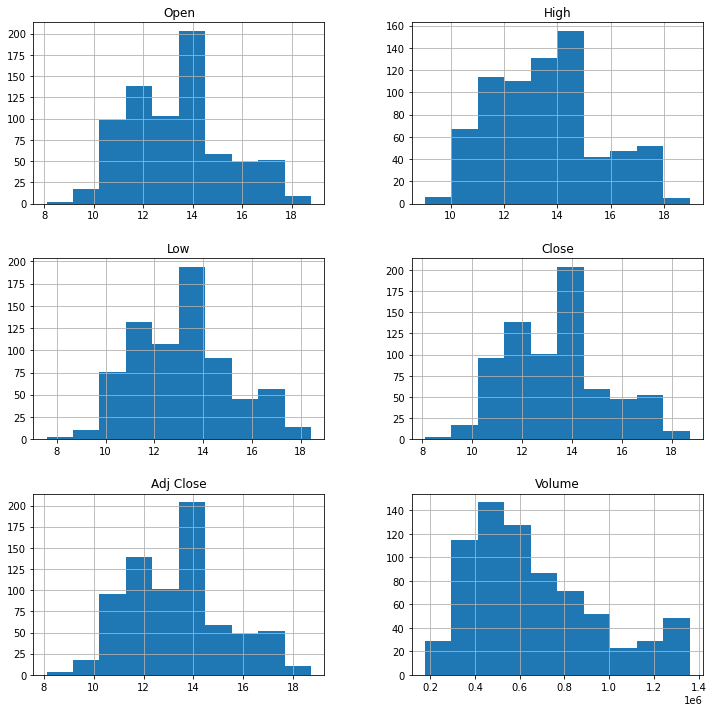

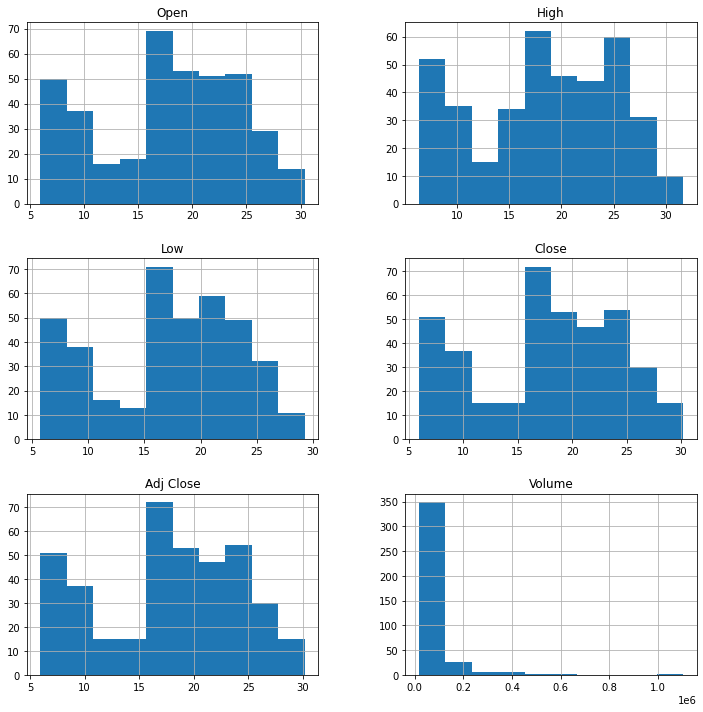

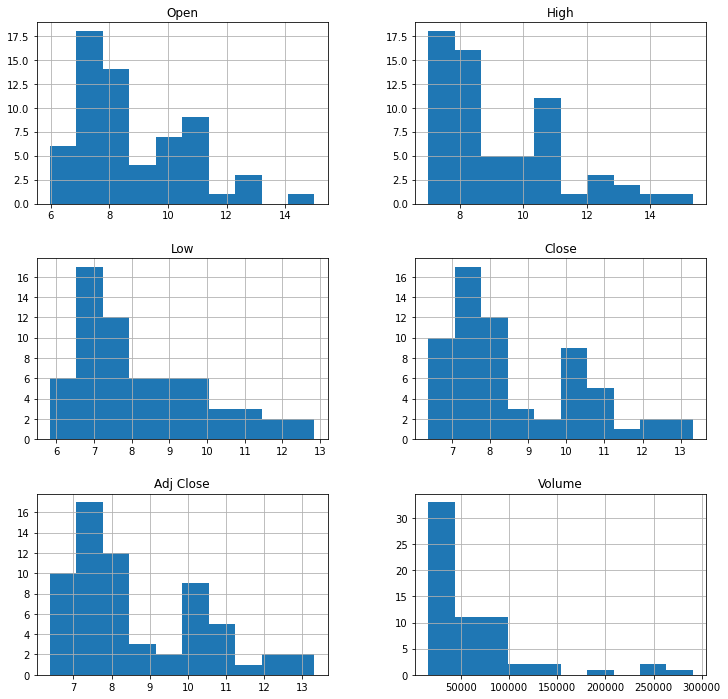

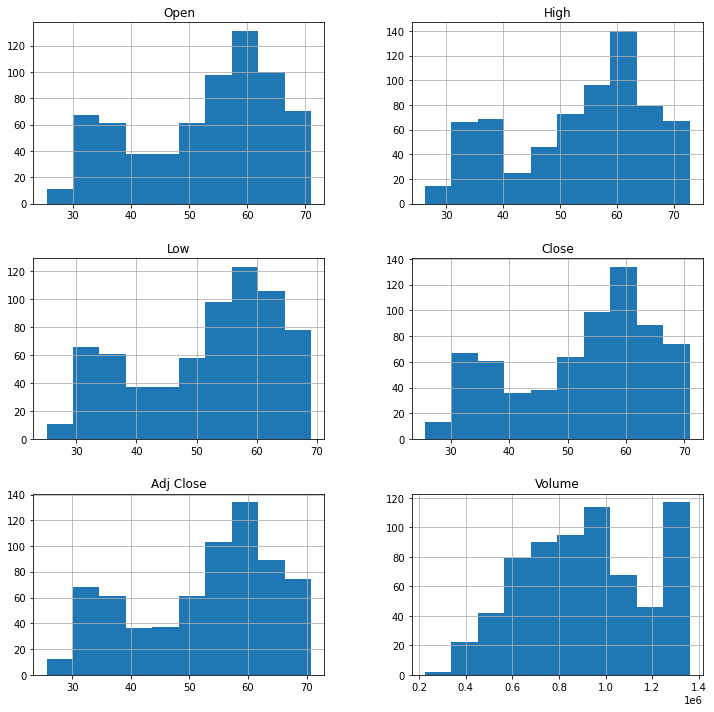

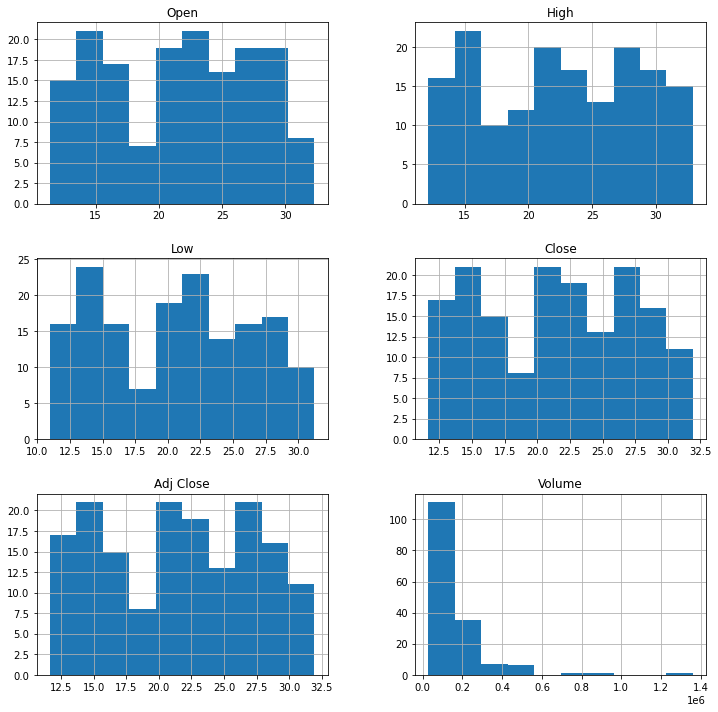

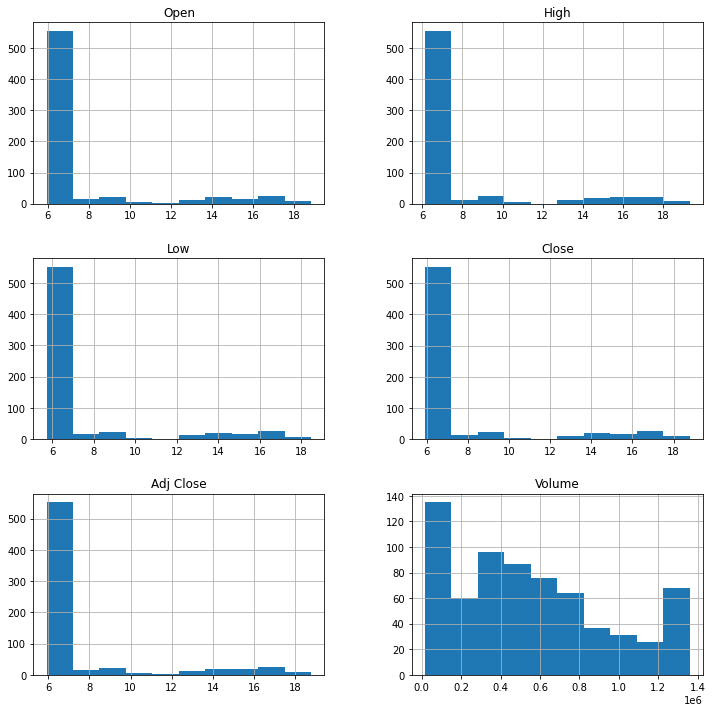

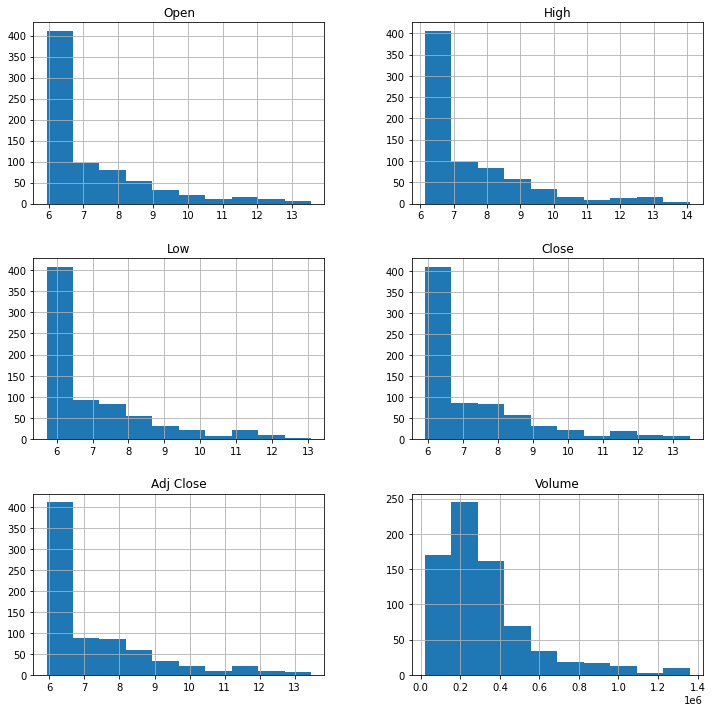

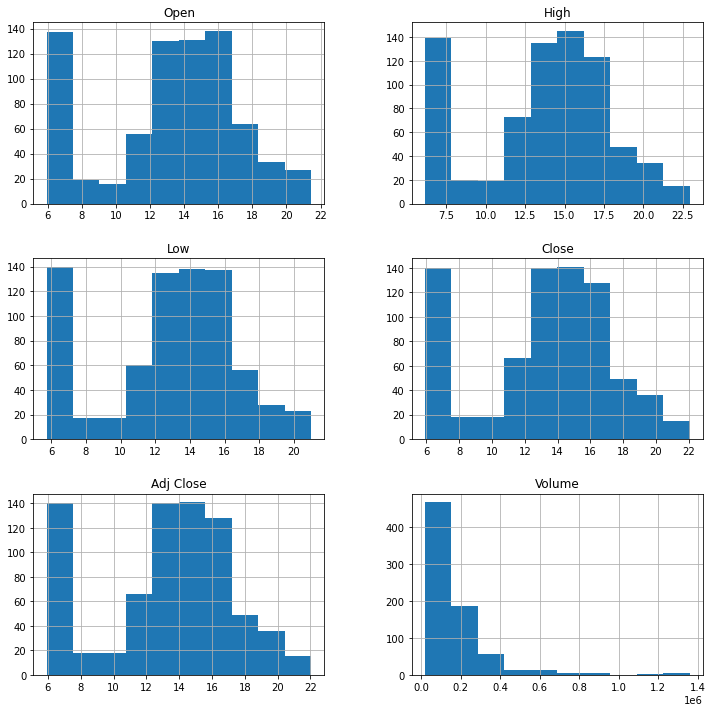

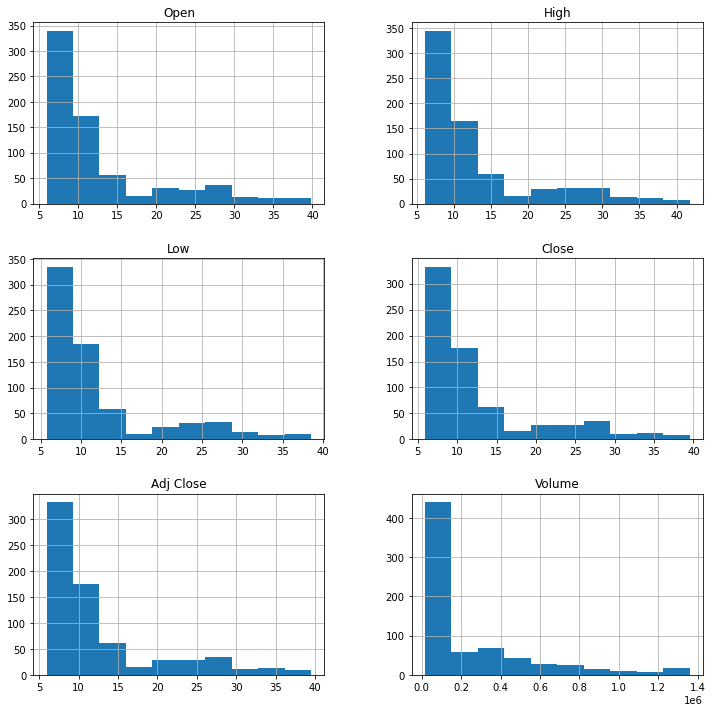

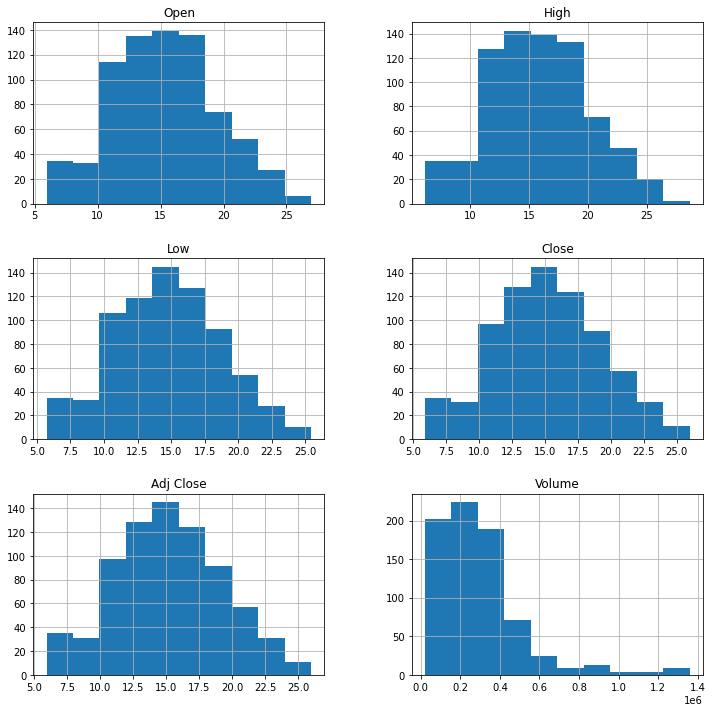

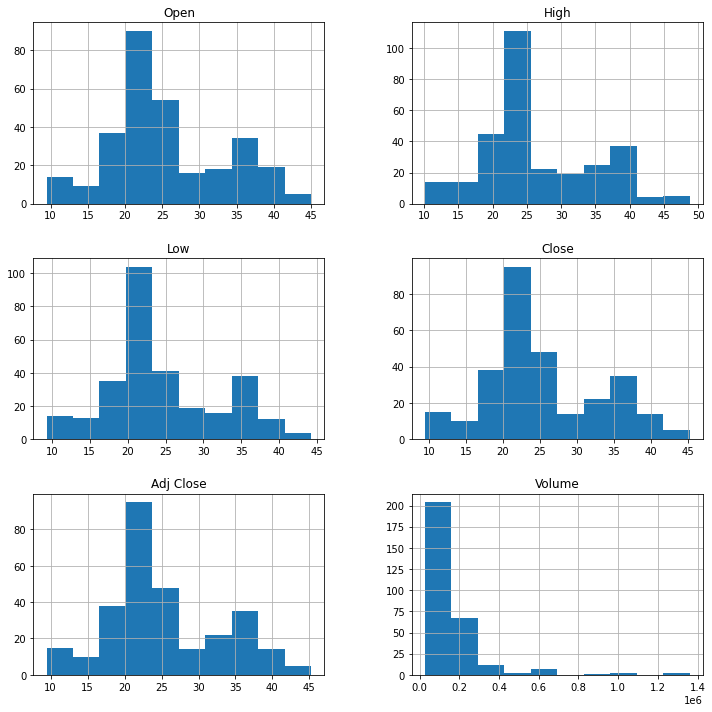

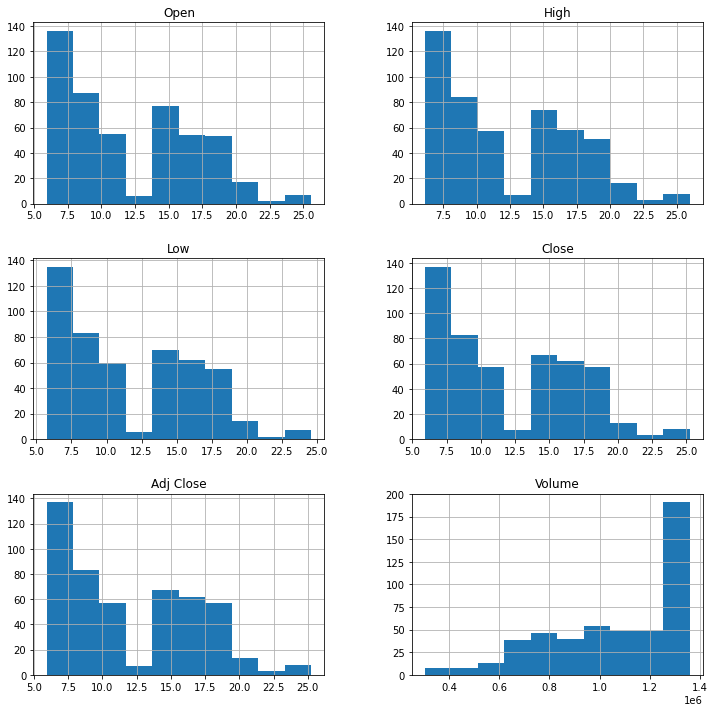

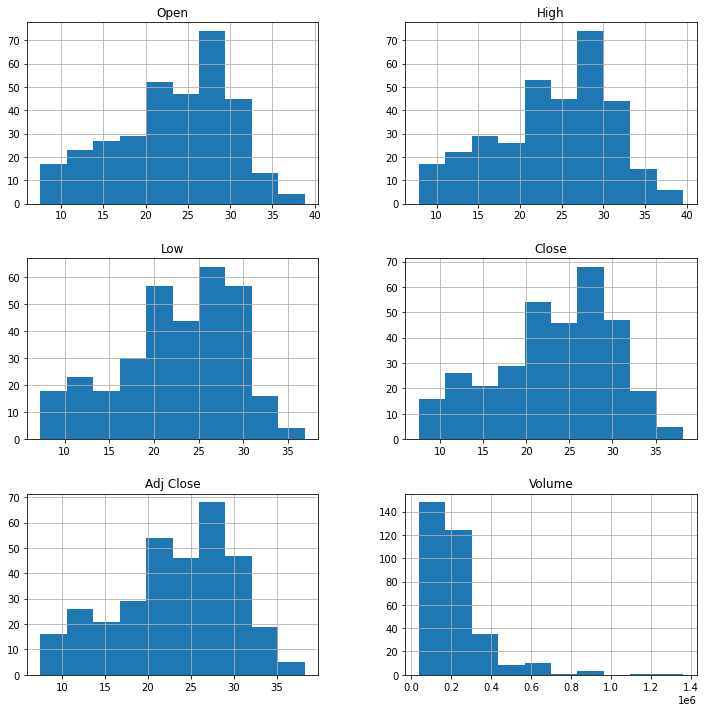

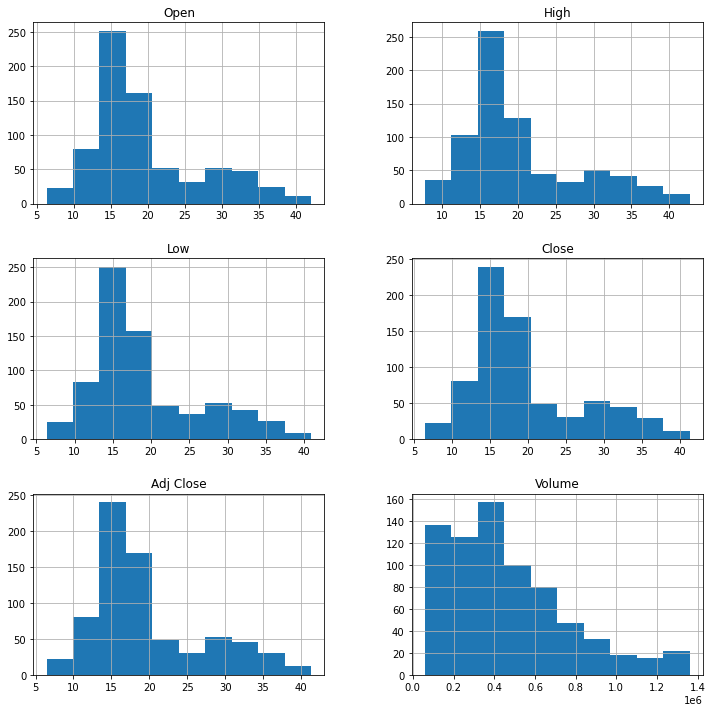

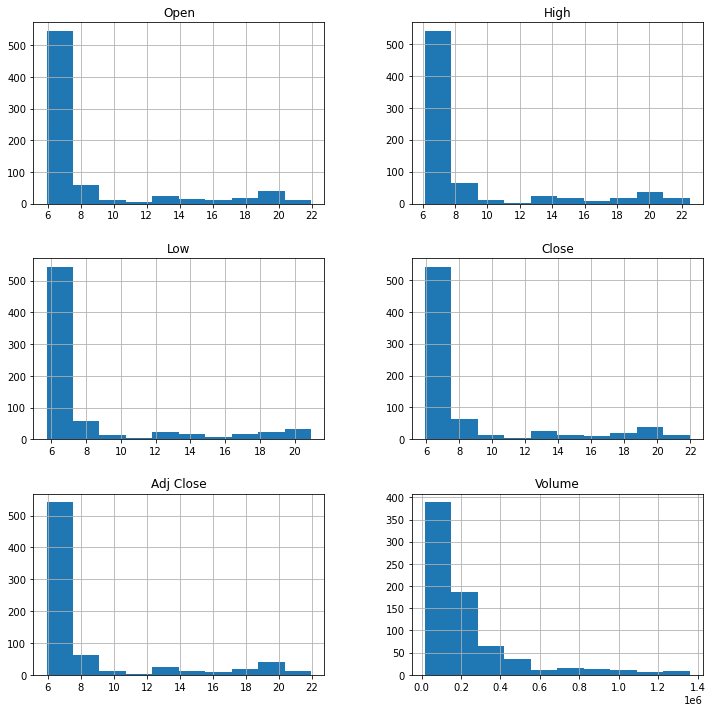

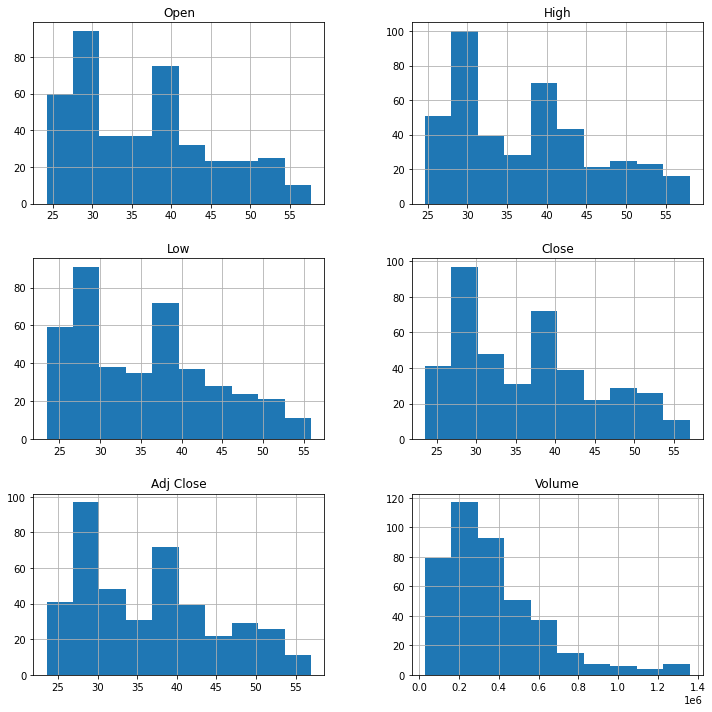

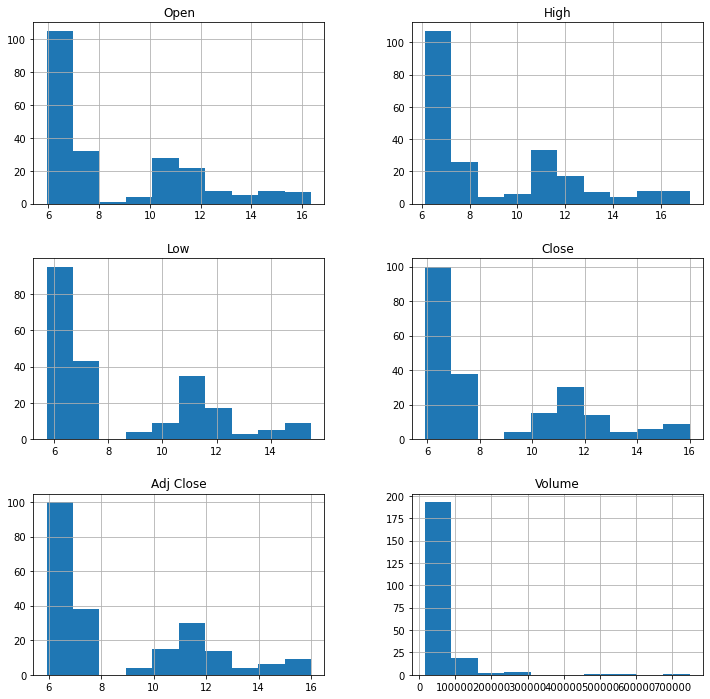

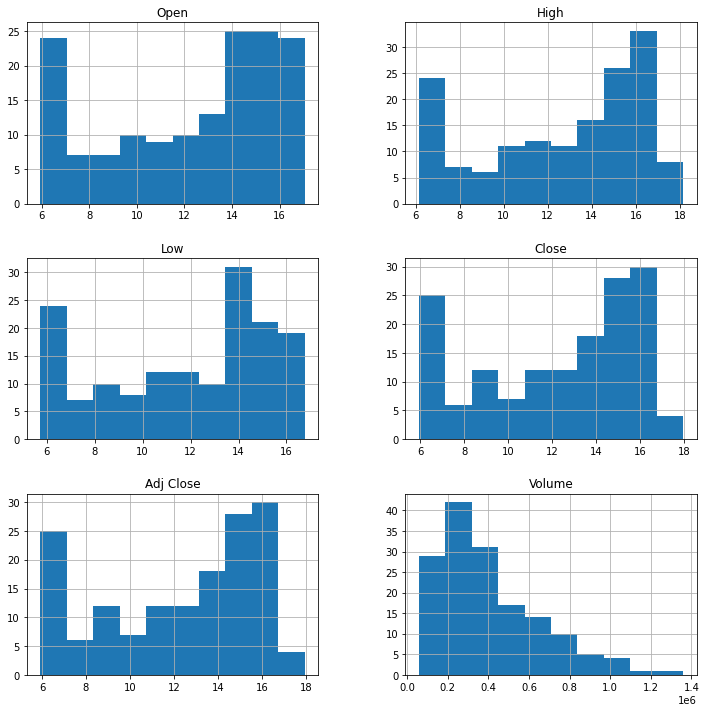

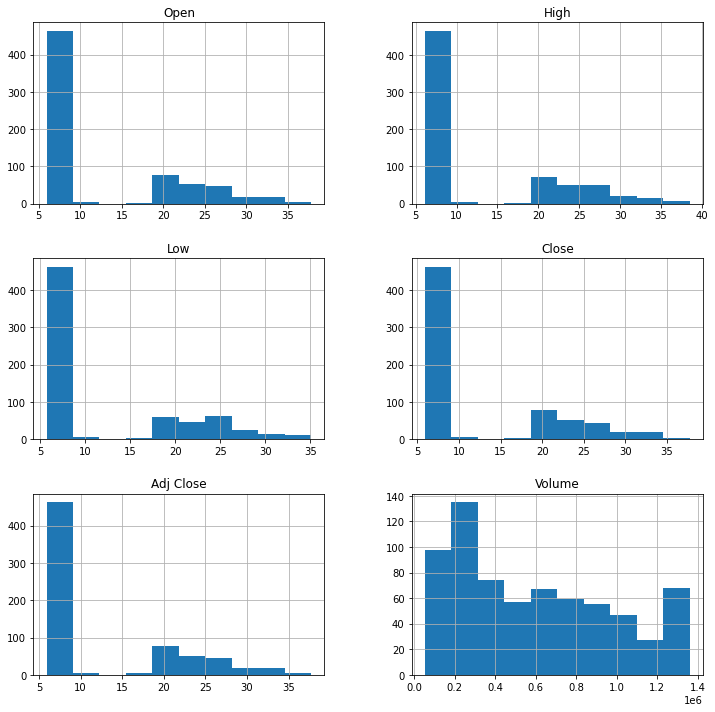

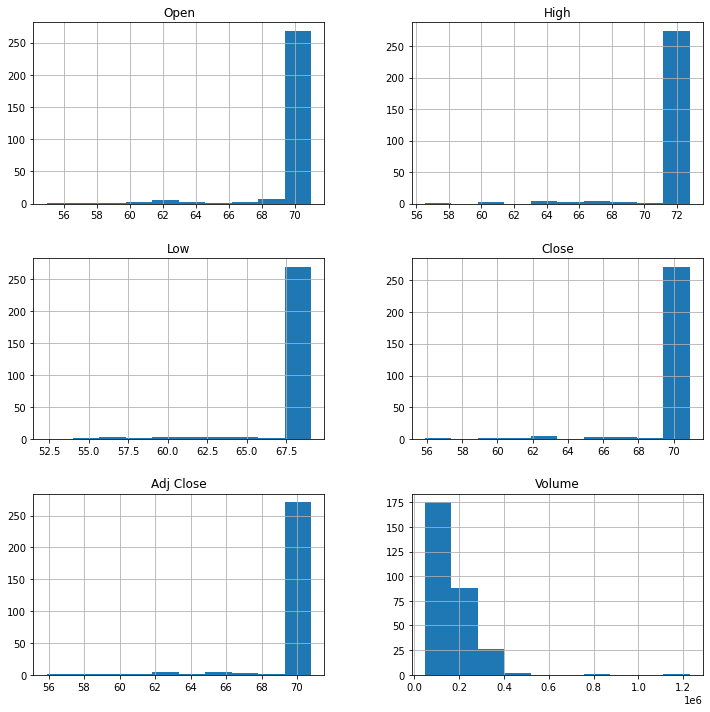

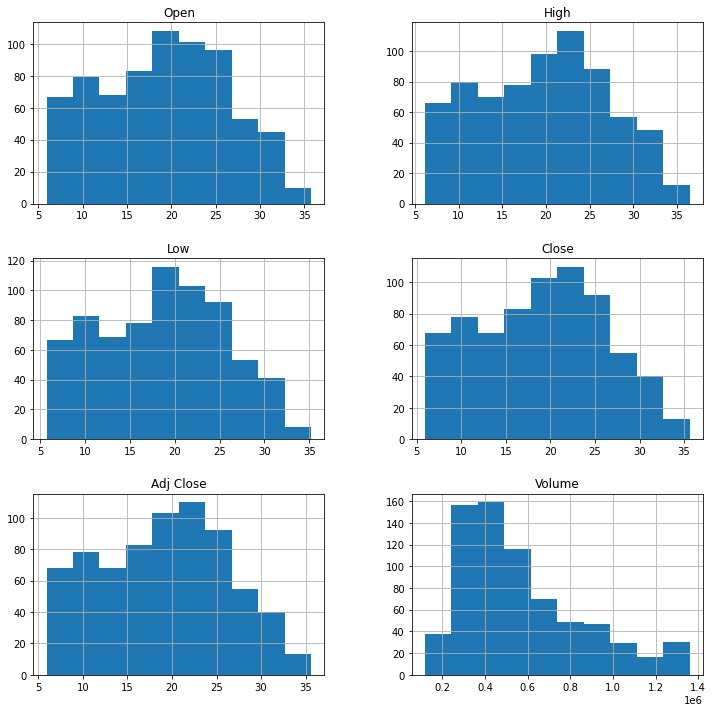

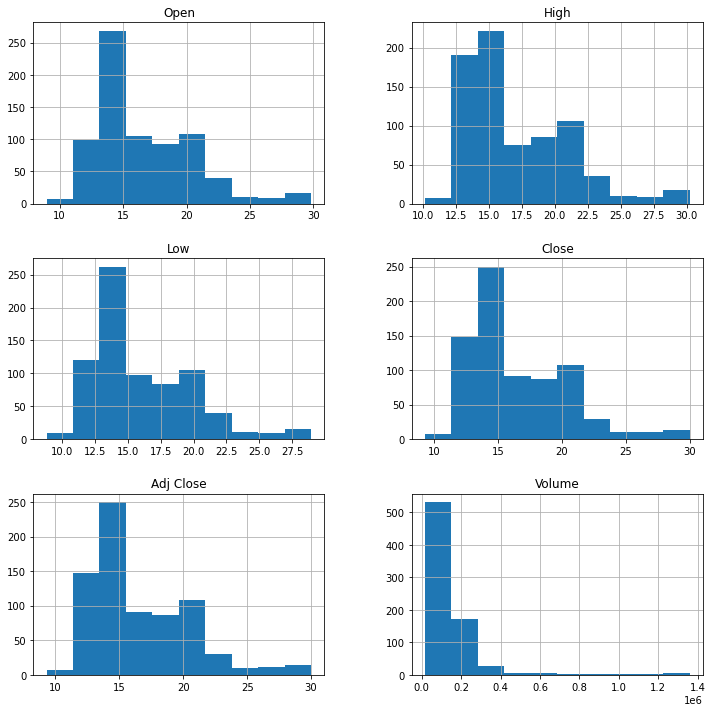

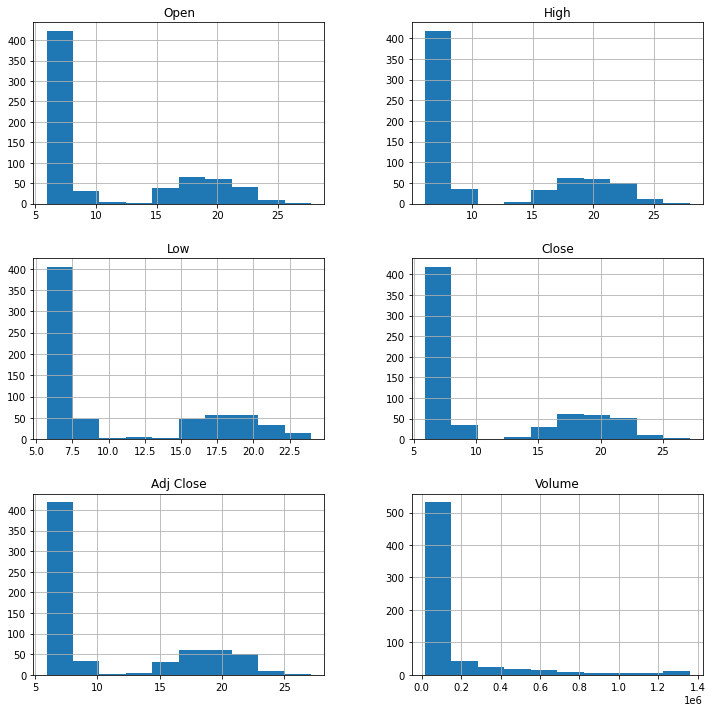

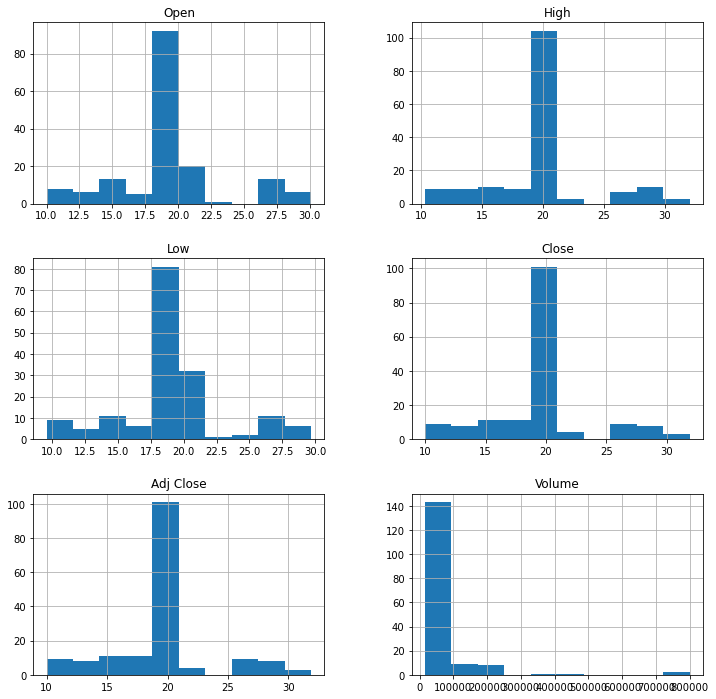

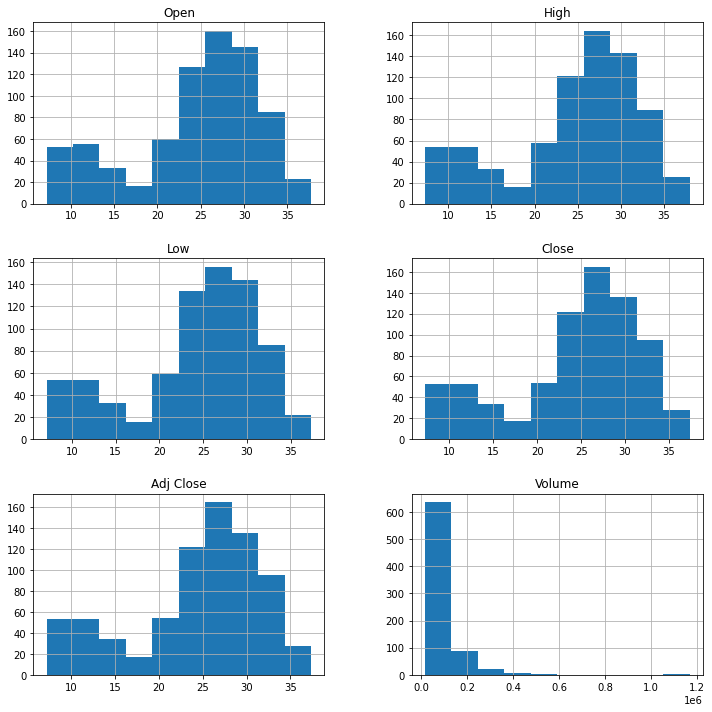

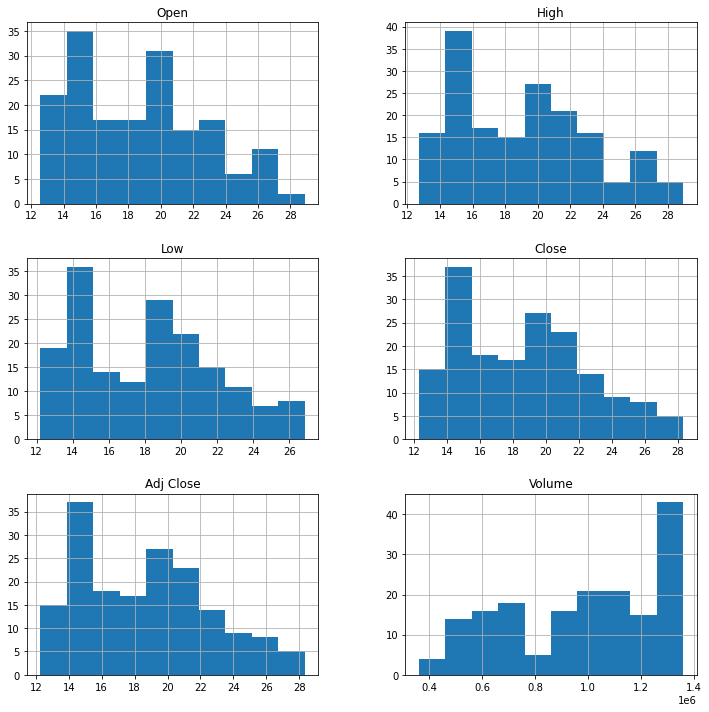

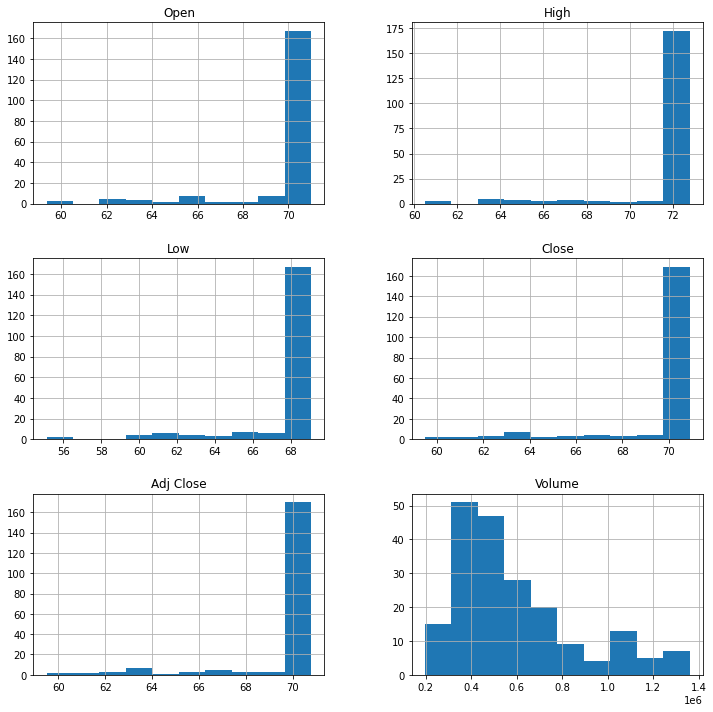

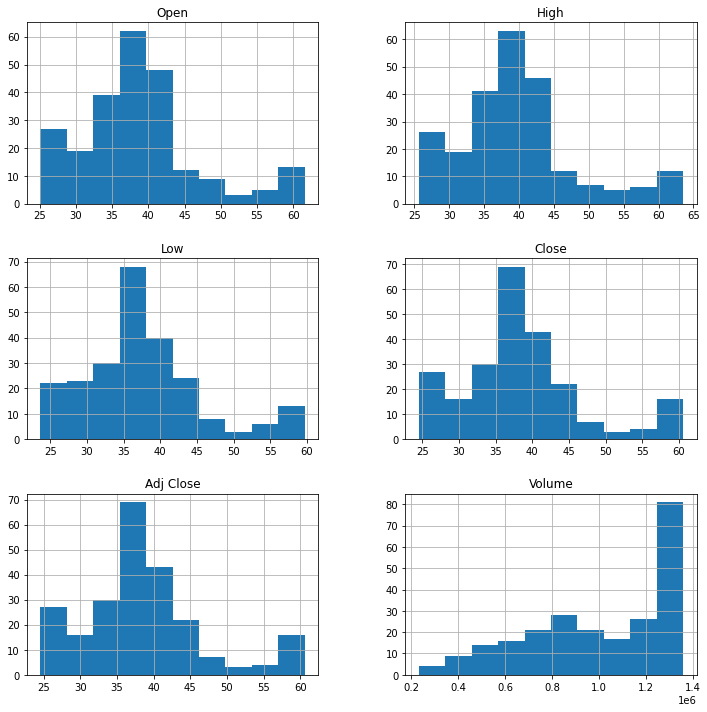

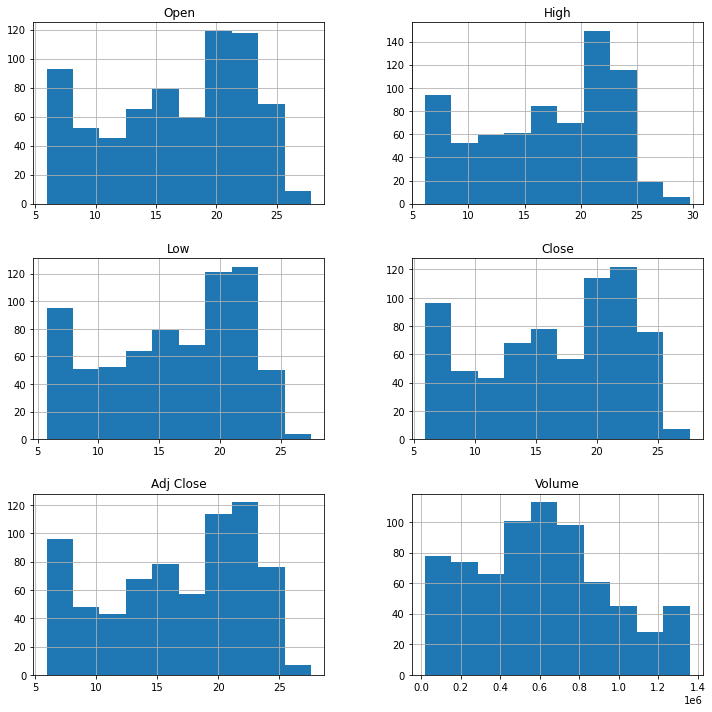

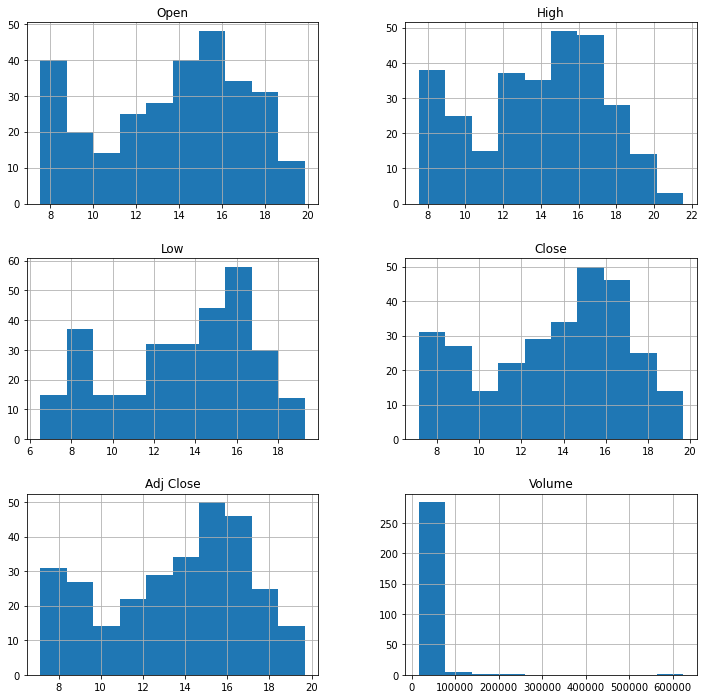

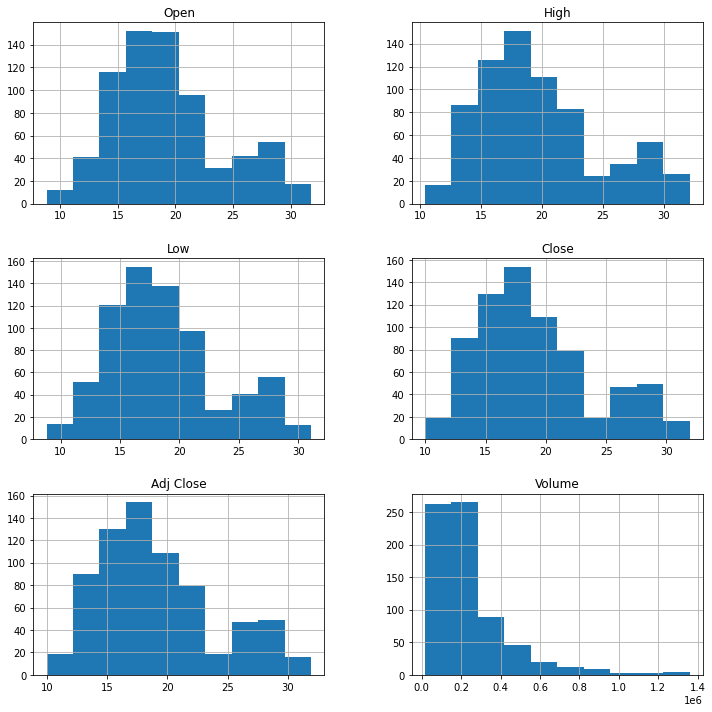

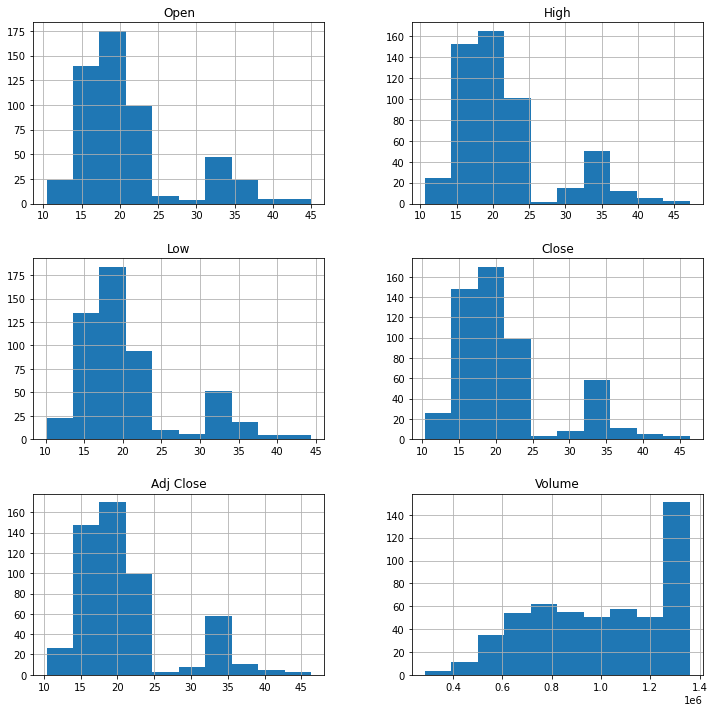

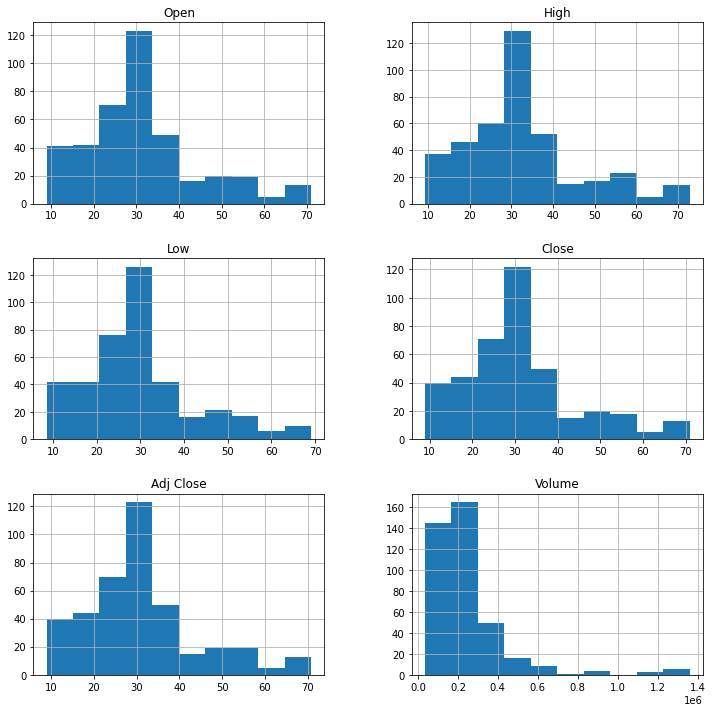

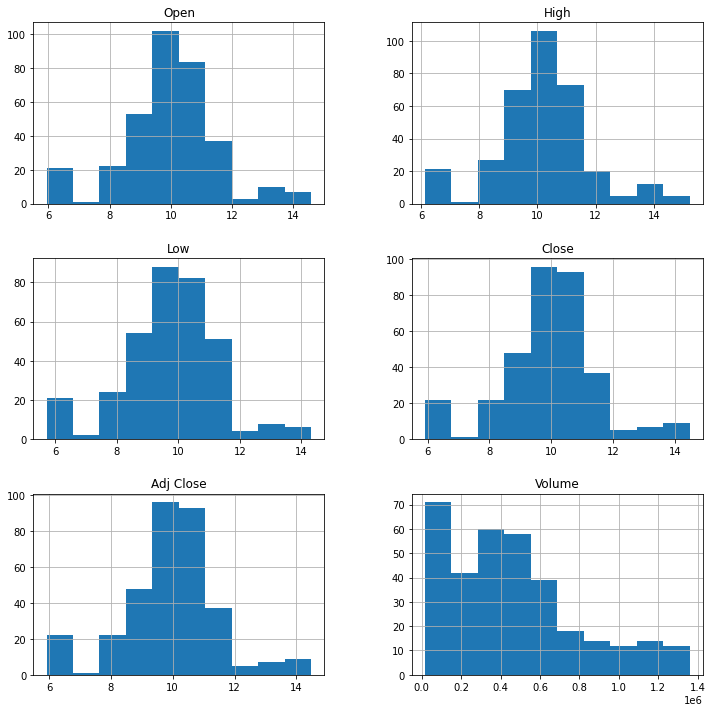

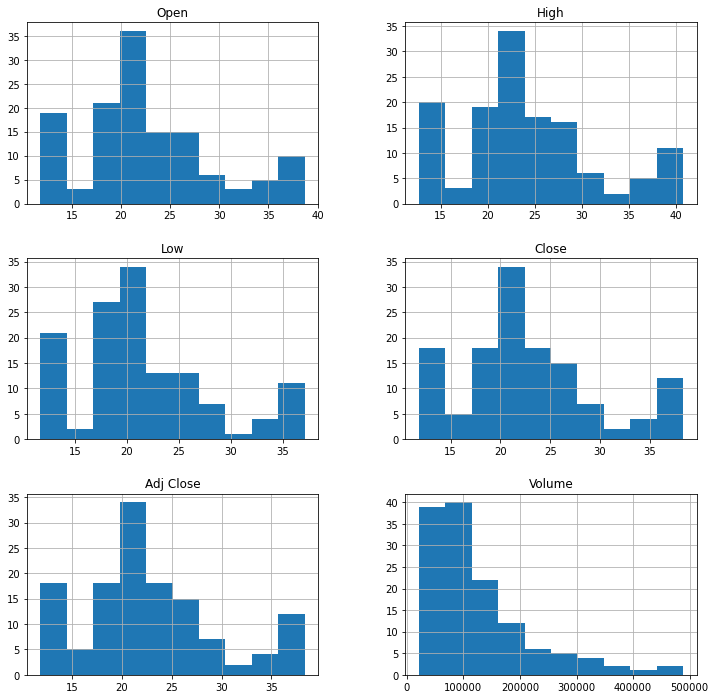

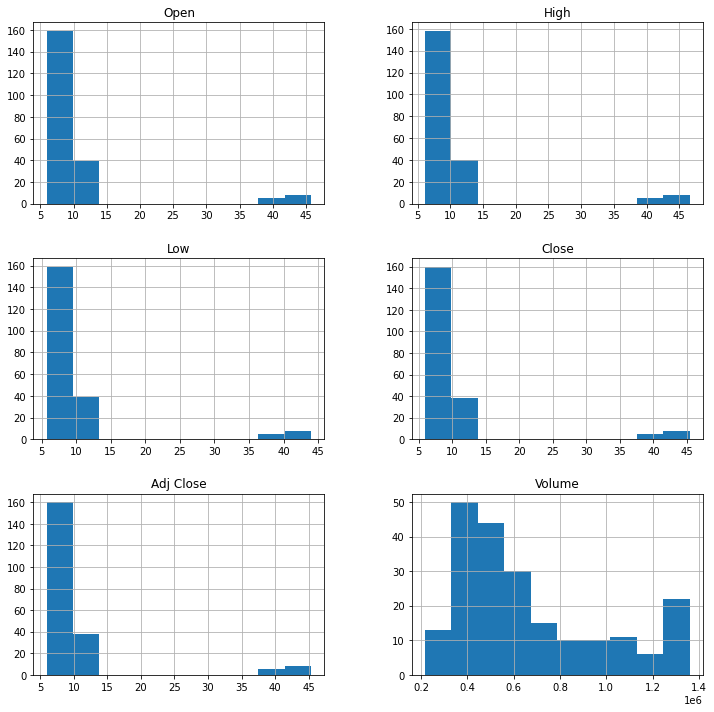

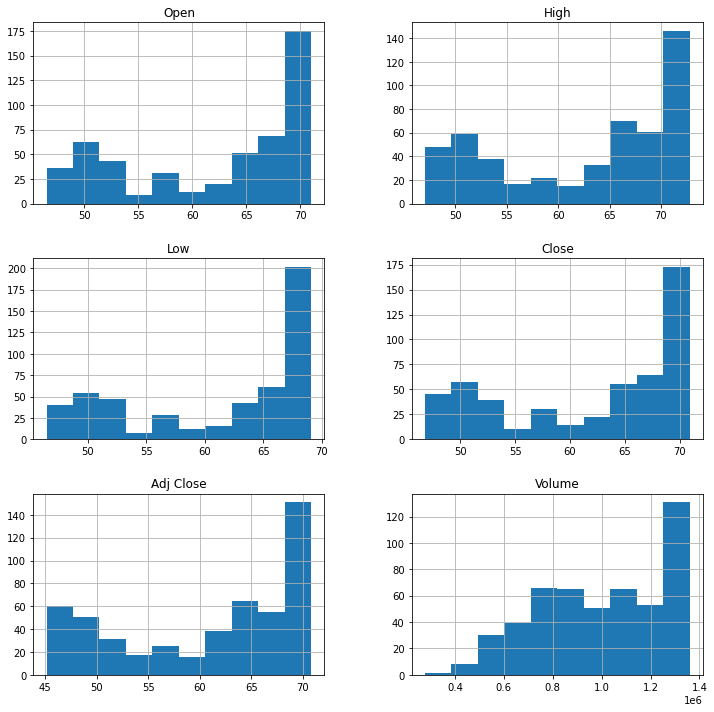

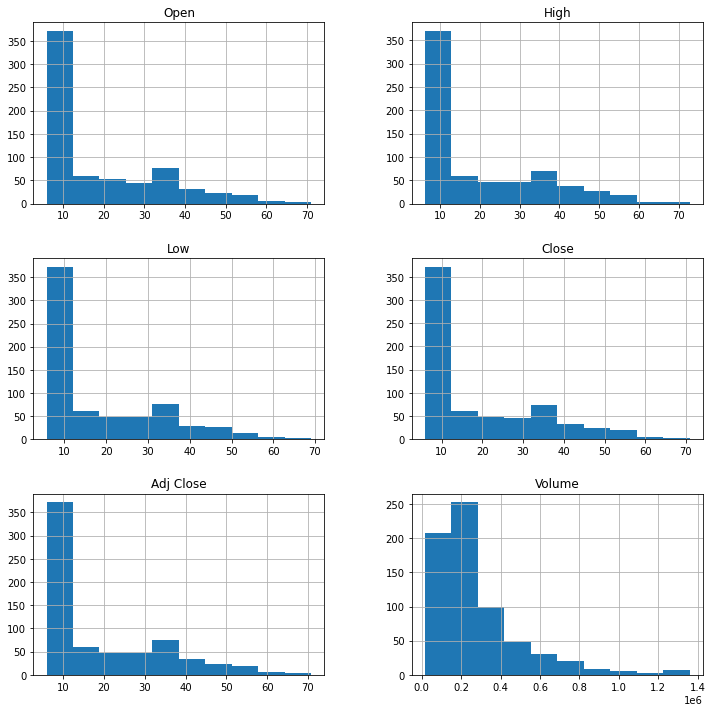

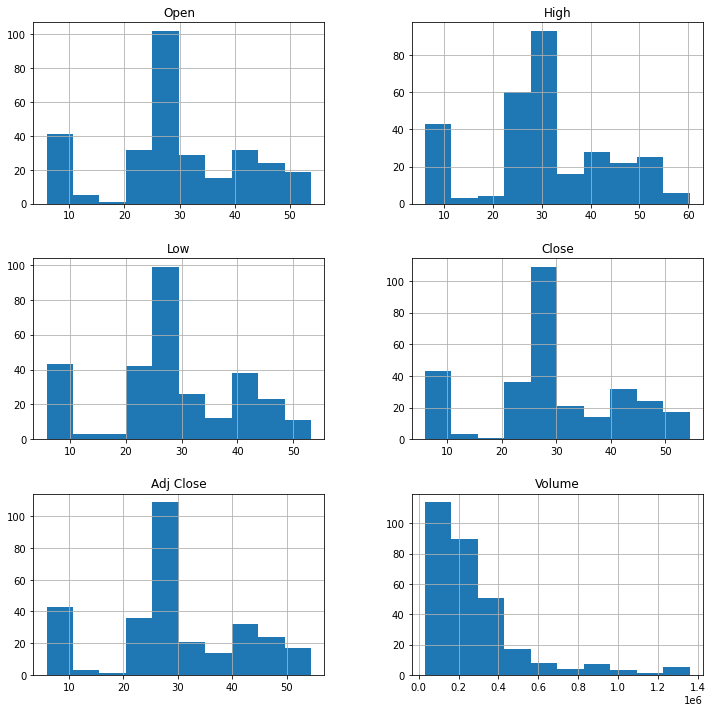

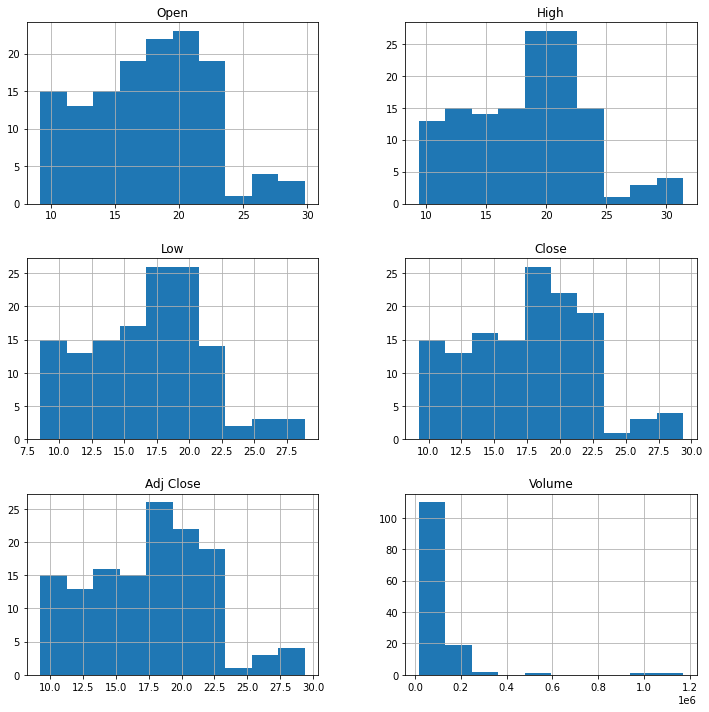

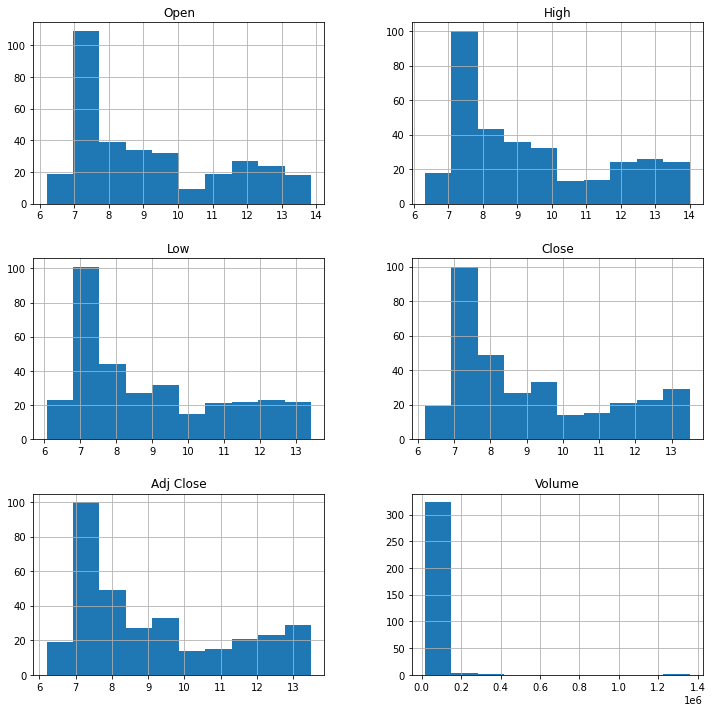

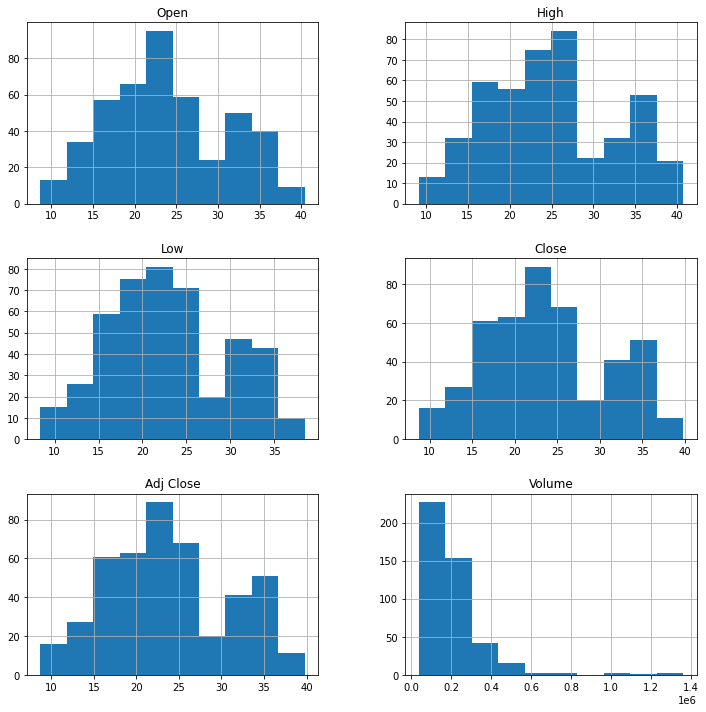

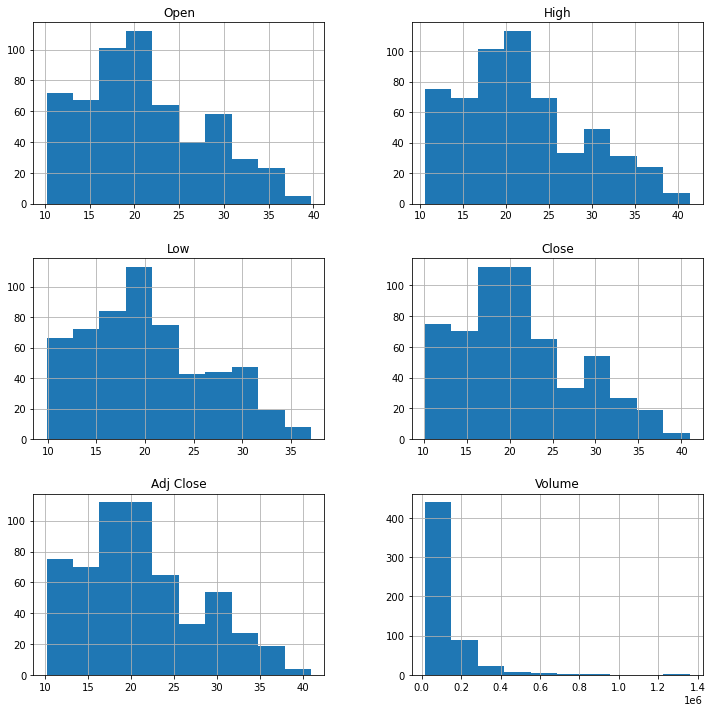

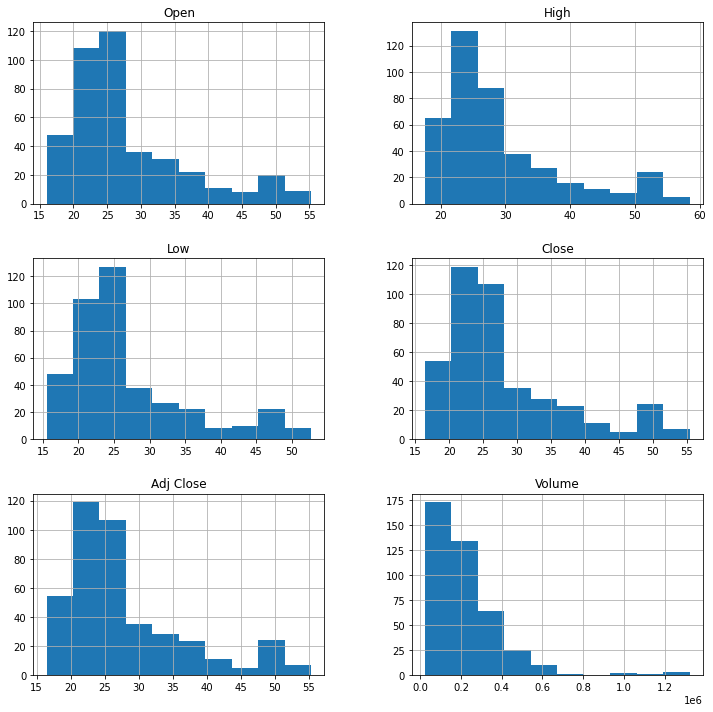

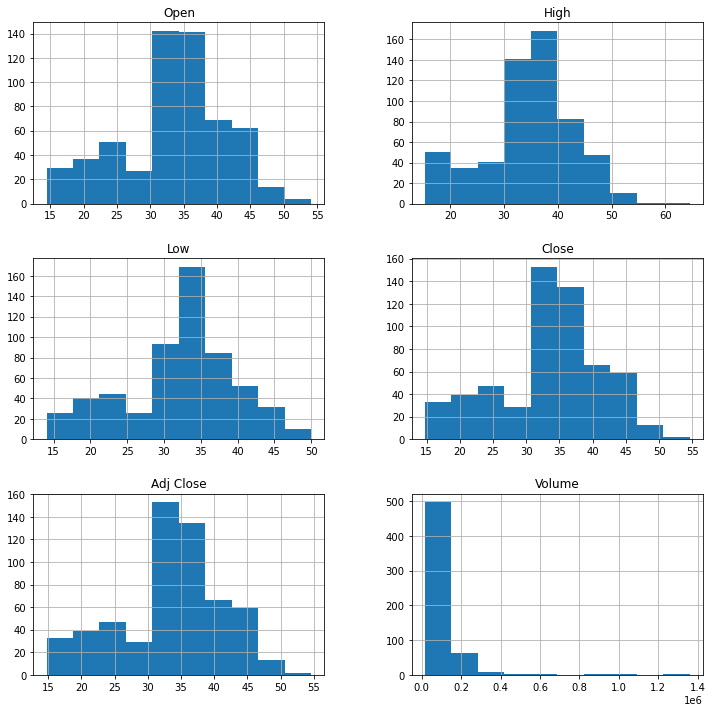

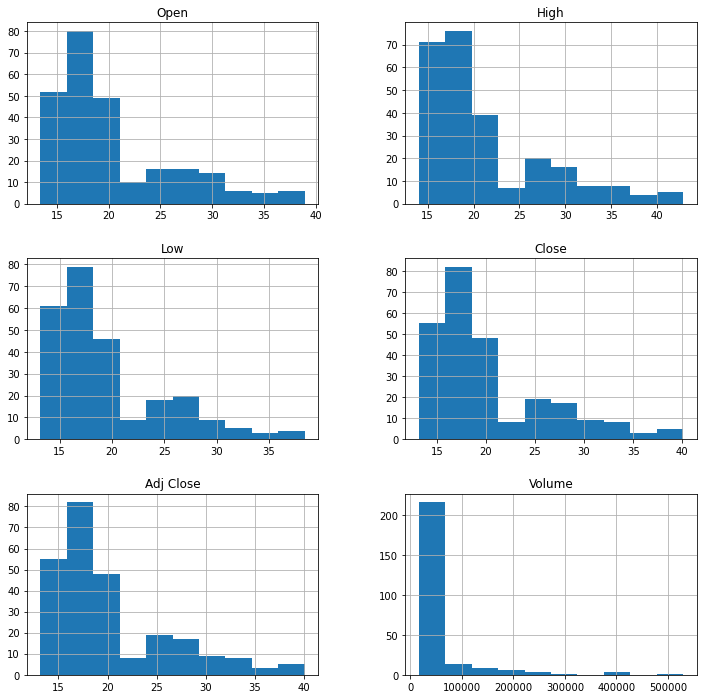

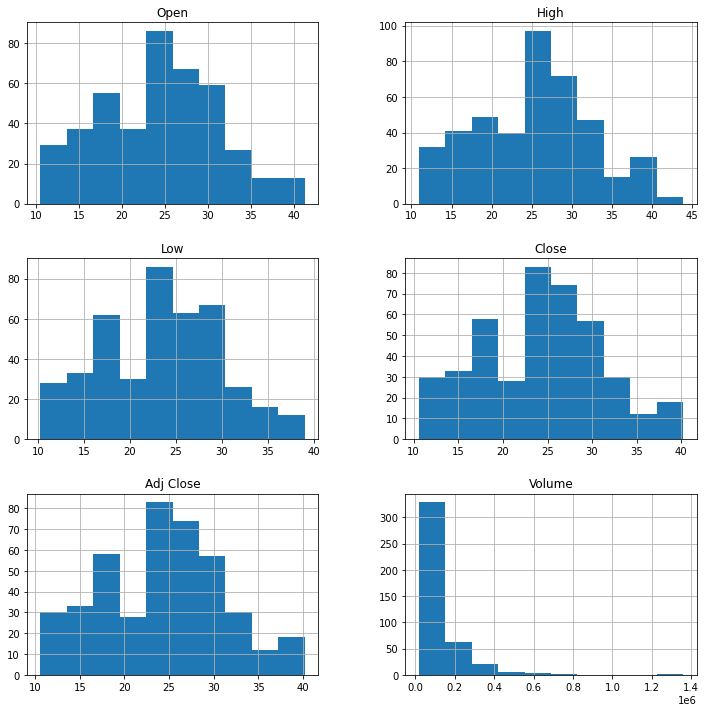

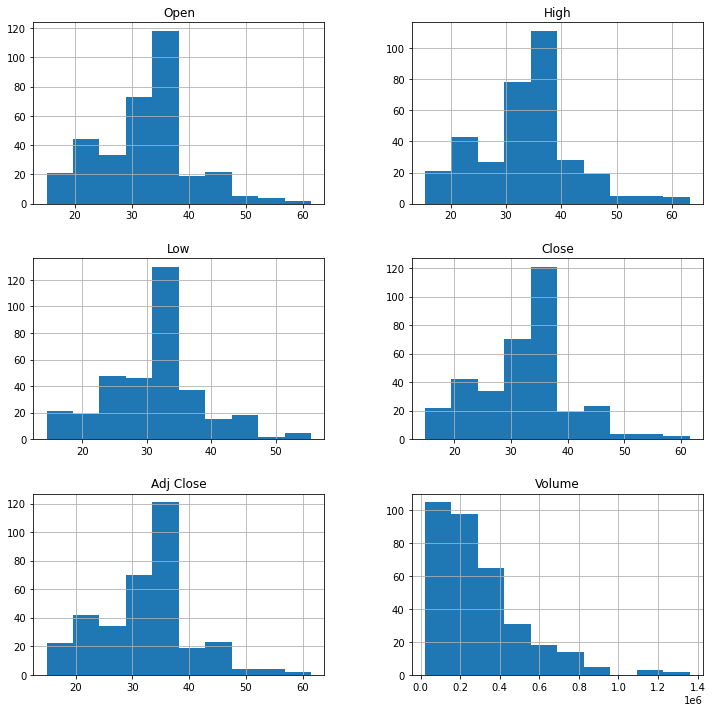

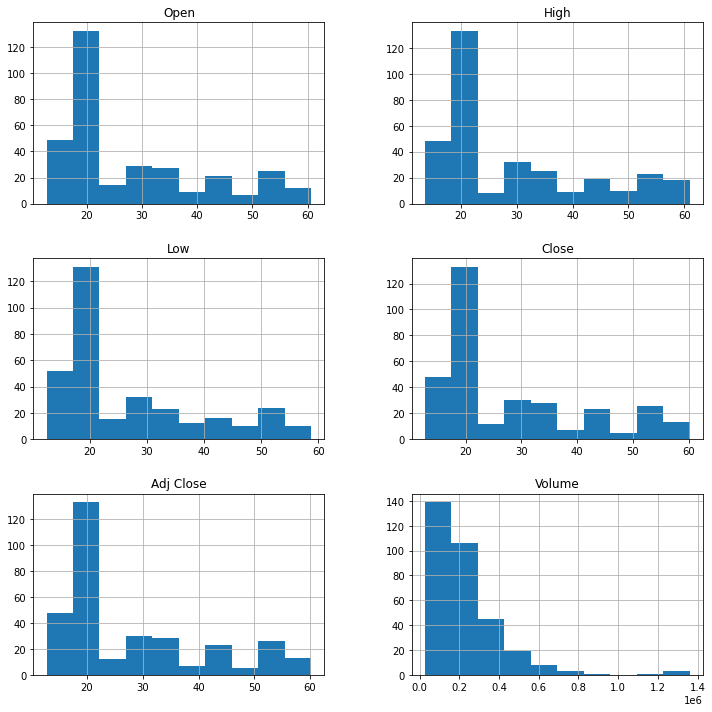

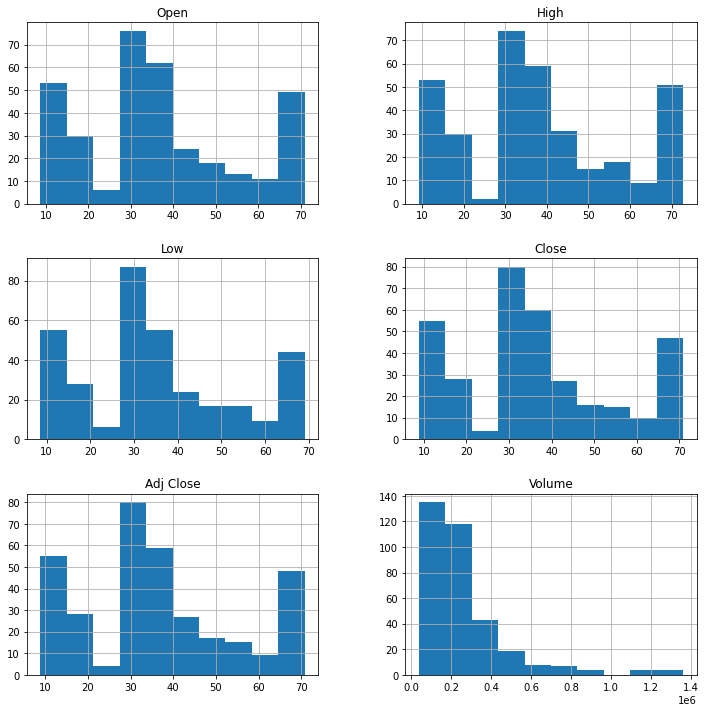

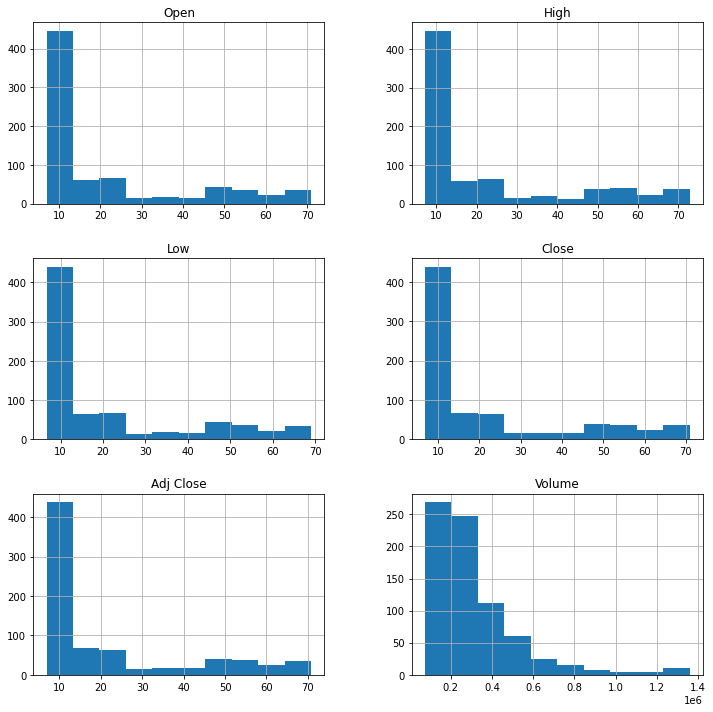

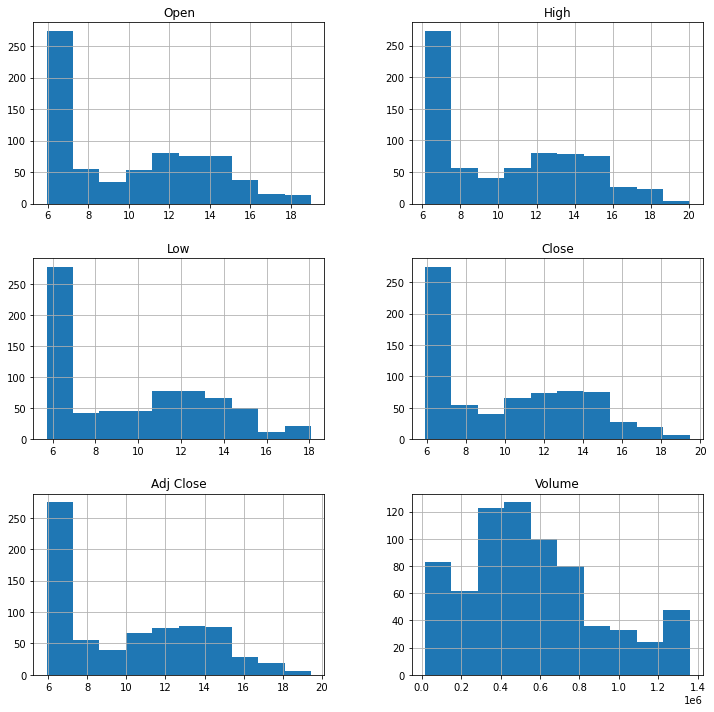

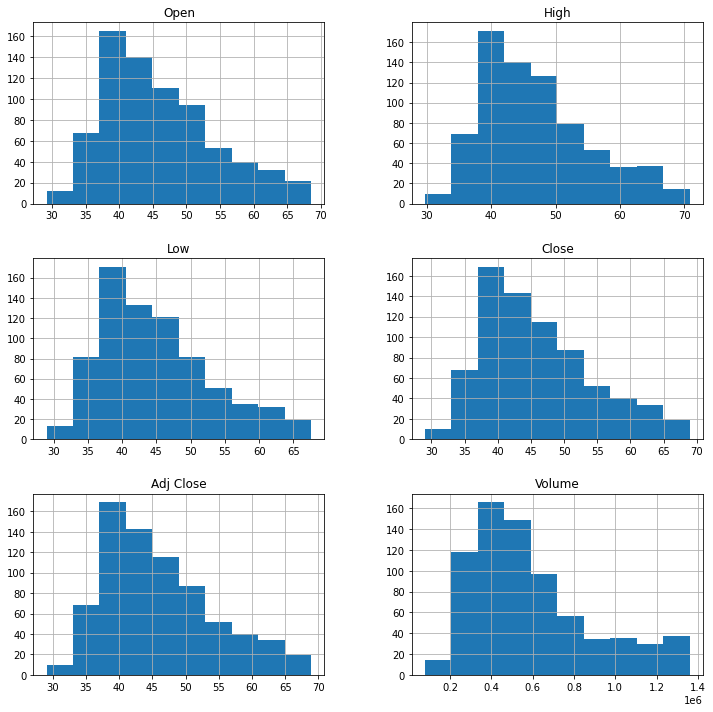

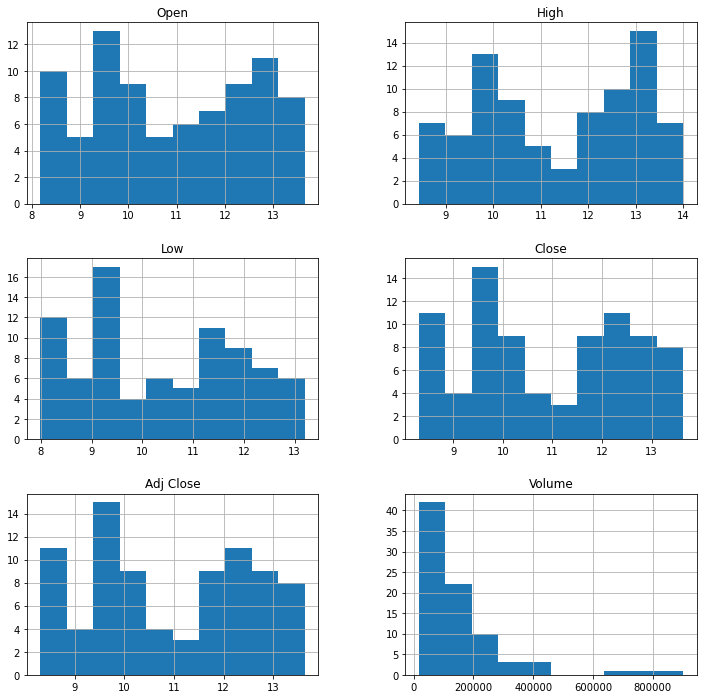

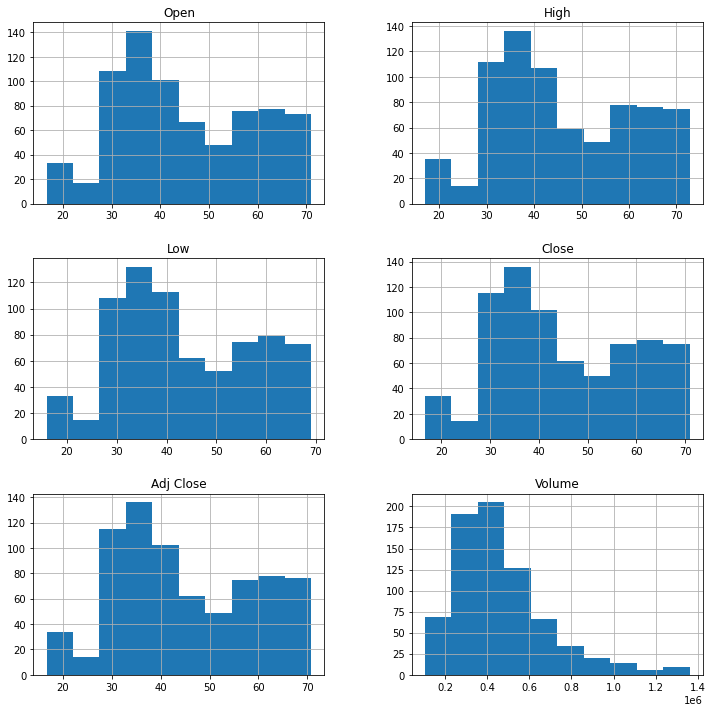

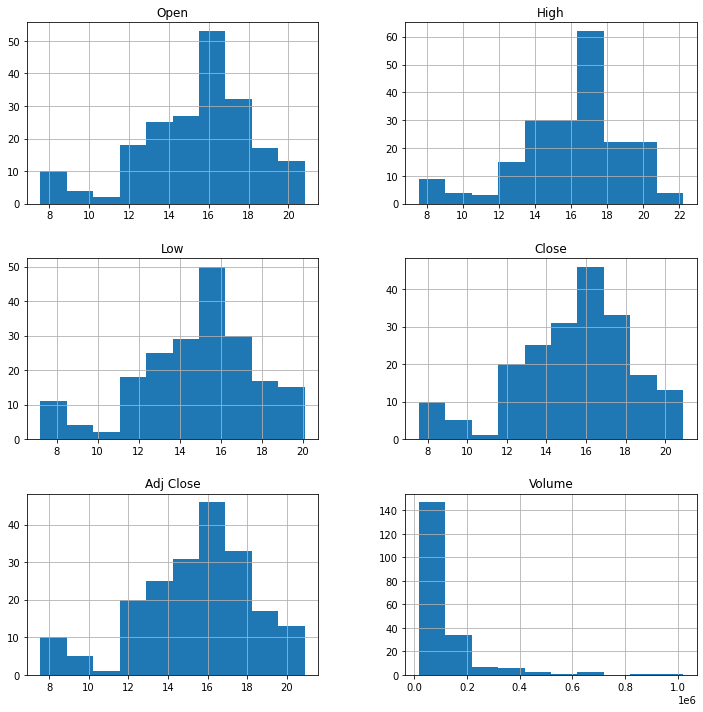

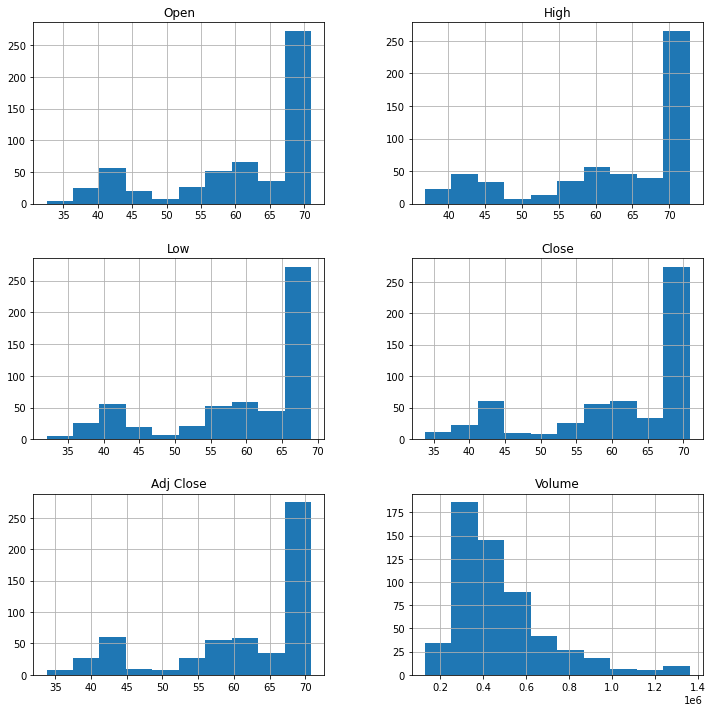

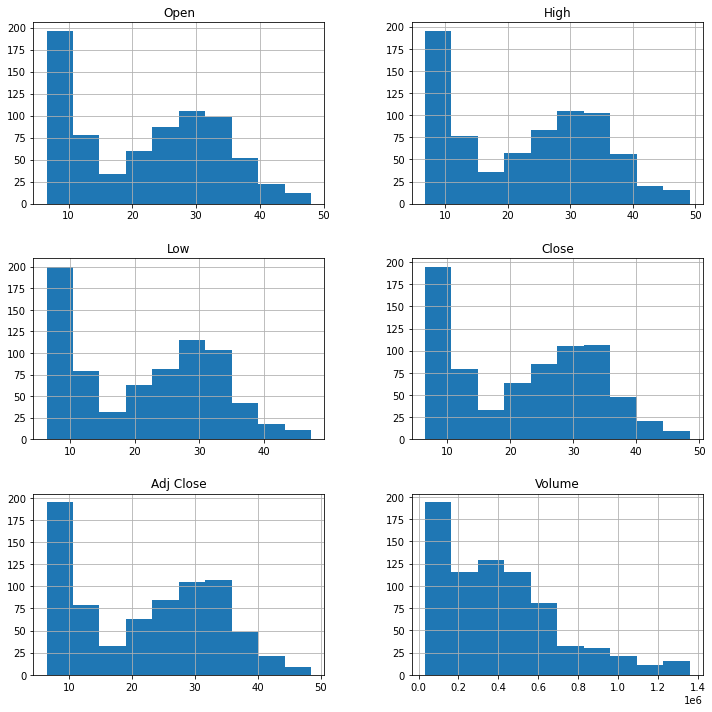

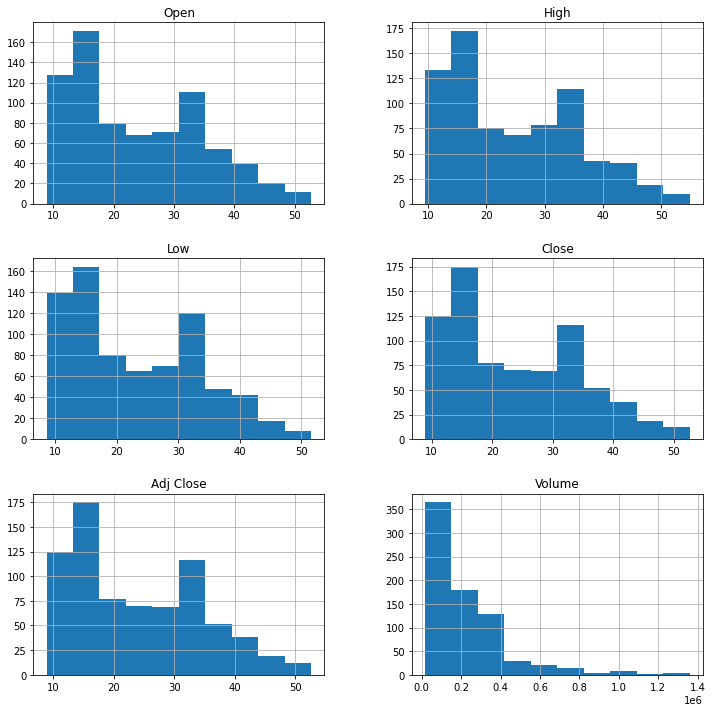

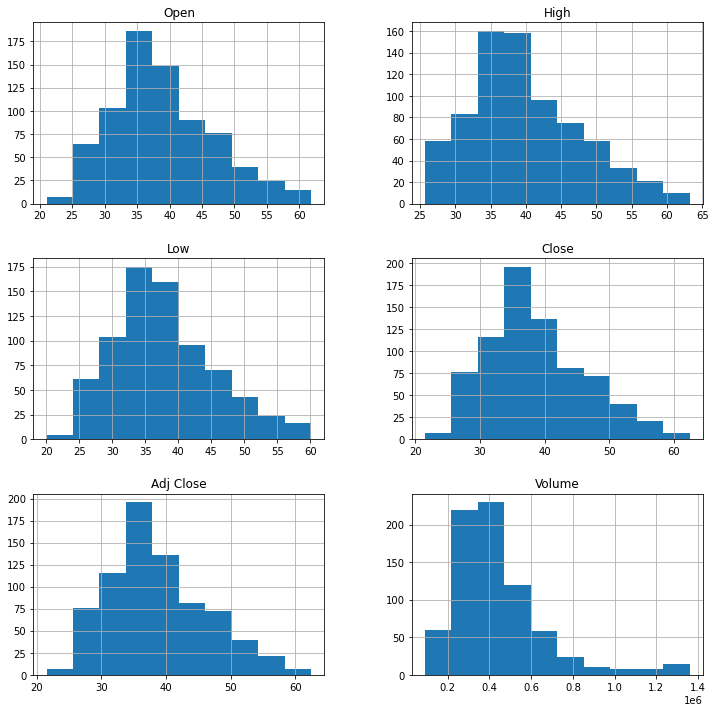

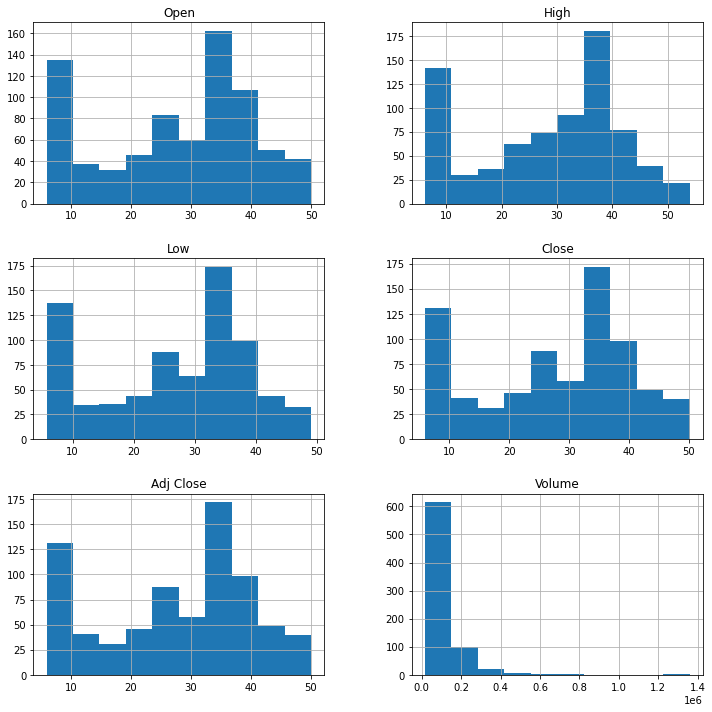

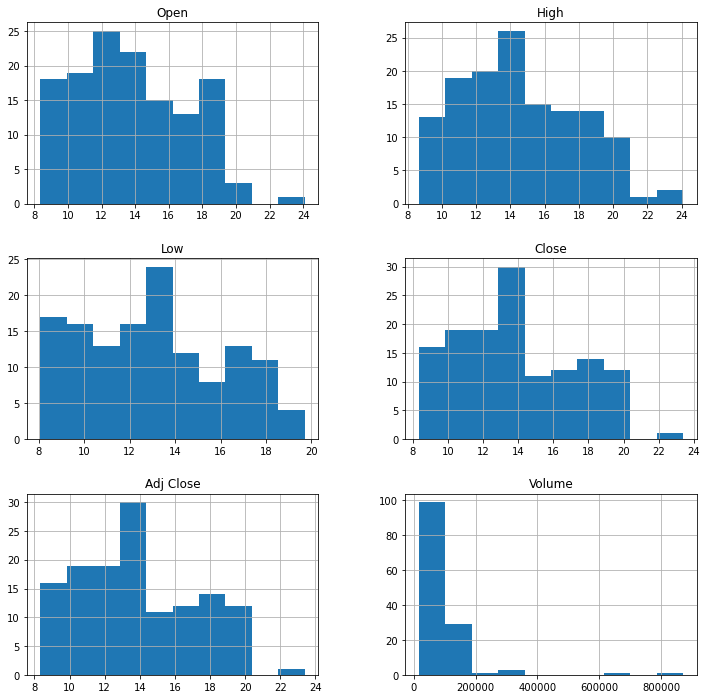

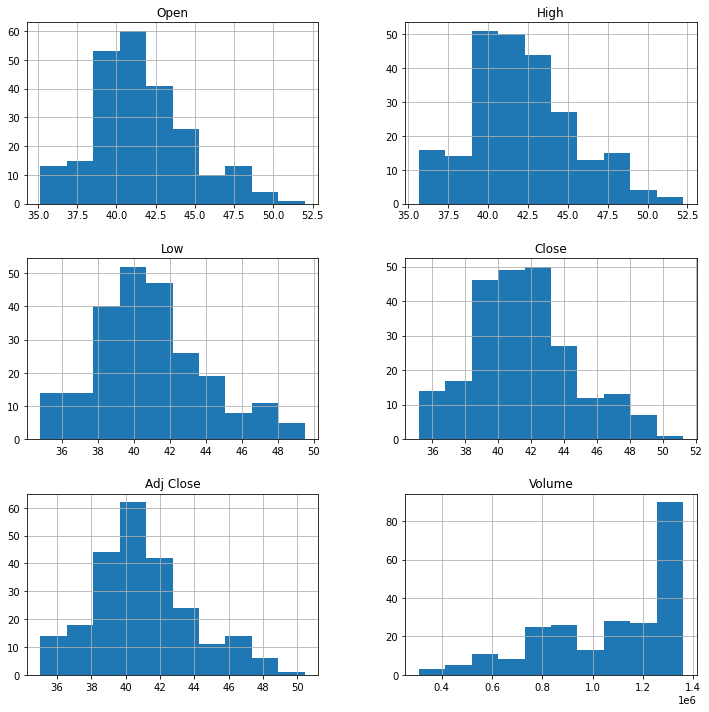

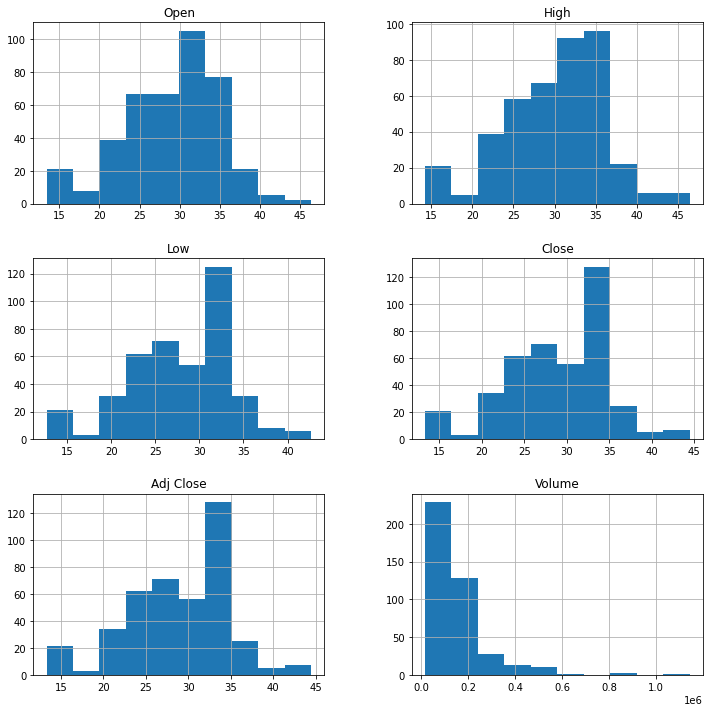

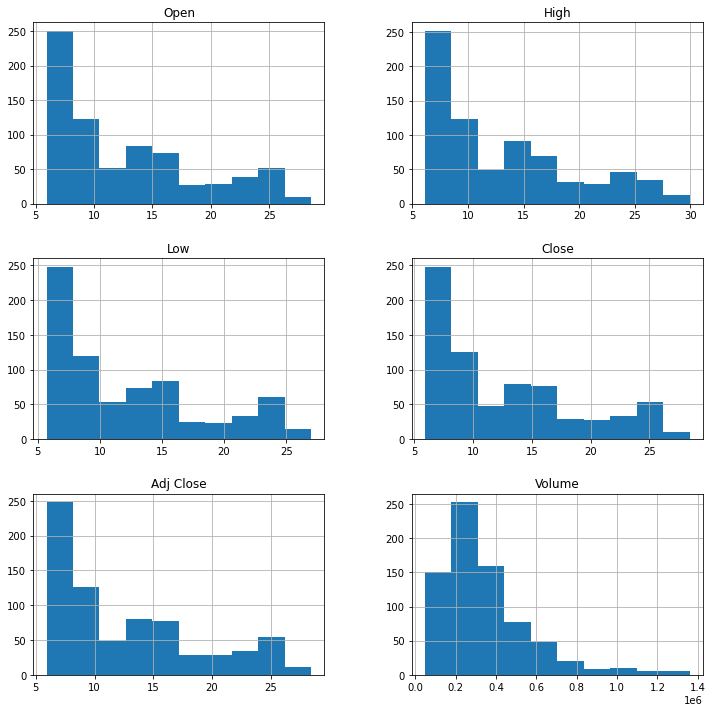

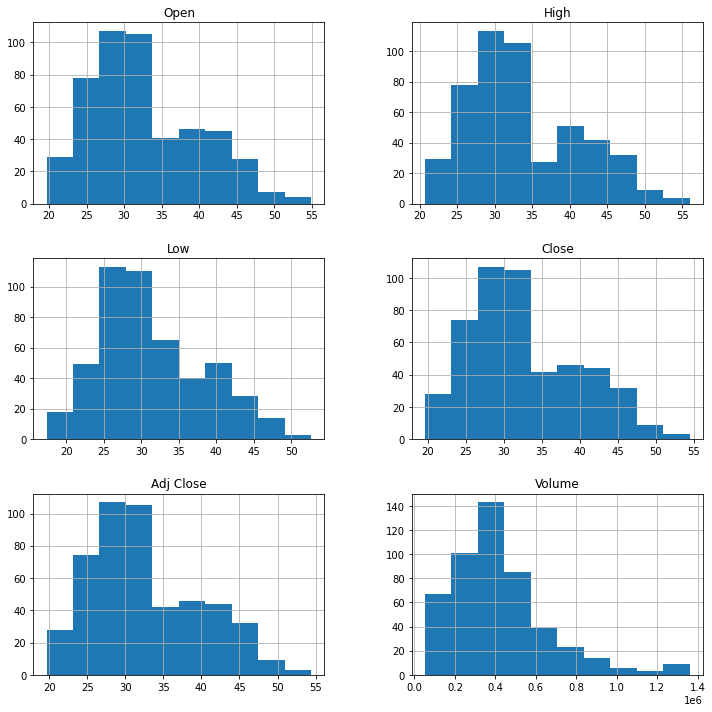

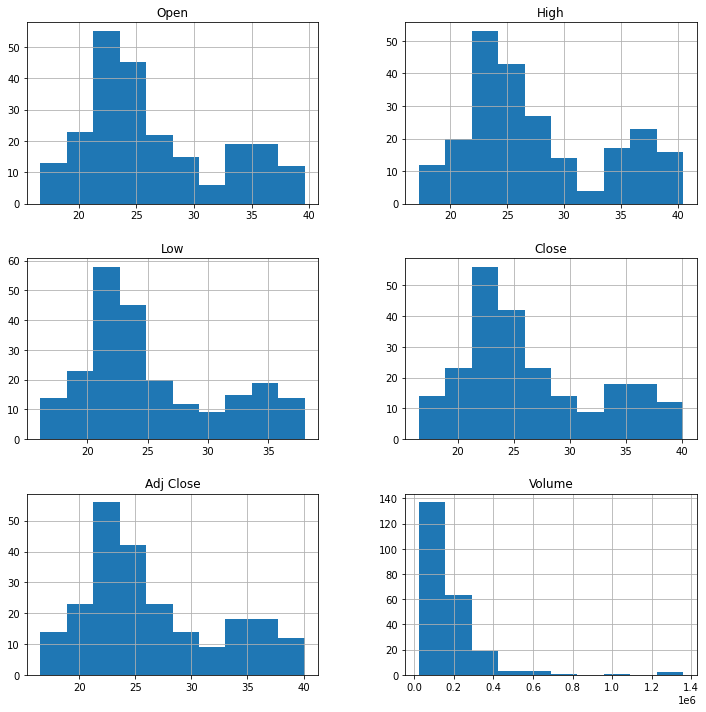

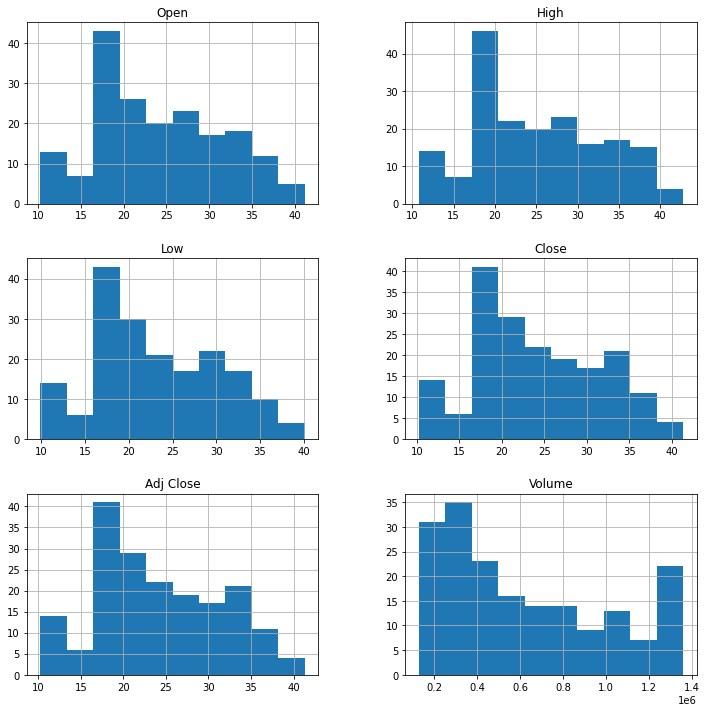

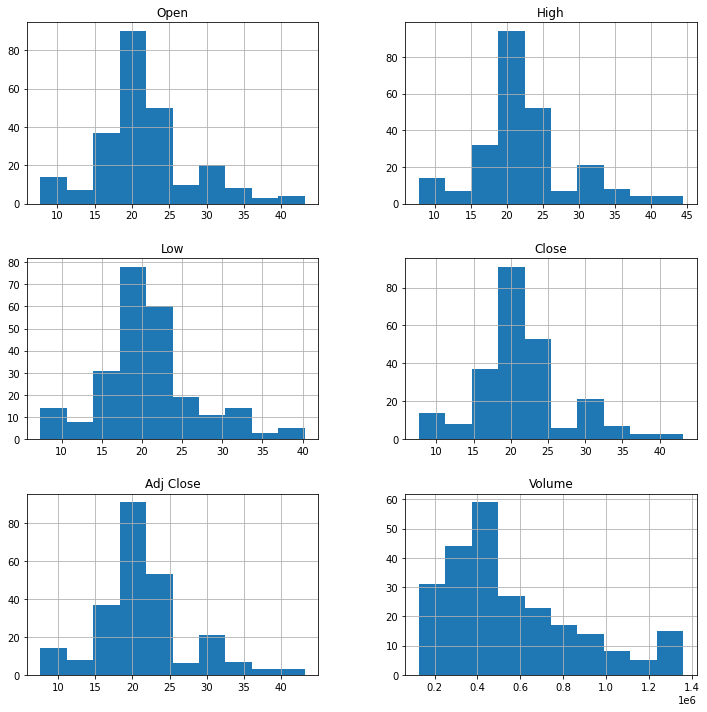

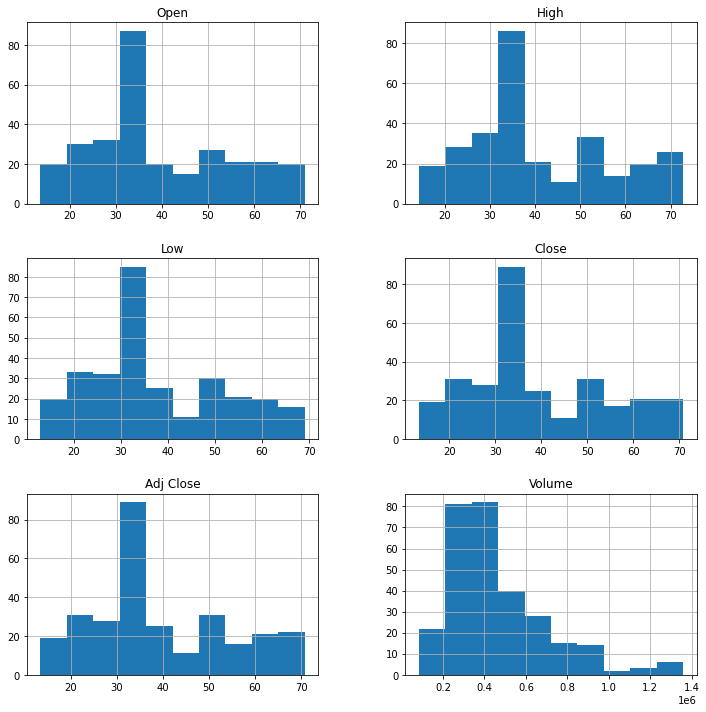

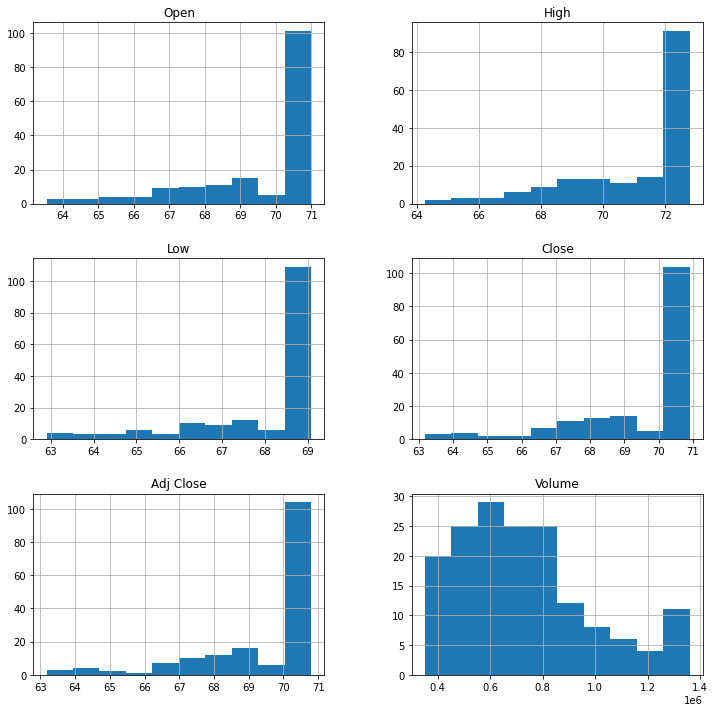

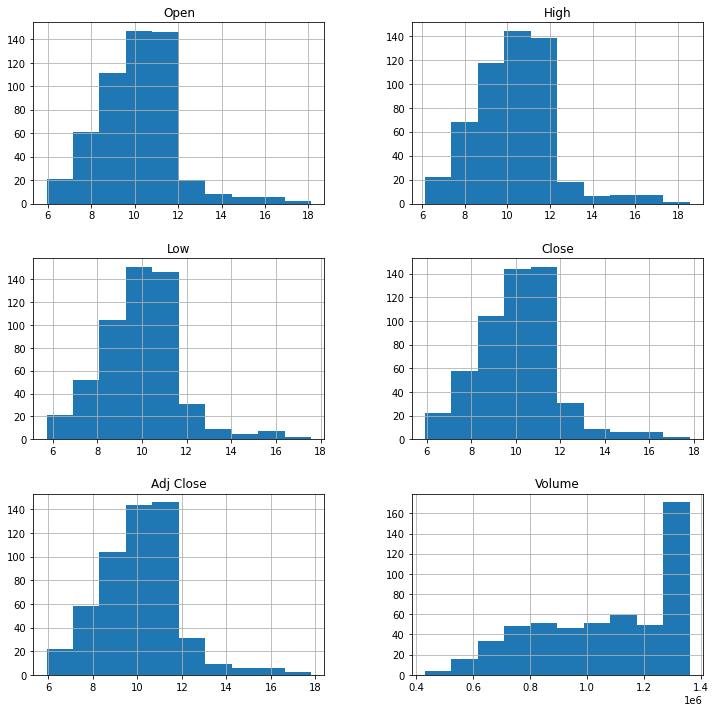

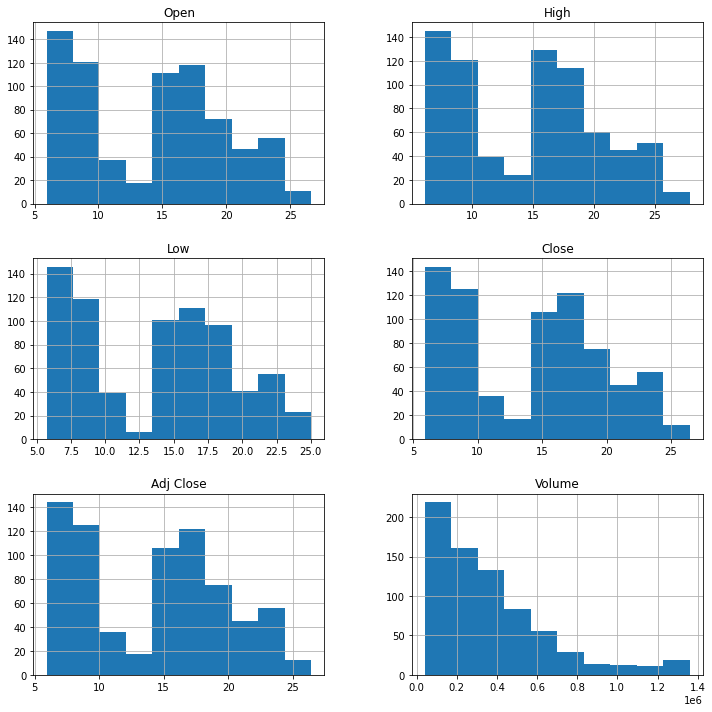

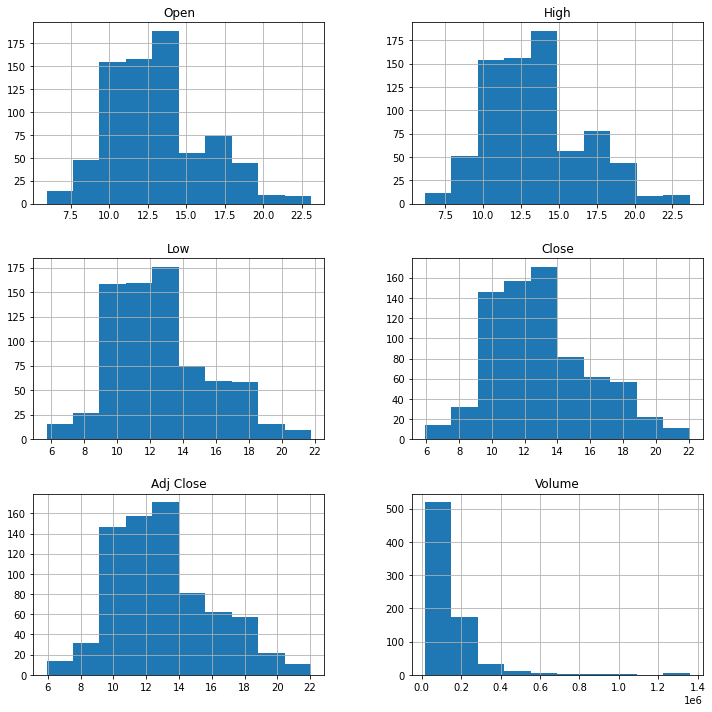

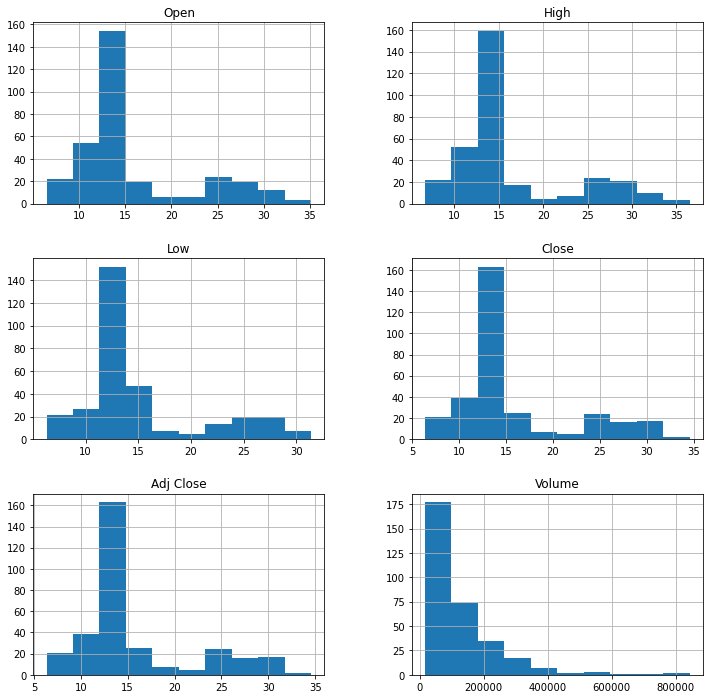

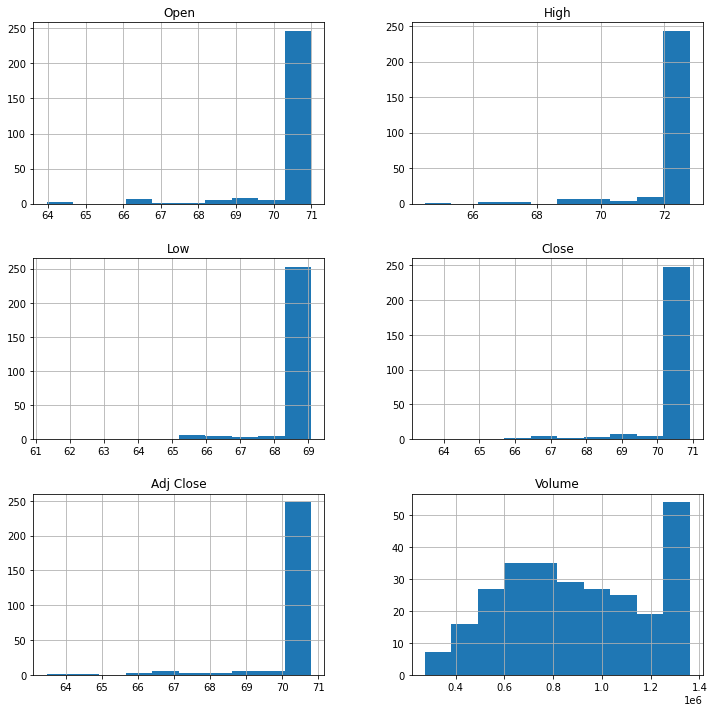

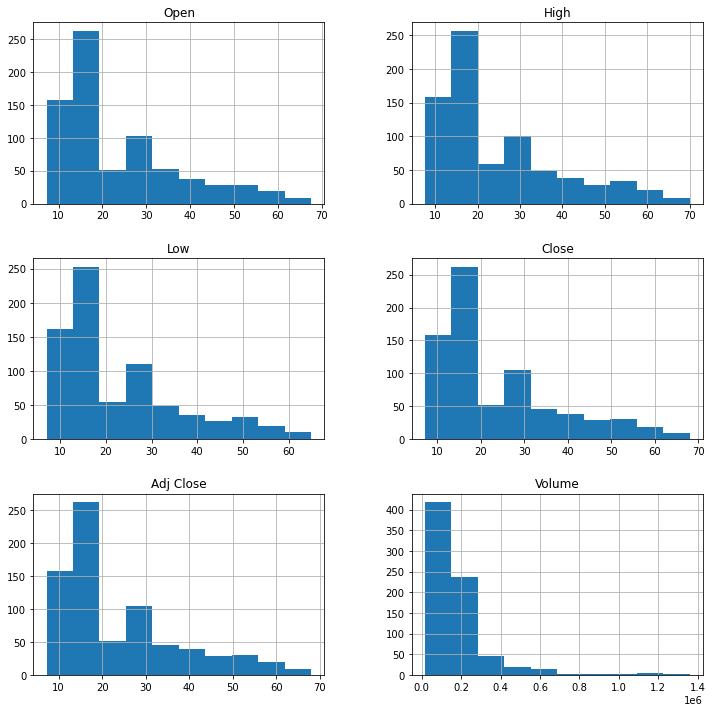

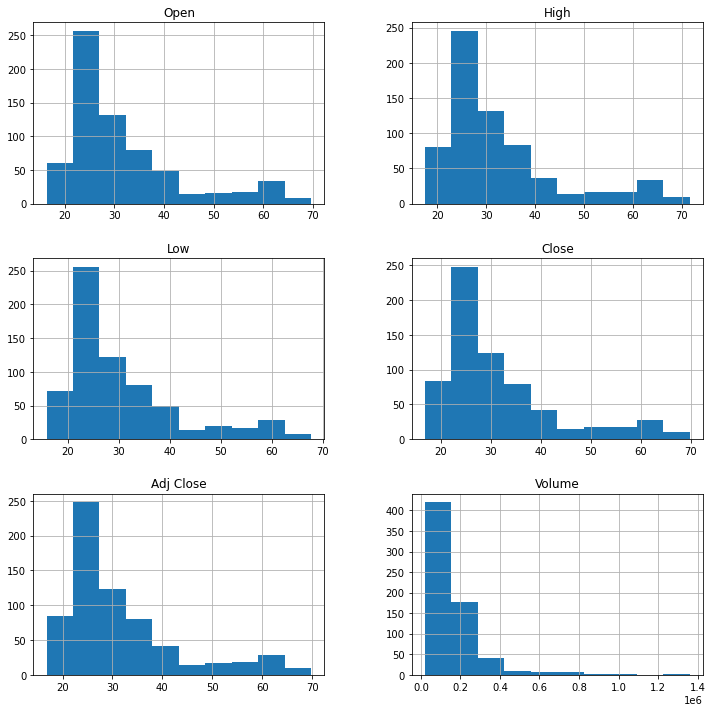

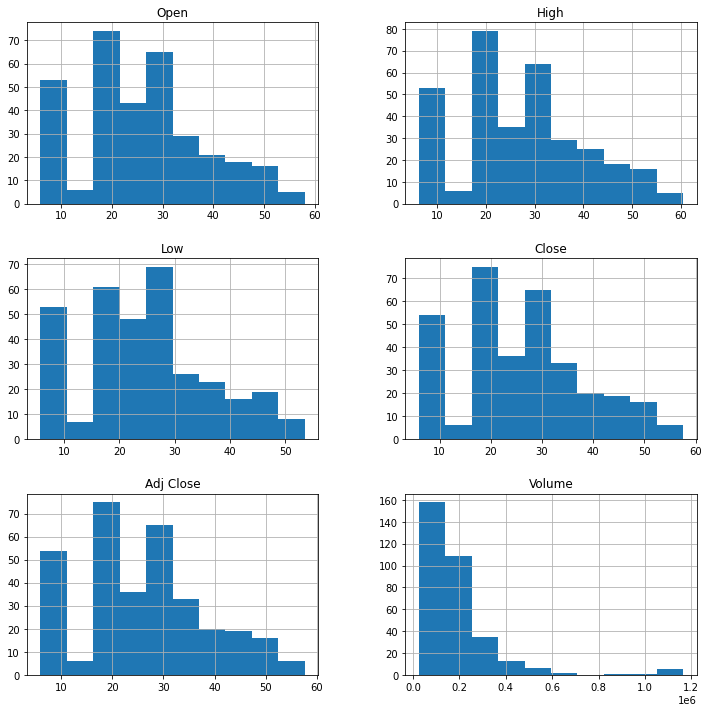

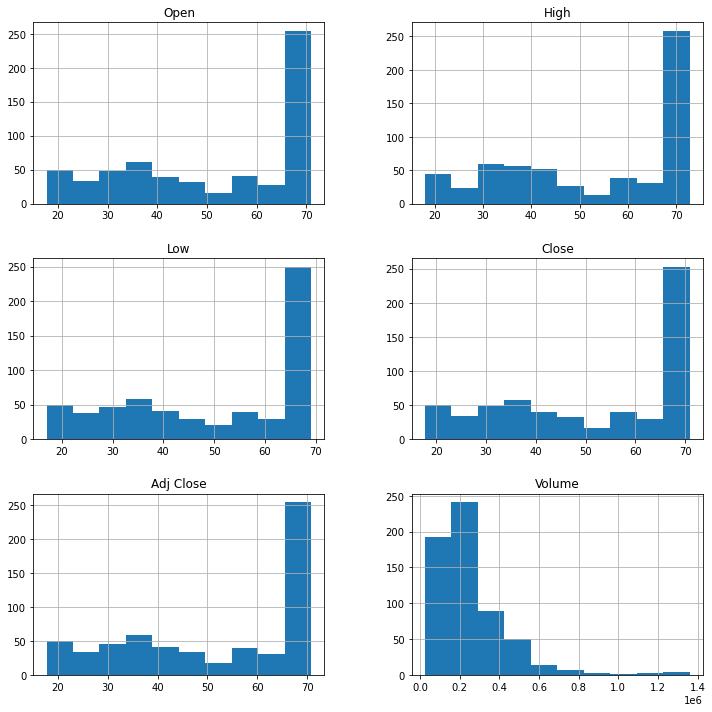

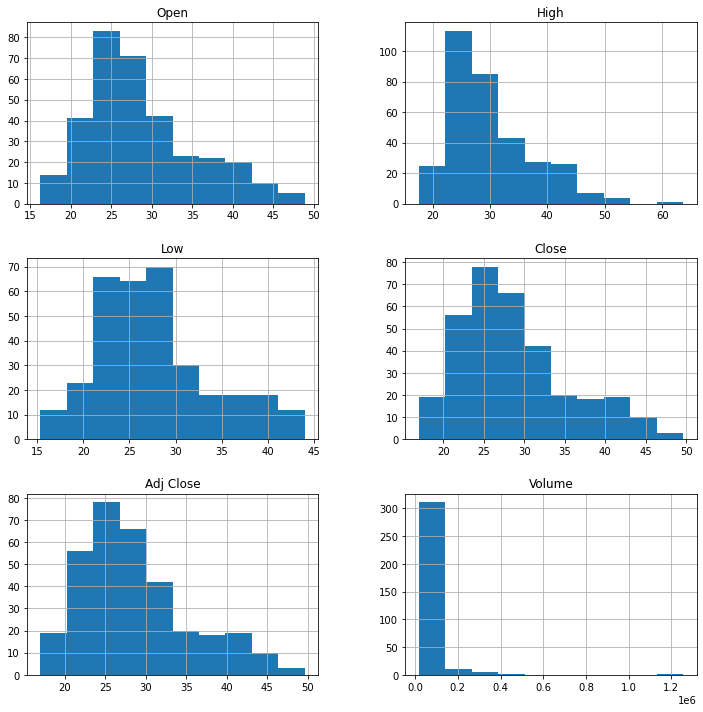

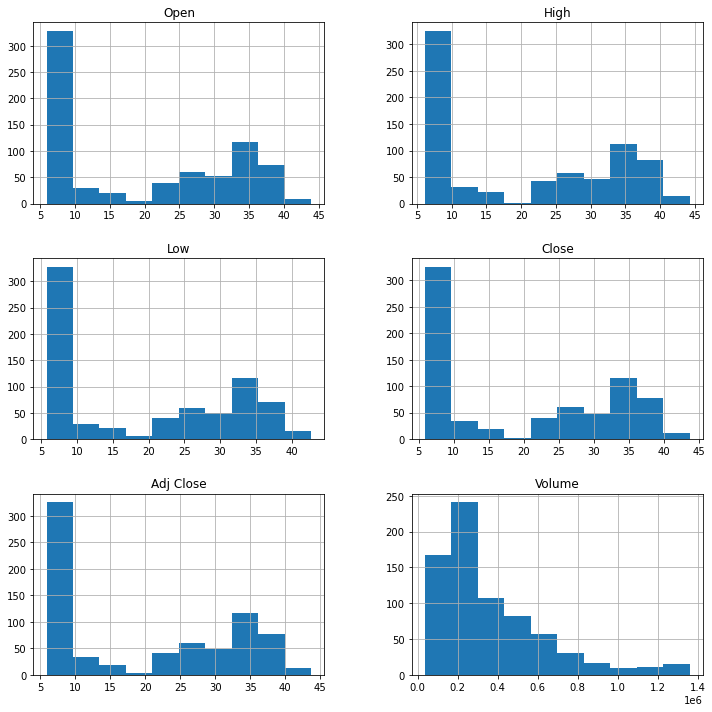

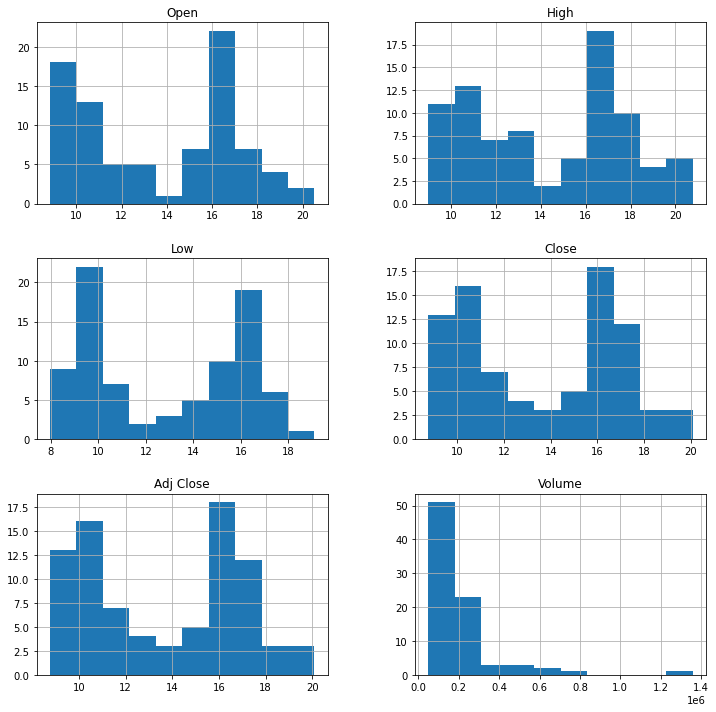

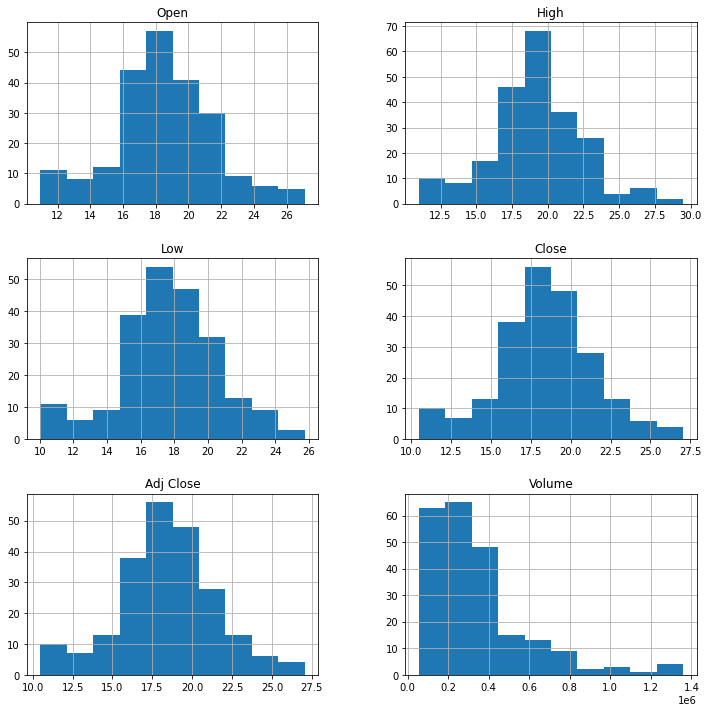

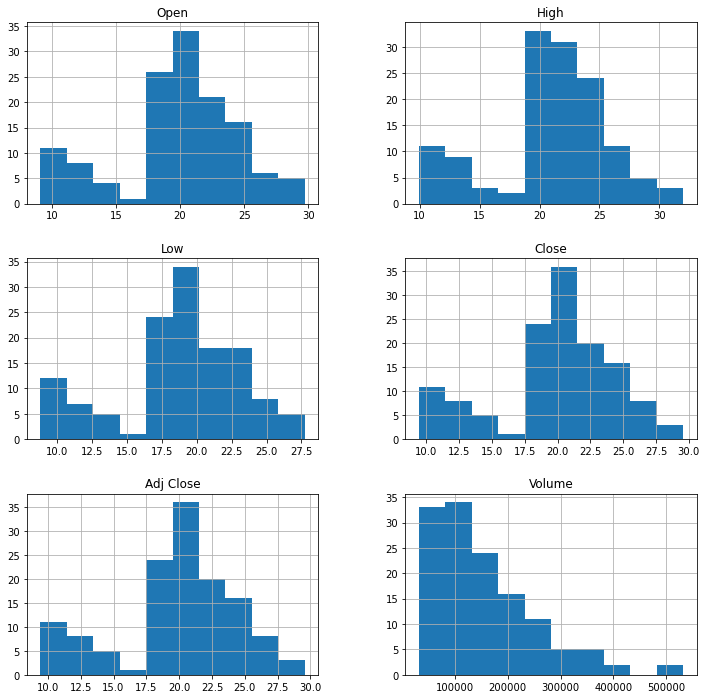

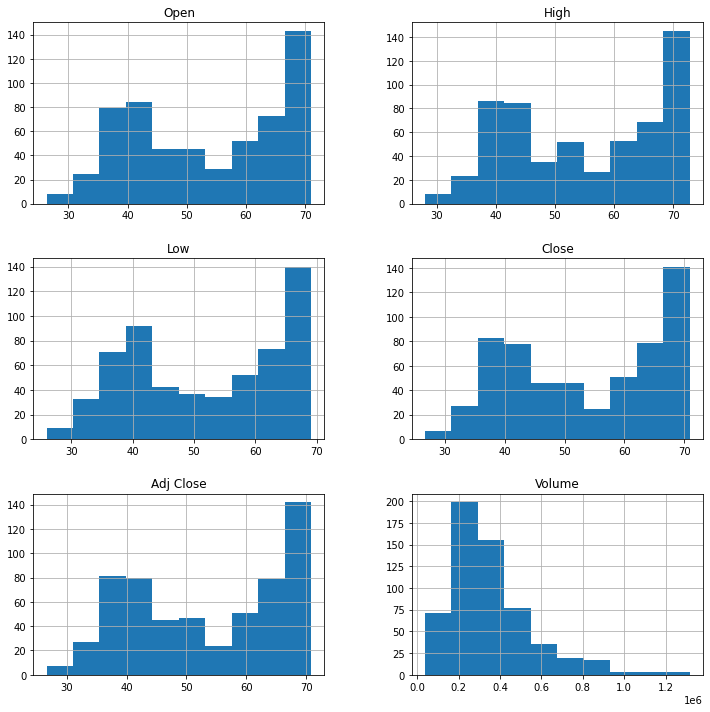

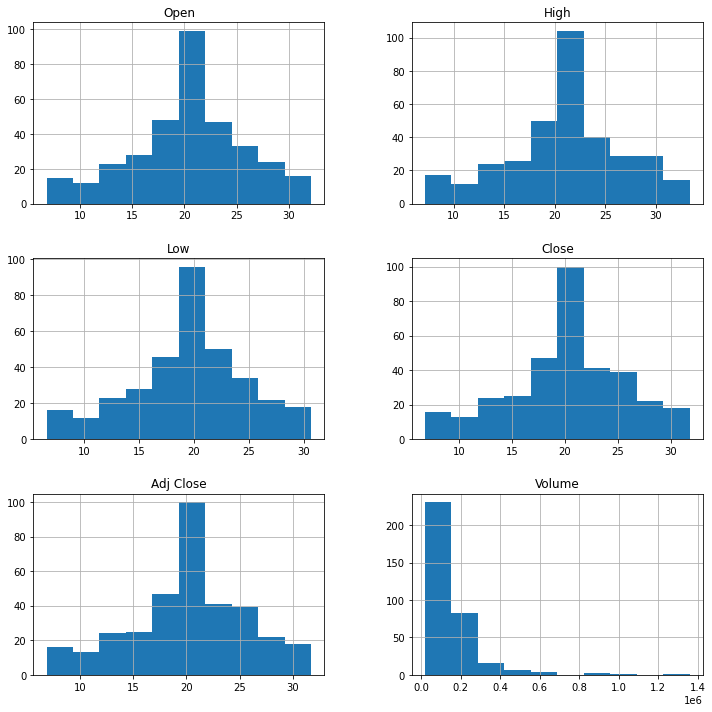

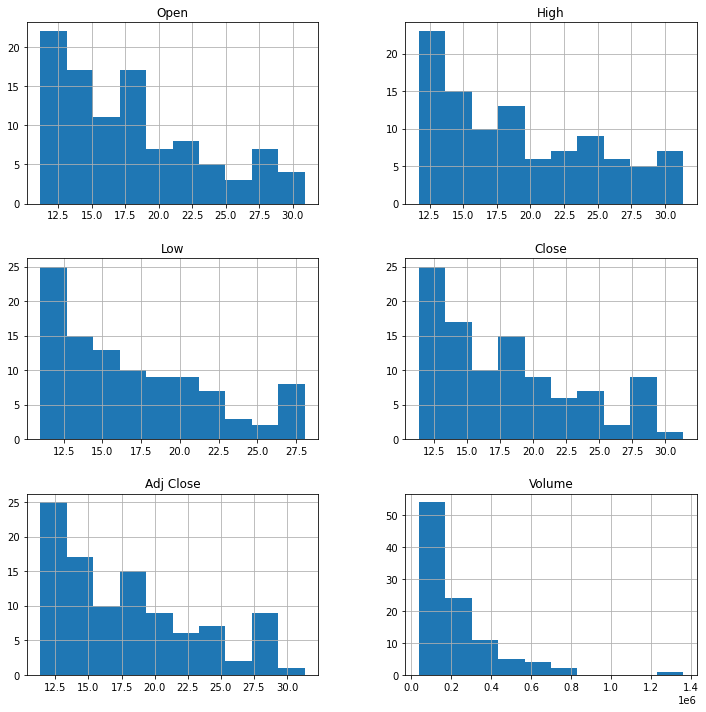

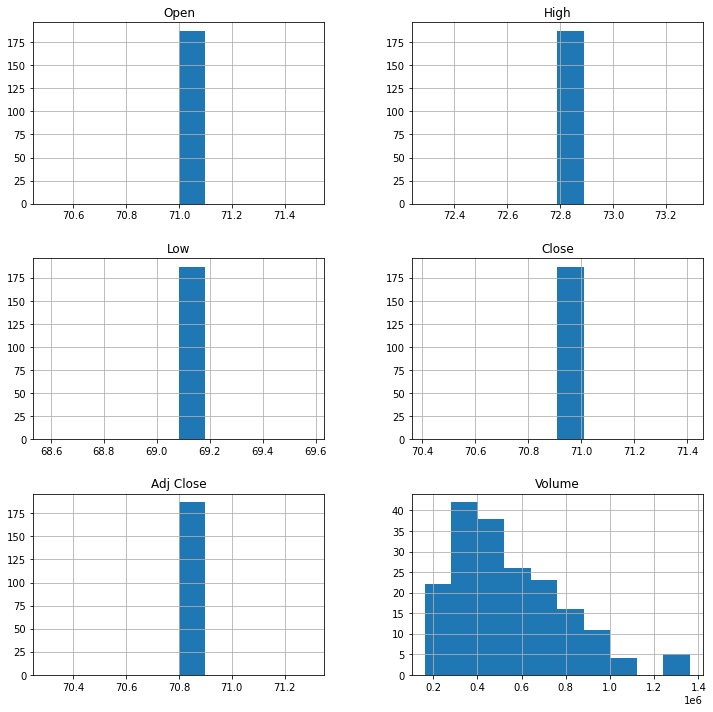

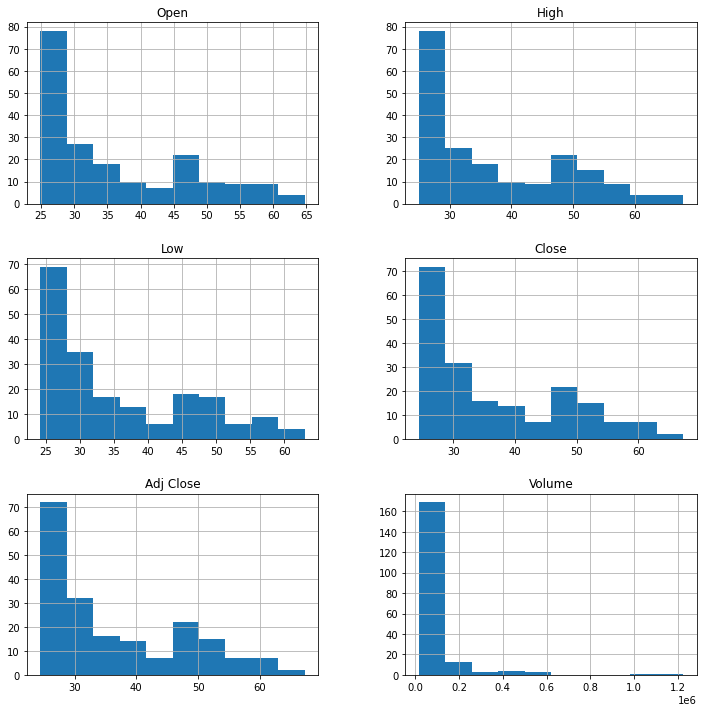

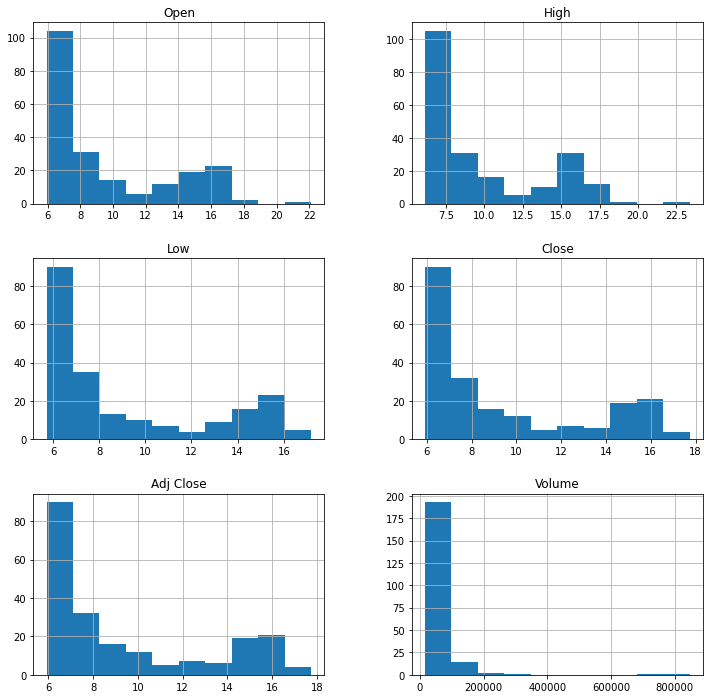

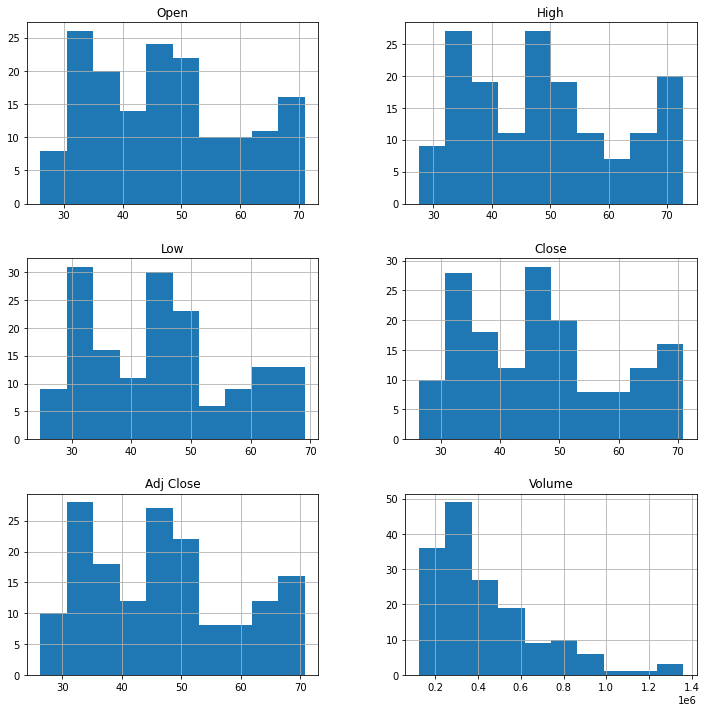

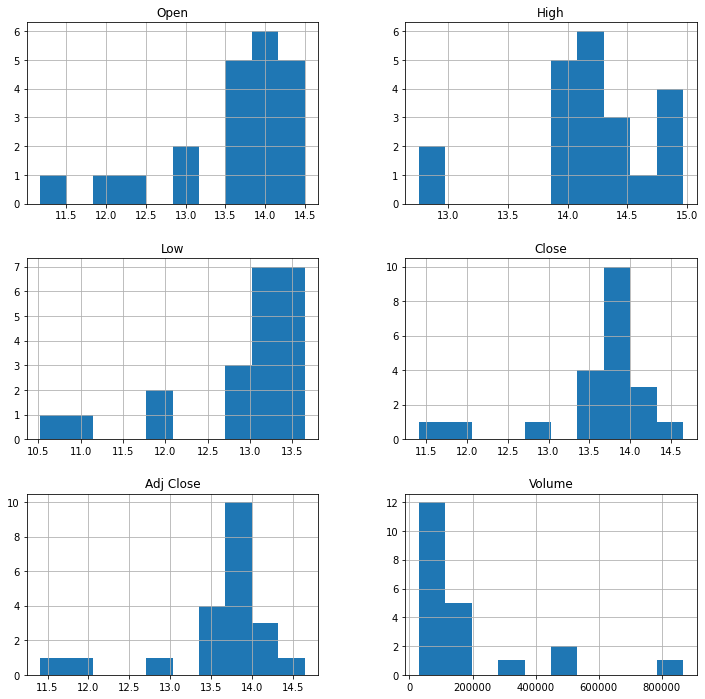

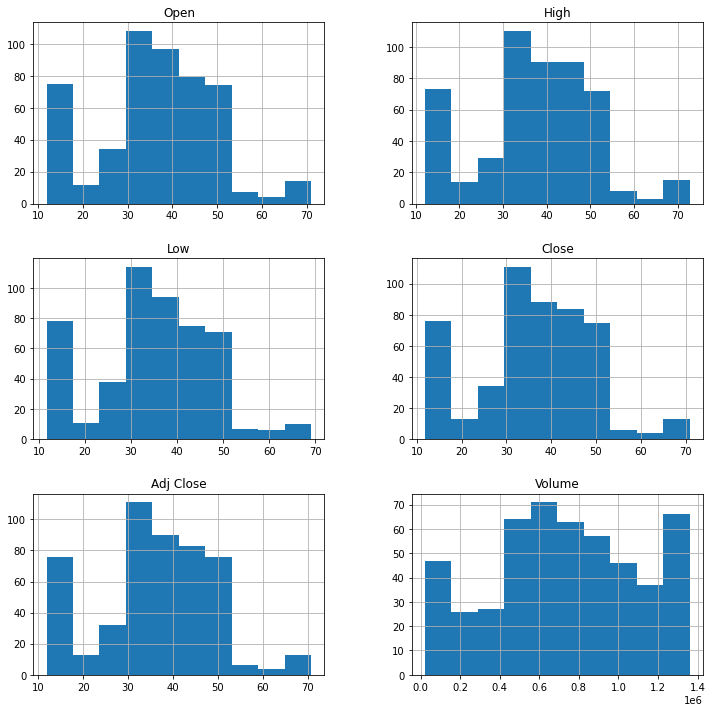

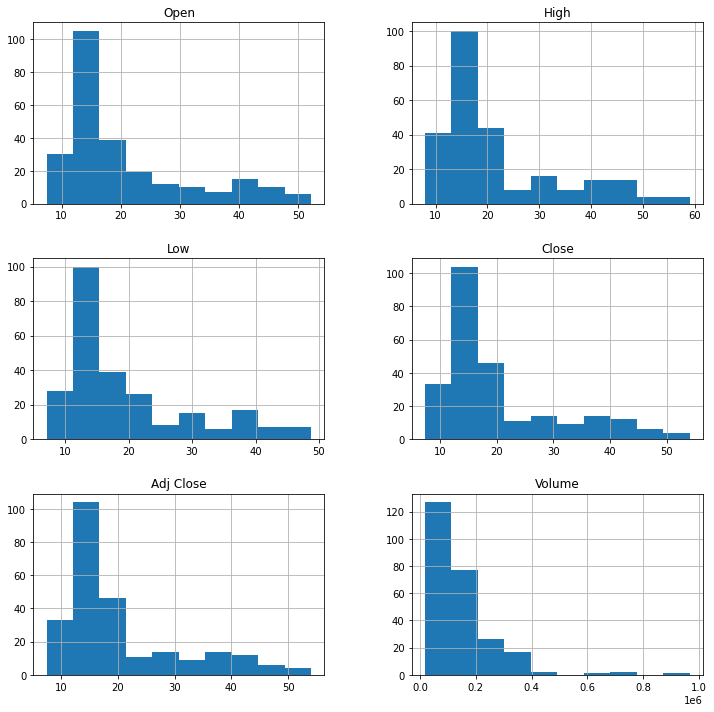

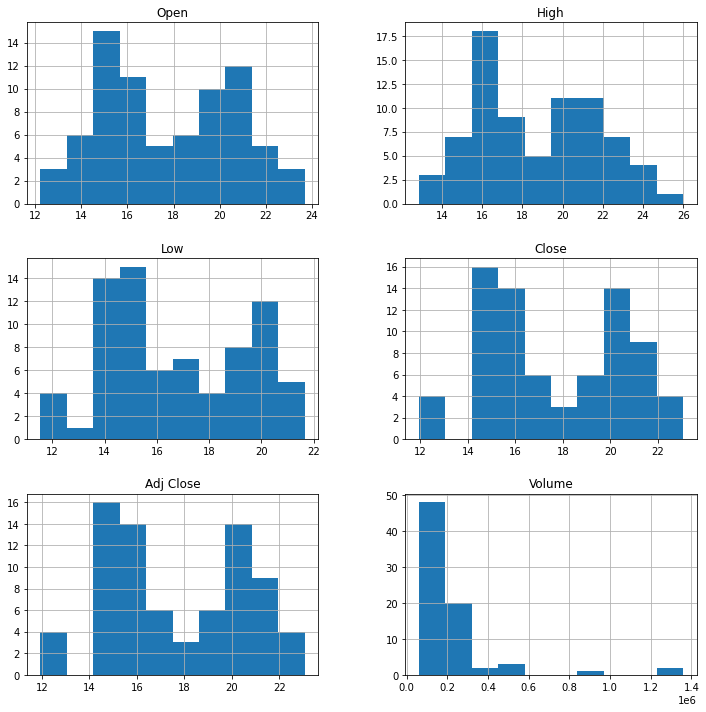

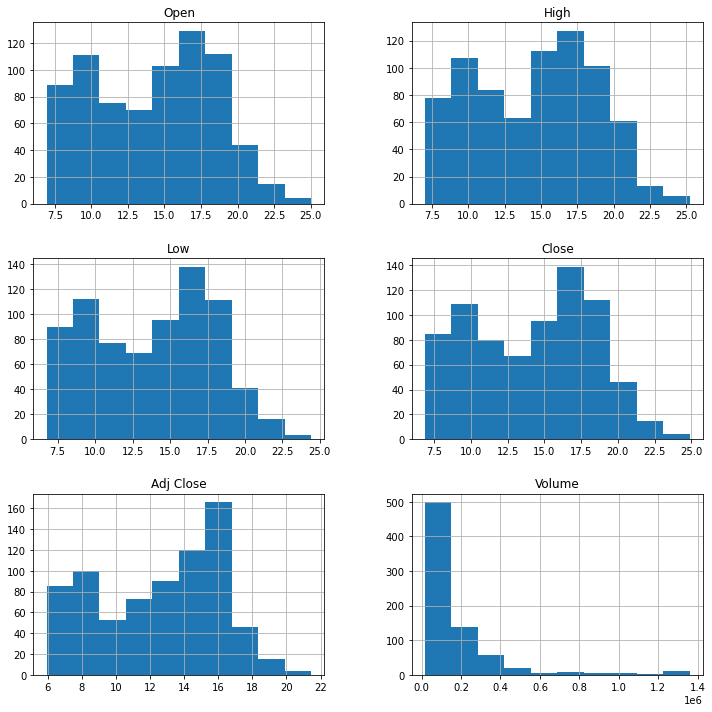

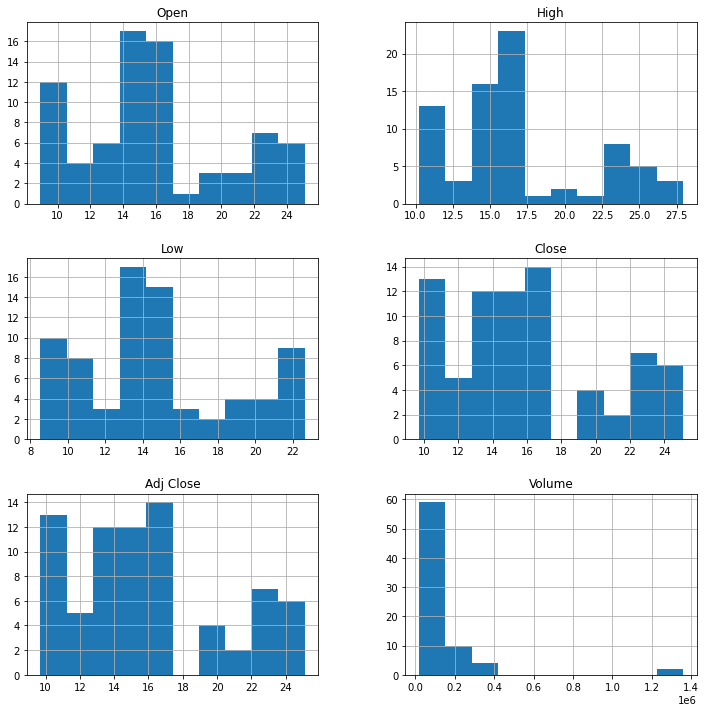

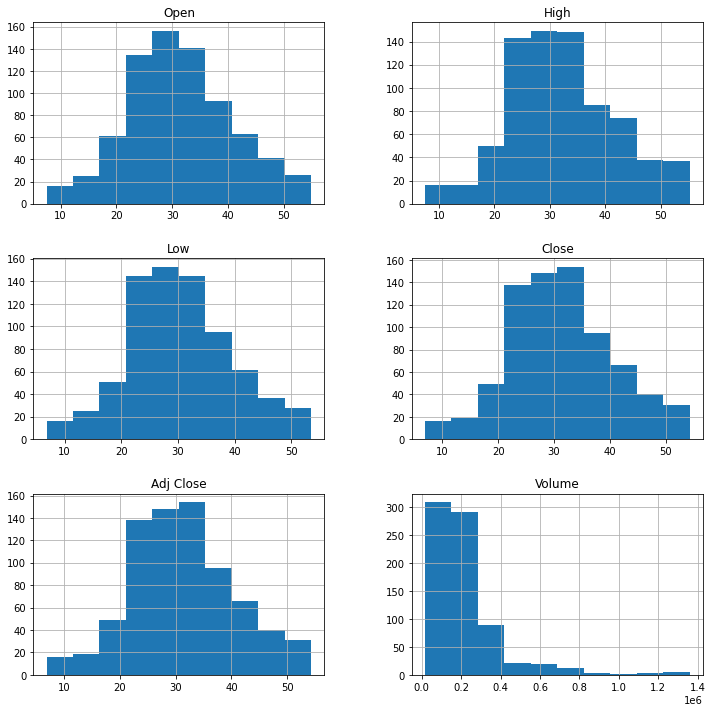

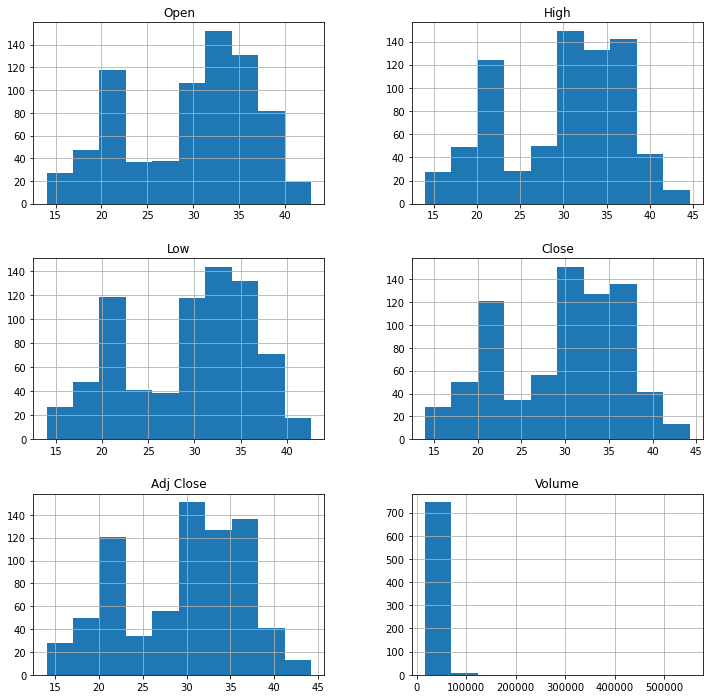

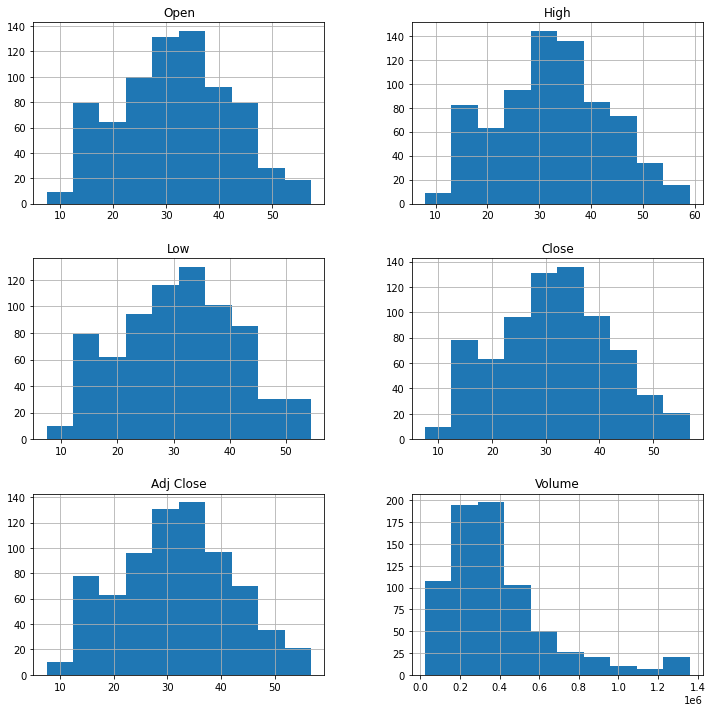

In [60]:
New_data.groupby("Symbol").hist(figsize=(12, 12));

array([[<AxesSubplot:title={'center':'Volume'}>]], dtype=object)

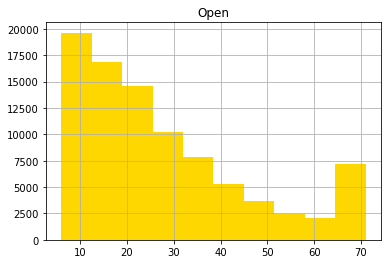

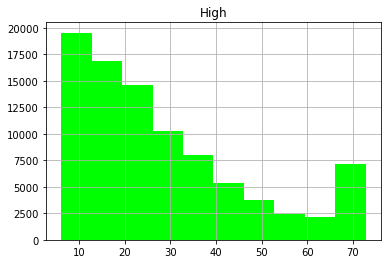

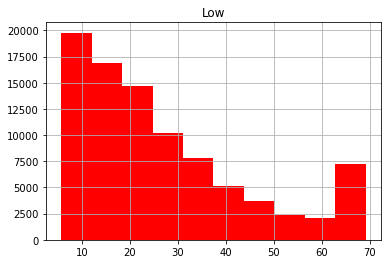

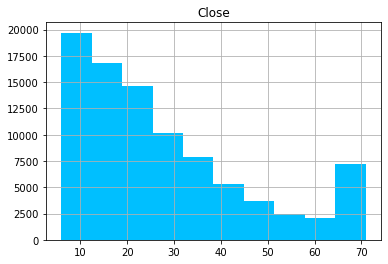

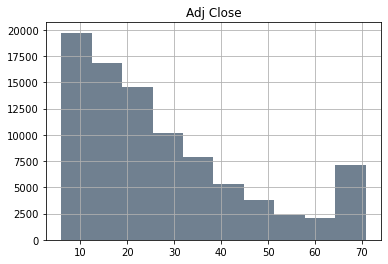

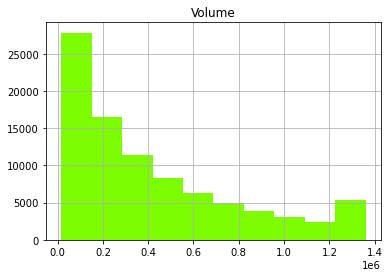

In [62]:
New_data.hist(column="Open", color="gold")
New_data.hist(column="High", color="lime")
New_data.hist(column="Low", color="red")
New_data.hist(column="Close", color="deepskyblue")
New_data.hist(column="Adj Close", color="slategrey")
New_data.hist(column="Volume", color="lawngreen")

(iv) Distribution plots:

<AxesSubplot:xlabel='Open', ylabel='Density'>

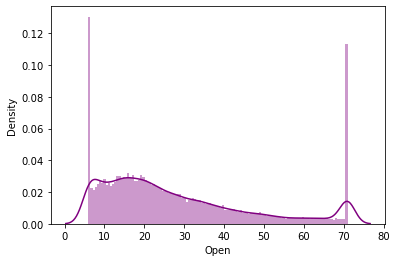

In [63]:
sns.distplot(New_data['Open'].dropna(),bins=120,color='purple')

<AxesSubplot:xlabel='High', ylabel='Density'>

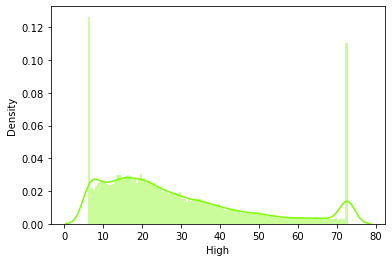

In [64]:
sns.distplot(New_data['High'].dropna(),bins=120,color='lawngreen')

<AxesSubplot:xlabel='Low', ylabel='Density'>

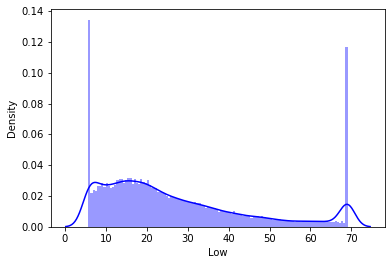

In [65]:
sns.distplot(New_data['Low'].dropna(),bins=120,color='blue')

<AxesSubplot:xlabel='Close', ylabel='Density'>

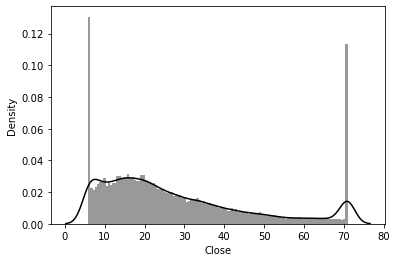

In [66]:
sns.distplot(New_data['Close'].dropna(),bins=120,color='black')

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

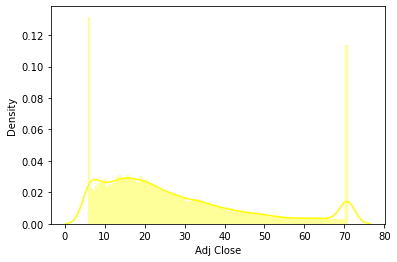

In [67]:
sns.distplot(New_data['Adj Close'].dropna(),bins=120,color='yellow')

<AxesSubplot:xlabel='Volume', ylabel='Density'>

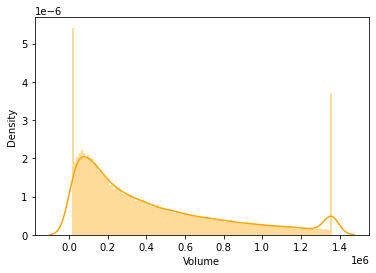

In [68]:
sns.distplot(New_data['Volume'].dropna(),bins=120,color='orange')

(v) Clustermap:

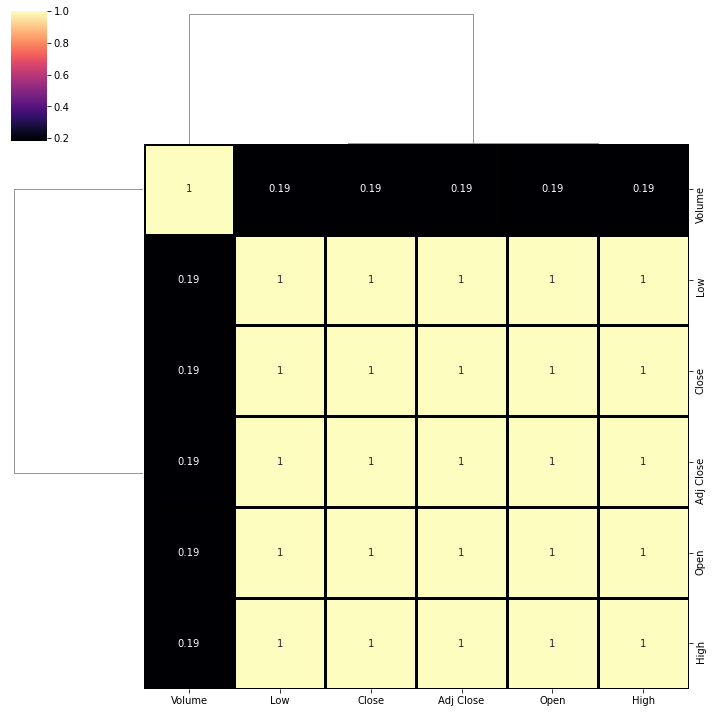

In [69]:
sns.clustermap(corr, cmap="magma", annot=True, linecolor="black", linewidth=3)

(vi) Pairplot:

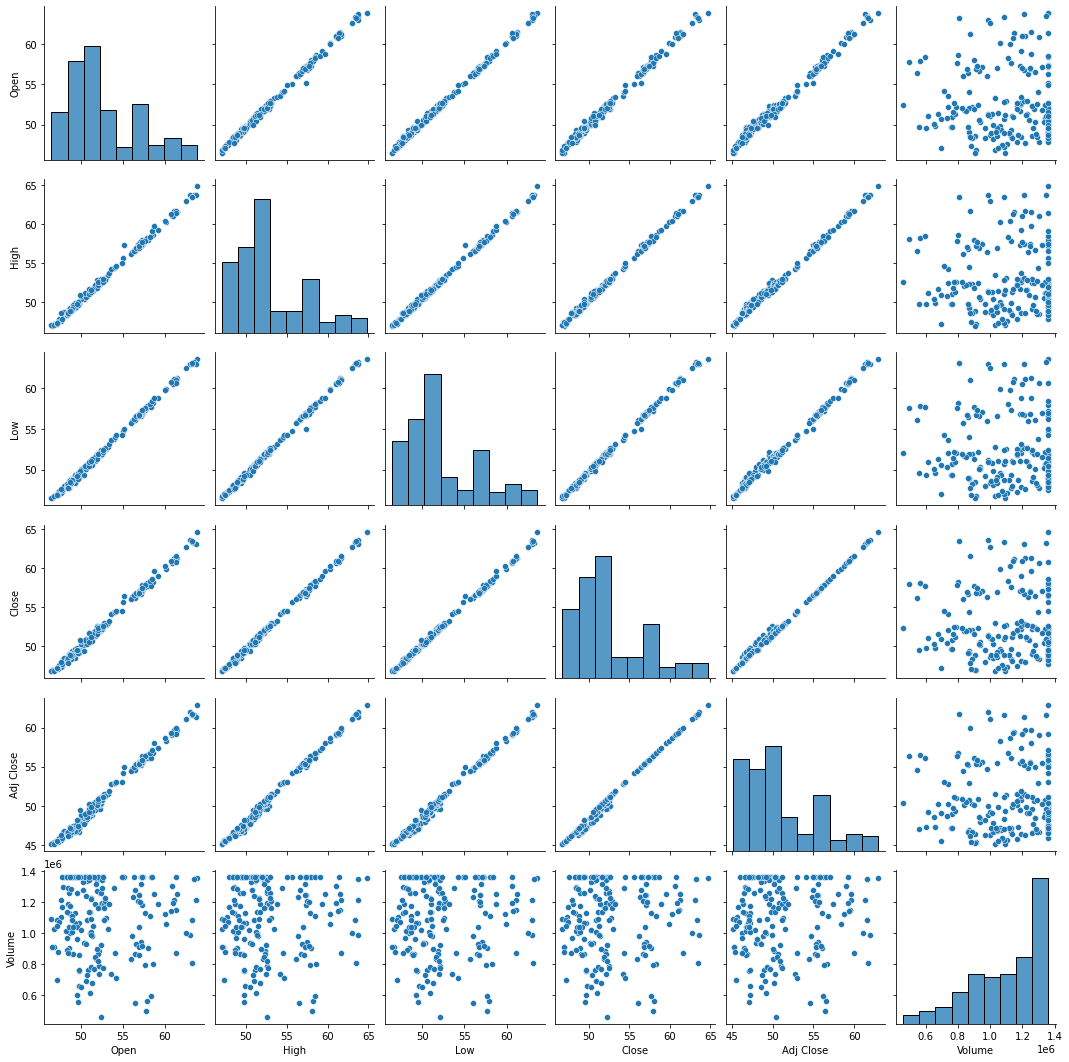

In [70]:
sns.pairplot(data=New_data.iloc[:200,:])

(vii) Line plot:

<AxesSubplot:xlabel='Date', ylabel='Volume'>

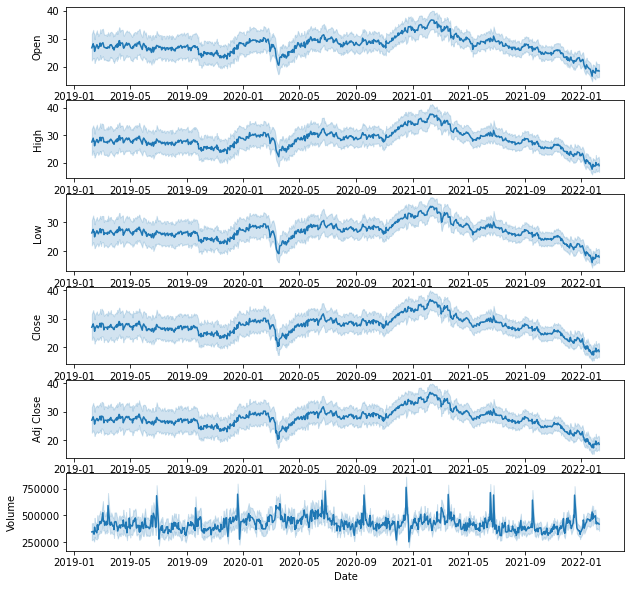

In [71]:
plt.figure(figsize=(10,10))

plt.subplot(6,1,1)
sns.lineplot(data=New_data.xs(key="Open", axis=1))

plt.subplot(6,1,2)
sns.lineplot(data=New_data.xs(key="High", axis=1))

plt.subplot(6,1,3)
sns.lineplot(data=New_data.xs(key="Low", axis=1))

plt.subplot(6,1,4)
sns.lineplot(data=New_data.xs(key="Close", axis=1))

plt.subplot(6,1,5)
sns.lineplot(data=New_data.xs(key="Adj Close", axis=1))

plt.subplot(6,1,6)
sns.lineplot(data=New_data.xs(key="Volume", axis=1))

<AxesSubplot:xlabel='Date', ylabel='Close'>

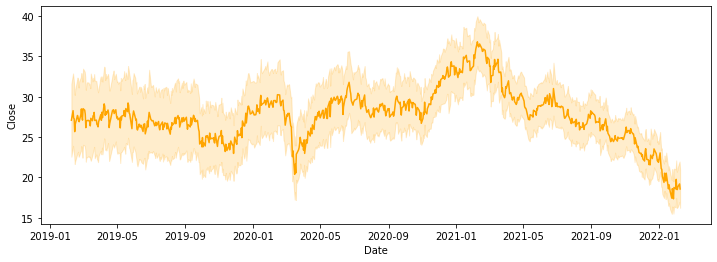

In [98]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=New_data.xs(key="Close", axis=1), color="orange")

(viii) Regression plot:

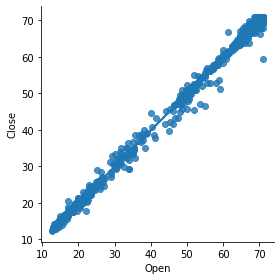

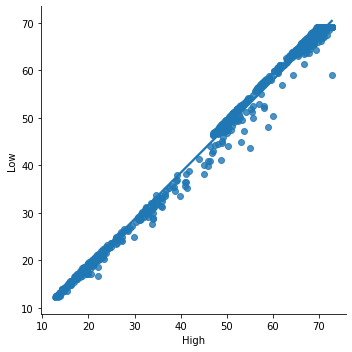

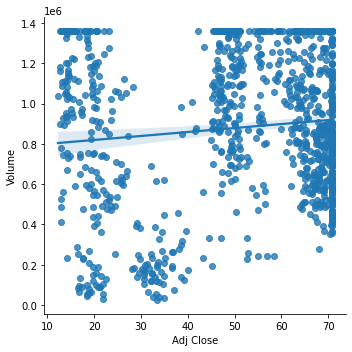

In [72]:
sns.lmplot(x="Open", y="Close", data=New_data.iloc[:1000,:], size=4)

sns.lmplot(x="High", y="Low", data=New_data.iloc[:1000,:])

sns.lmplot(x="Adj Close", y="Volume", data=New_data.iloc[:1000,:])

# Individual Symbol Analysis

In [103]:
nvo= New_data[New_data['Symbol']=='NVO']
anvs=New_data[New_data['Symbol']=='ANVS']

NVO_desc = nvo.describe()
ANVS_desc = anvs.describe()

In [104]:
NVO_desc

Open        High         Low       Close   Adj Close  \
count  509.000000  509.000000  509.000000  509.000000  509.000000   
mean    62.297073   62.921867   61.487099   62.232476   60.952178   
std      8.472974    8.825618    7.981637    8.433184    8.898513   
min     46.500000   47.049999   46.470001   46.790001   45.123295   
25%     52.439999   52.650002   52.130001   52.470001   50.877602   
50%     65.769997   66.099998   65.089996   65.489998   63.837811   
75%     70.820000   71.190002   69.083200   70.620003   69.366661   
max     71.000000   72.790001   69.083200   70.910004   70.800003   

             Volume  
count  5.090000e+02  
mean   1.008857e+06  
std    2.666493e+05  
min    2.775000e+05  
25%    8.014000e+05  
50%    1.028500e+06  
75%    1.257100e+06  
max    1.360200e+06

In [106]:
ANVS_desc

Open        High         Low       Close   Adj Close  \
count  480.000000  480.000000  480.000000  480.000000  480.000000   
mean    17.721250   18.557229   16.871594   17.671125   17.668146   
std     15.139012   15.858019   14.478281   15.151353   15.140870   
min      5.940000    6.140000    5.720000    5.920000    5.920000   
25%      5.940000    6.140000    5.720000    5.920000    5.920000   
50%      9.630000   10.260000    9.450000    9.930000    9.930000   
75%     27.102500   28.264999   25.742499   26.937500   26.937500   
max     71.000000   72.790001   69.083200   70.910004   70.800003   

             Volume  
count  4.800000e+02  
mean   1.684783e+05  
std    2.314686e+05  
min    1.630000e+04  
25%    3.120000e+04  
50%    9.280000e+04  
75%    1.886000e+05  
max    1.360200e+06

<AxesSubplot:xlabel='Date', ylabel='Open'>

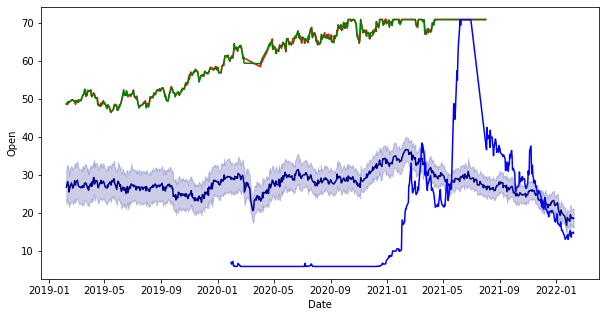

In [132]:
plt.figure(figsize=(10,5))

sns.lineplot(data=nvo.xs(key="Open", axis=1), color="red")
sns.lineplot(data=nvo.xs(key="Close", axis=1), color="green")
sns.lineplot(data=New_data.xs(key="Open", axis=1), color="darkblue")
sns.lineplot(data=anvs.xs(key="Close", axis=1), color="blue")

<AxesSubplot:xlabel='Date', ylabel='High'>

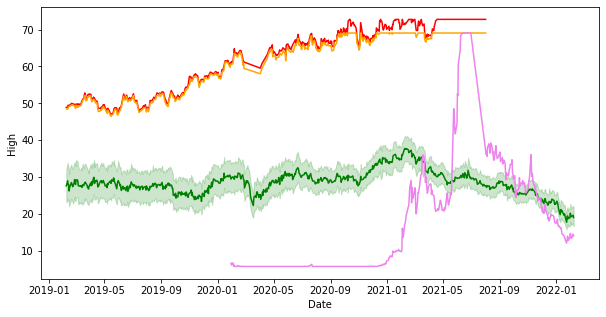

In [134]:
plt.figure(figsize=(10,5))

sns.lineplot(data=nvo.xs(key="High", axis=1), color="red")
sns.lineplot(data=nvo.xs(key="Low", axis=1), color="orange")
sns.lineplot(data=New_data.xs(key="High", axis=1), color="green")
sns.lineplot(data=anvs.xs(key="Low", axis=1), color="violet")

# Analyze daily return of each stocks and how they co-related

In [145]:
data=pd.read_csv("Final Stock Data.csv")

In [146]:
data

Date       Open       High        Low      Close  Adj Close  \
0       2019-02-08  48.599998  48.930000  48.470001  48.910000  46.454433   
1       2019-02-11  48.680000  48.810001  48.419998  48.660000  46.216980   
2       2019-02-12  48.990002  49.480000  48.830002  49.400002  46.919834   
3       2019-02-13  49.040001  49.279999  49.020000  49.090000  46.625393   
4       2019-02-14  49.750000  49.910000  49.560001  49.779999  47.280754   
...            ...        ...        ...        ...        ...        ...   
108940  2022-02-02  15.300000  15.300000  13.760000  13.870000  13.870000   
108941  2022-02-03  13.500000  14.000000  13.310000  13.640000  13.640000   
108942  2022-02-04  13.620000  14.920000  13.530000  14.720000  14.720000   
108943  2022-02-07  14.590000  16.160000  14.470000  14.960000  14.960000   
108944  2022-02-08  14.800000  15.200000  14.010000  14.700000  14.700000   

         Volume Symbol  
0        906700    NVO  
1       1001200    NVO  
2        868600    NVO  
3        868900    NVO  
4       2015900    NVO  
...         ...    ...  
108940    65500   ANVS  
108941    39500   ANVS  
108942    50700   ANVS  
108943    74000   ANVS  
108944    36000   ANVS  

[108945 rows x 8 columns]

# Randomly selected 5 company symbols

In [150]:
NVO= New_data[New_data['Symbol']=='NVO']
NXTC=New_data[New_data['Symbol']=='NXTC']
INZY= New_data[New_data['Symbol']=='INZY']
BMEA=New_data[New_data['Symbol']=='BMEA']
RAIN=New_data[New_data['Symbol']=='RAIN']

In [162]:
New_data=pd.DataFrame()

In [163]:
New_data['NVO_change']=((NVO['Close']-NVO['Open'])/NVO['Close'])*100
New_data['NXTC_change']=((NXTC['Close']-NXTC['Open'])/NXTC['Close'])*100
New_data['INZY_change']=((INZY['Close']-INZY['Open'])/INZY['Close'])*100
New_data['BMEA_change']=((BMEA['Close']-BMEA['Open'])/BMEA['Close'])*100
New_data['RAIN_change']=((RAIN['Close']-RAIN['Open'])/RAIN['Close'])*100

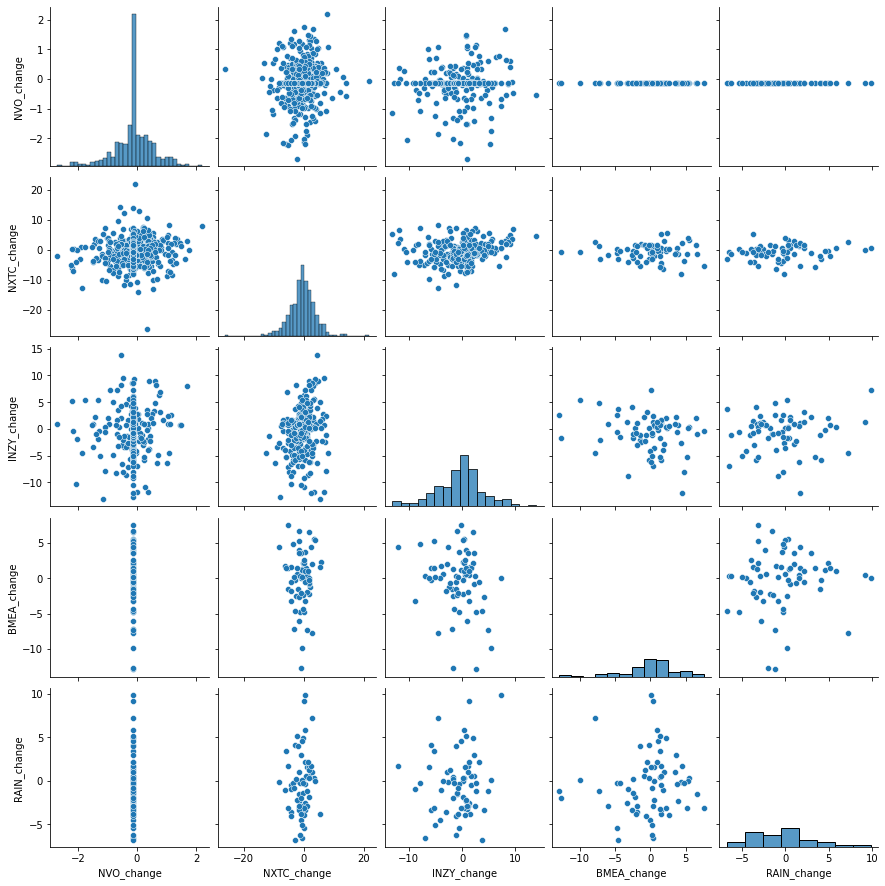

In [170]:
sns.pairplot(data=New_data)

<AxesSubplot:>

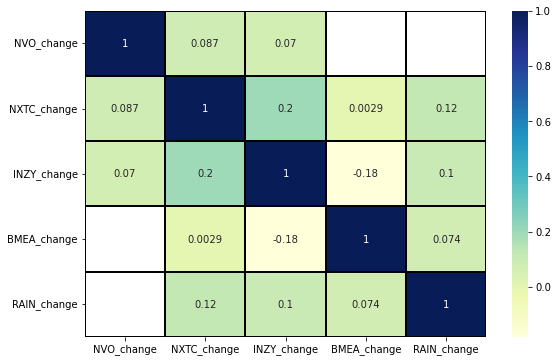

In [174]:
plt.figure(figsize=(9,6))
sns.heatmap(New_data.corr(),annot=True, cmap="YlGnBu", linecolor="black", linewidth=2)

We can see that INZY and NXTC have good correlation on daily returns

In [195]:
New_data.describe()

NVO_change  NXTC_change  INZY_change  BMEA_change  RAIN_change
count  509.000000   445.000000   242.000000    72.000000    67.000000
mean    -0.098663    -0.434184    -0.382867    -0.186953    -0.389934
std      0.646516     4.375863     4.387947     4.064469     3.497208
min     -2.688998   -26.354104   -13.123846   -12.893775    -6.782826
25%     -0.338639    -2.839764    -2.892004    -1.934422    -3.053254
50%     -0.126916    -0.260641     0.217766     0.358379    -0.409836
75%      0.230089     1.874063     2.077775     1.826647     1.368417
max      2.196241    21.859294    13.916667     7.559684     9.855908

                                                                                                  Author : M. Santhosh Kumar